# MD211: 02: Parabolic distn tests

In [1]:
import imageio
import pickle
import pandas as pd
import numpy as np
import PyNAFF as pnf
import scipy.io as sio 
import matplotlib.cm as cm
from math import log10, floor
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from scipy.optimize import curve_fit

In [2]:
plt.rcParams['figure.figsize'] = [8.0, 8.0]
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 14

plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

plt.rcParams['font.size'] = 10
plt.rcParams['legend.fontsize'] = 10

plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.markersize'] = 5

In [3]:
def add_input_file(dd, filename, label):
	f = filename
	p = dict()
	sio.loadmat(f, mdict=p)
	dd[label] = p	
	print '\tAdded output data from ', filename, '\t dictionary key: ', label
	return dd

In [4]:
dd_LI_NoSC = dict()
dd_LI_SbS = dict()
dd_HI_NoSC = dict()
dd_HI_SbS = dict()

dd_LI_NoSC = add_input_file(dd_LI_NoSC, '00_00/output/output.mat', '1.3 eVs')
dd_LI_NoSC = add_input_file(dd_LI_NoSC, '00_01/output/output.mat', '1.6 eVs')
dd_LI_NoSC = add_input_file(dd_LI_NoSC, '00_02/output/output.mat', '1.9 eVs')
dd_LI_NoSC = add_input_file(dd_LI_NoSC, '00_03/output/output.mat', '2.3 eVs')
dd_LI_NoSC = add_input_file(dd_LI_NoSC, '00_04/output/output.mat', '2.6 eVs')

dd_HI_NoSC = add_input_file(dd_HI_NoSC, '01_00/output/output.mat', '1.3 eVs')
dd_HI_NoSC = add_input_file(dd_HI_NoSC, '01_01/output/output.mat', '1.6 eVs')
dd_HI_NoSC = add_input_file(dd_HI_NoSC, '01_02/output/output.mat', '1.9 eVs')
dd_HI_NoSC = add_input_file(dd_HI_NoSC, '01_03/output/output.mat', '2.3 eVs')
dd_HI_NoSC = add_input_file(dd_HI_NoSC, '01_04/output/output.mat', '2.6 eVs')

dd_LI_SbS = add_input_file(dd_LI_SbS, '00_00/output/output.mat', '1.3 eVs')
dd_LI_SbS = add_input_file(dd_LI_SbS, '00_01/output/output.mat', '1.6 eVs')
dd_LI_SbS = add_input_file(dd_LI_SbS, '00_02/output/output.mat', '1.9 eVs')
dd_LI_SbS = add_input_file(dd_LI_SbS, '00_03/output/output.mat', '2.3 eVs')
dd_LI_SbS = add_input_file(dd_LI_SbS, '00_04/output/output.mat', '2.6 eVs')

dd_HI_SbS = add_input_file(dd_HI_SbS, '01_00/output/output.mat', '1.3 eVs')
dd_HI_SbS = add_input_file(dd_HI_SbS, '01_01/output/output.mat', '1.6 eVs')
dd_HI_SbS = add_input_file(dd_HI_SbS, '01_02/output/output.mat', '1.9 eVs')
dd_HI_SbS = add_input_file(dd_HI_SbS, '01_03/output/output.mat', '2.3 eVs')
dd_HI_SbS = add_input_file(dd_HI_SbS, '01_04/output/output.mat', '2.6 eVs')

	Added output data from  00_00/output/output.mat 	 dictionary key:  1.3 eVs
	Added output data from  00_01/output/output.mat 	 dictionary key:  1.6 eVs
	Added output data from  00_02/output/output.mat 	 dictionary key:  1.9 eVs
	Added output data from  00_03/output/output.mat 	 dictionary key:  2.3 eVs
	Added output data from  00_04/output/output.mat 	 dictionary key:  2.6 eVs
	Added output data from  01_00/output/output.mat 	 dictionary key:  1.3 eVs
	Added output data from  01_01/output/output.mat 	 dictionary key:  1.6 eVs
	Added output data from  01_02/output/output.mat 	 dictionary key:  1.9 eVs
	Added output data from  01_03/output/output.mat 	 dictionary key:  2.3 eVs
	Added output data from  01_04/output/output.mat 	 dictionary key:  2.6 eVs
	Added output data from  00_00/output/output.mat 	 dictionary key:  1.3 eVs
	Added output data from  00_01/output/output.mat 	 dictionary key:  1.6 eVs
	Added output data from  00_02/output/output.mat 	 dictionary key:  1.9 eVs
	Added outpu

In [5]:
dd_HI_SbS['1.3 eVs'].keys()

['eps_z',
 'D_x',
 'D_y',
 'kurtosis_yp_6sig',
 'kurtosis_yp',
 'mu_yp',
 'kurtosis_z_6sig',
 'eff_beta_y',
 'eff_beta_x',
 'eff_alpha_y',
 'kurtosis_y_6sig',
 'epsn_y',
 'epsn_x',
 'beta_y',
 'beta_x',
 'dpp_rms',
 'sig_yp',
 'min_dE',
 'turn_time',
 'n_mp',
 'min_xp',
 'kurtosis_y',
 'kurtosis_xp_6sig',
 'alpha_x',
 'alpha_y',
 'bunchlength',
 '__header__',
 'sig_xp',
 'kurtosis_dE_6sig',
 'max_xp',
 'intensity',
 'min_yp',
 'sig_dE',
 'min_x',
 'min_y',
 'mu_y',
 'mu_x',
 'cumulative_time',
 'mean_yp',
 'kurtosis_xp',
 'eff_epsn_y',
 'eff_epsn_x',
 'mean_x',
 'mean_y',
 'mean_z',
 'kurtosis_x_6sig',
 '__version__',
 'max_z',
 'mu_dE',
 'max_x',
 'max_y',
 'mean_dE',
 'sig_z',
 'sig_y',
 'sig_x',
 'max_yp',
 'kurtosis_z',
 'eff_alpha_x',
 'kurtosis_x',
 'mu_xp',
 'turn_duration',
 'mu_z',
 'mean_xp',
 'min_z',
 'kurtosis_dE',
 '__globals__',
 'turn',
 'max_dE',
 'gamma']

In [6]:
sc = 'SbS'
legend_label = ''    
main_label = 'MD211_parabolic'
main_label2 = main_label + '_zoom'
scaled_label = main_label + '_scaled'
turn_tot = 2200
zoom_turns = 30
turns = [0, 1, 10, 50, 100, 874, 2185, 2199]
betagamma = 2.492104532 * 0.9159915293879255
save_folder = 'Plots'

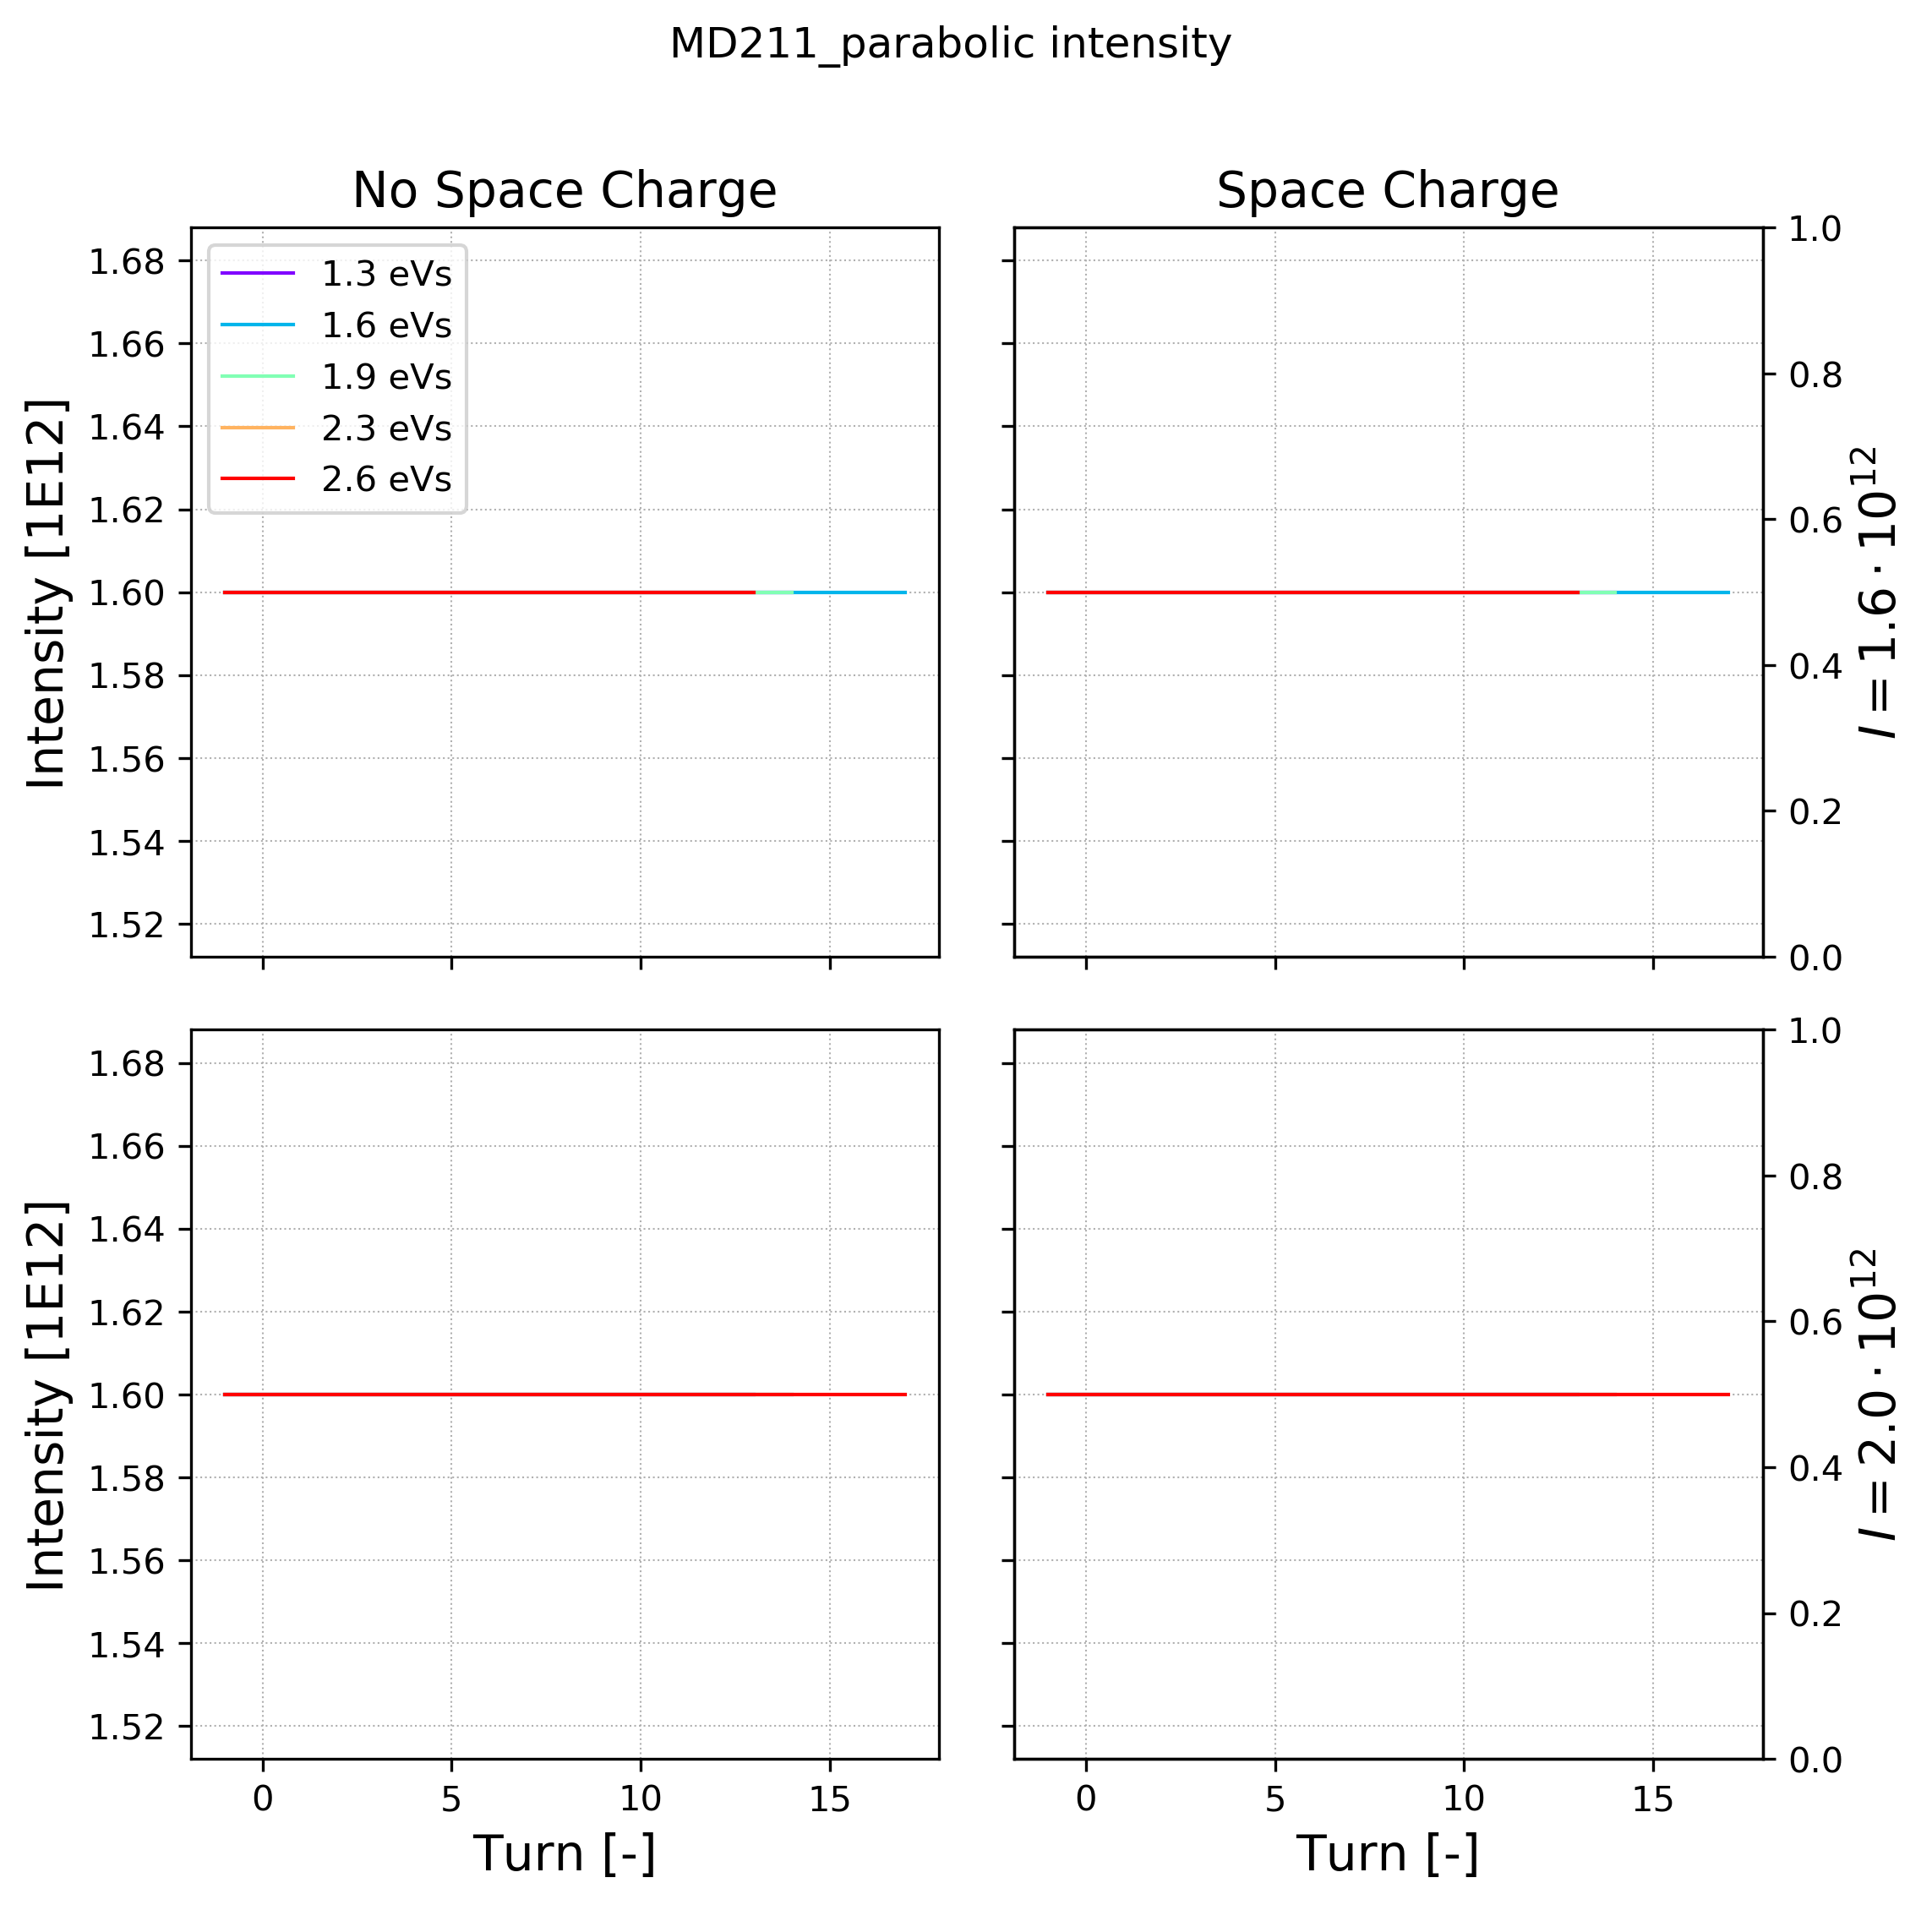

In [7]:
parameter = 'intensity'
multi1 = 1E-12

fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
(ax1, ax2), (ax3, ax4) = axs

tit = main_label + ' ' + parameter
fig.suptitle(tit)

ax1.set_ylabel('Intensity [1E12]');
ax3.set_ylabel('Intensity [1E12]');
ax3.set_xlabel('Turn [-]');
ax4.set_xlabel('Turn [-]');


colors = cm.rainbow(np.linspace(0, 1, len(dd_LI_NoSC.keys())))

c_it = int(0)
for key, value in sorted(dd_LI_NoSC.iteritems()):
        ax1.plot(dd_LI_NoSC[key]['turn'][0], dd_LI_NoSC[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;

ax1.legend(loc=2);
ax1.grid(lw=0.5, ls=':');

c_it = int(0)
for key, value in sorted(dd_HI_SbS.iteritems()):
        ax4.plot(dd_HI_SbS[key]['turn'][0], dd_HI_SbS[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;        
ax4.grid(lw=0.5, ls=':');
ax2.set_title('Space Charge')

c_it = int(0)
for key, value in sorted(dd_HI_NoSC.iteritems()):
        ax3.plot(dd_HI_NoSC[key]['turn'][0], dd_HI_NoSC[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax3.grid(lw=0.5, ls=':');
ax1.set_title('No Space Charge')

c_it = int(0)
for key, value in sorted(dd_LI_SbS.iteritems()):
        ax2.plot(dd_LI_SbS[key]['turn'][0], dd_LI_SbS[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax2.grid(lw=0.5, ls=':');

ax5 = ax2.twinx()
ax5.set_ylabel('$I = 1.6 \cdot 10^{12}$');
ax6 = ax4.twinx()
ax6.set_ylabel('$I = 2.0 \cdot 10^{12}$');

for ax in axs.flat:
    ax.label_outer()   
    
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

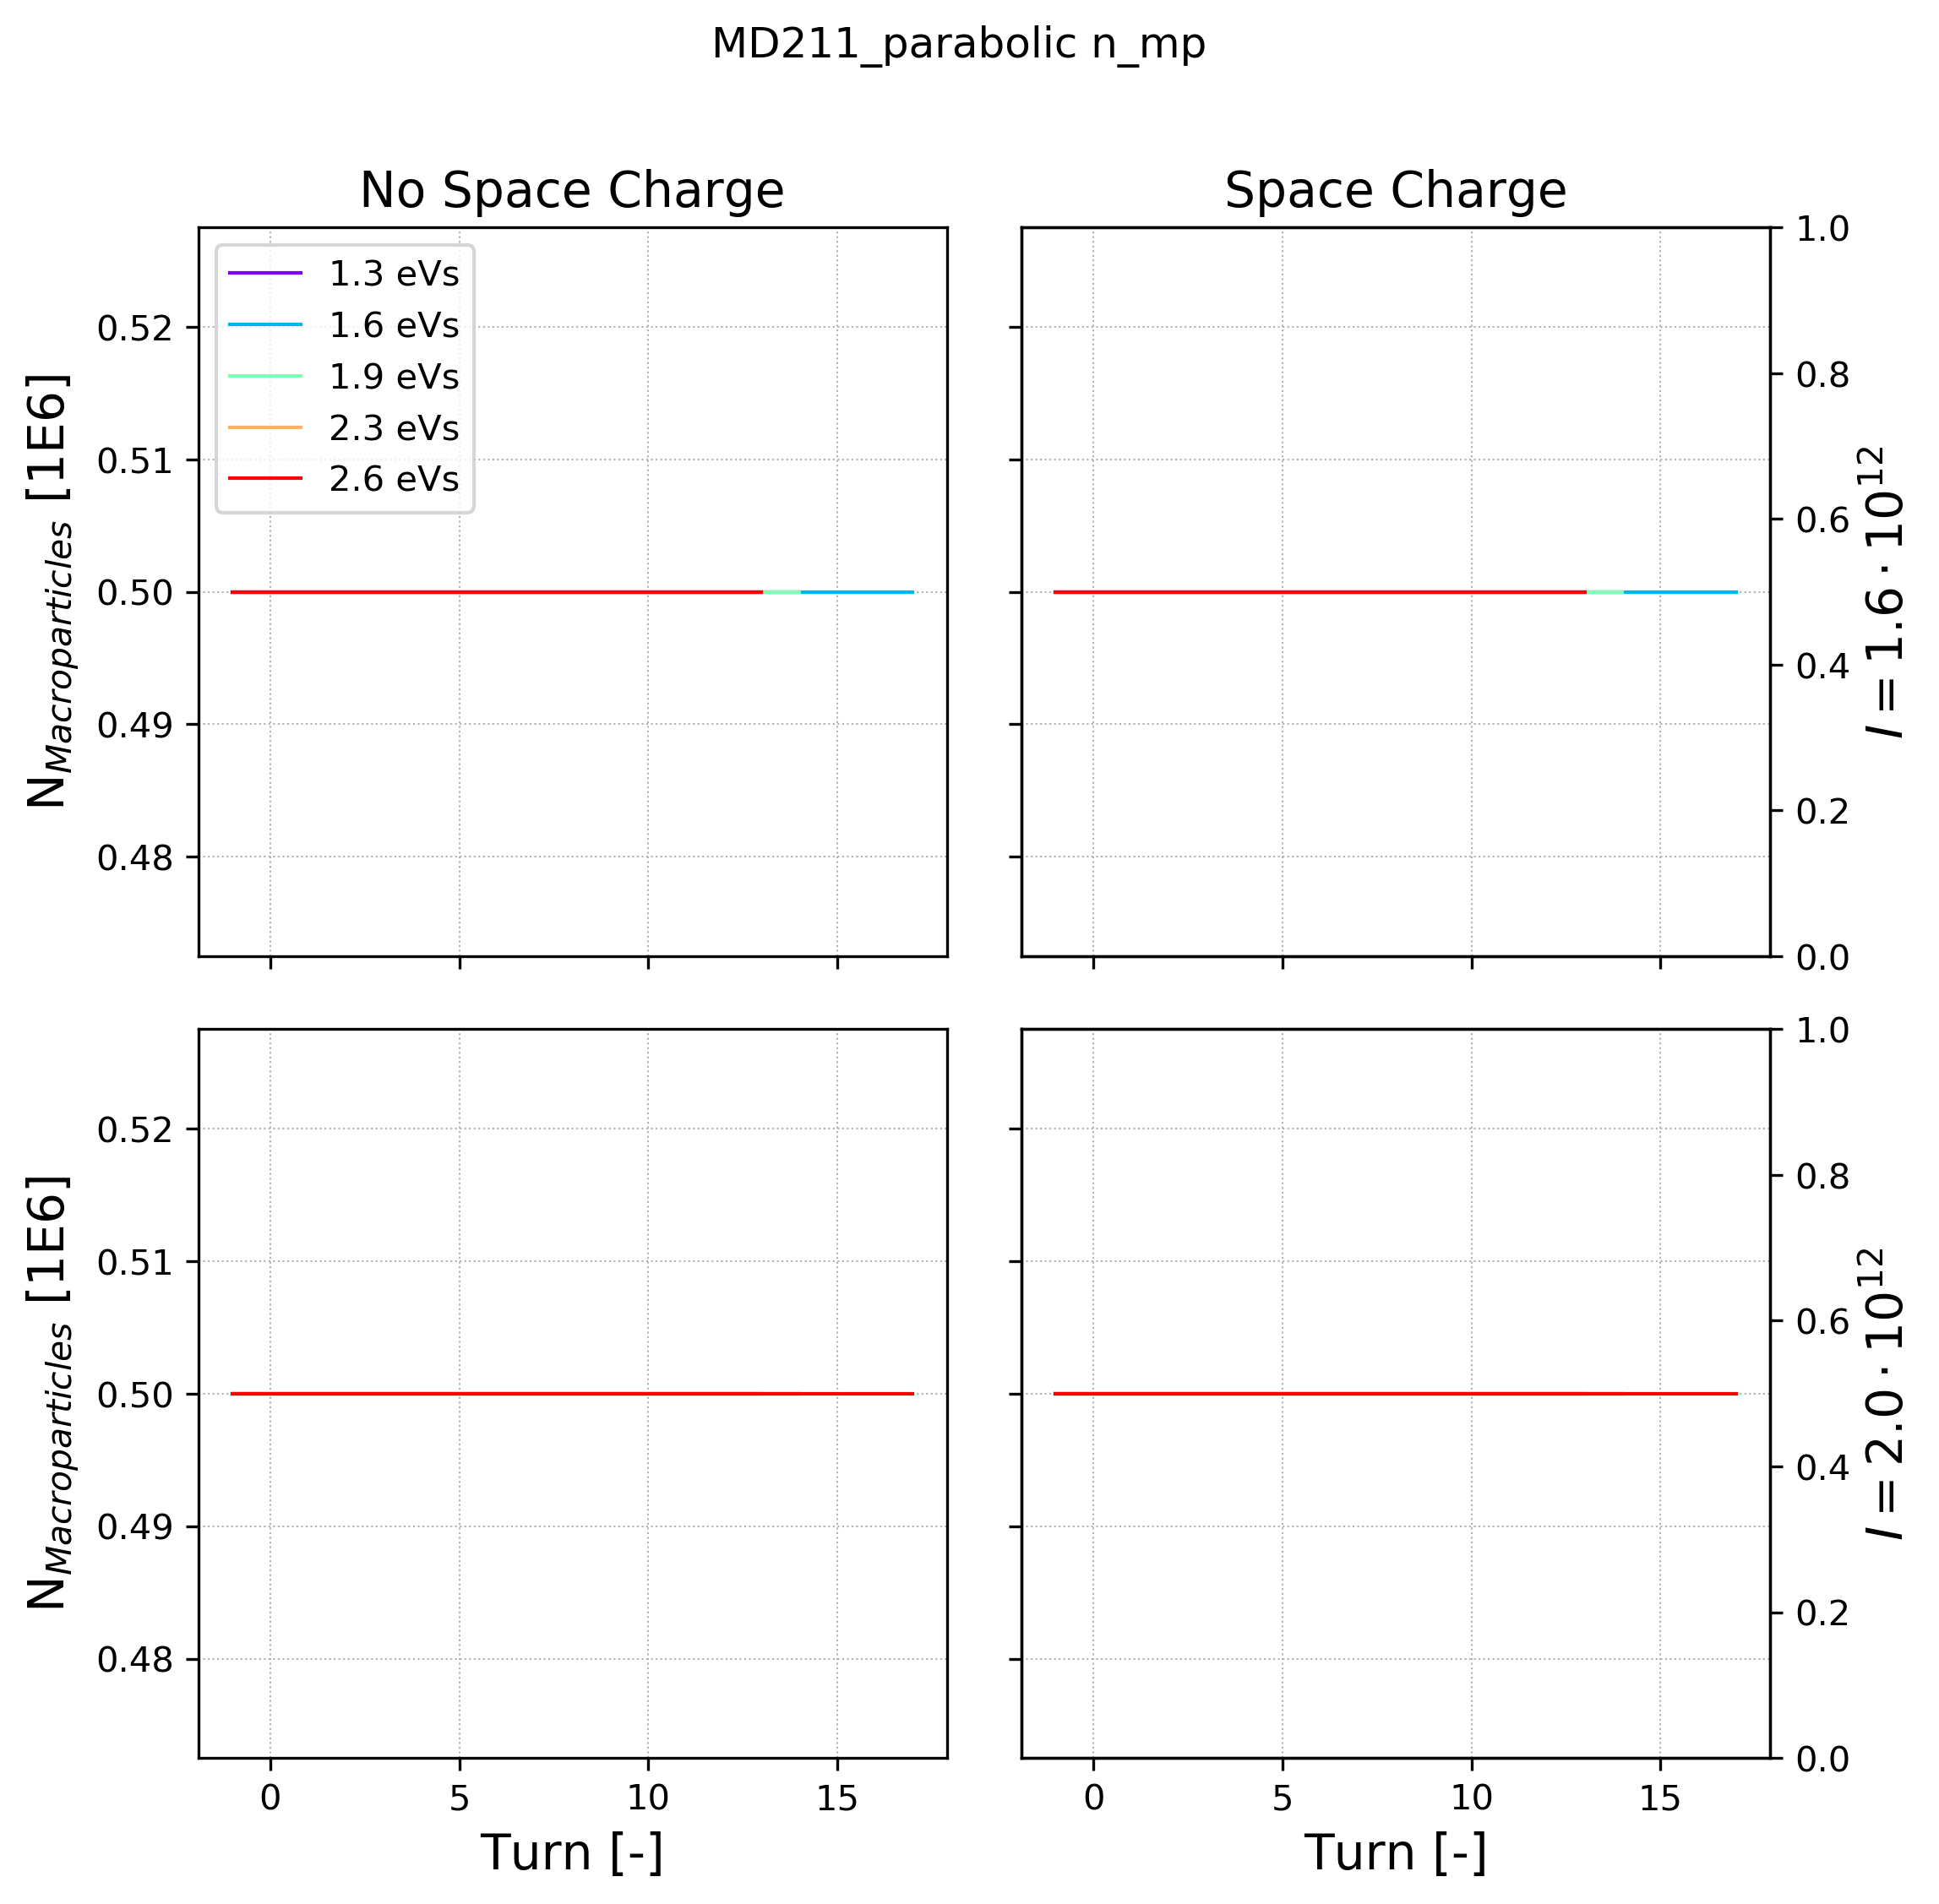

In [8]:
parameter = 'n_mp'
multi1 = 1E-6

fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
(ax1, ax2), (ax3, ax4) = axs

tit = main_label + ' ' + parameter
fig.suptitle(tit)

ax1.set_ylabel(r'N$_{Macroparticles}$ [1E6]');
ax3.set_ylabel(r'N$_{Macroparticles}$ [1E6]');
ax3.set_xlabel('Turn [-]');
ax4.set_xlabel('Turn [-]');


colors = cm.rainbow(np.linspace(0, 1, len(dd_LI_NoSC.keys())))

c_it = int(0)
for key, value in sorted(dd_LI_NoSC.iteritems()):
        ax1.plot(dd_LI_NoSC[key]['turn'][0], dd_LI_NoSC[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;

ax1.legend(loc=2);
ax1.grid(lw=0.5, ls=':');

c_it = int(0)
for key, value in sorted(dd_HI_SbS.iteritems()):
        ax4.plot(dd_HI_SbS[key]['turn'][0], dd_HI_SbS[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;        
ax4.grid(lw=0.5, ls=':');
ax2.set_title('Space Charge')

c_it = int(0)
for key, value in sorted(dd_HI_NoSC.iteritems()):
        ax3.plot(dd_HI_NoSC[key]['turn'][0], dd_HI_NoSC[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax3.grid(lw=0.5, ls=':');
ax1.set_title('No Space Charge')

c_it = int(0)
for key, value in sorted(dd_LI_SbS.iteritems()):
        ax2.plot(dd_LI_SbS[key]['turn'][0], dd_LI_SbS[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax2.grid(lw=0.5, ls=':');

ax5 = ax2.twinx()
ax5.set_ylabel('$I = 1.6 \cdot 10^{12}$');
ax6 = ax4.twinx()
ax6.set_ylabel('$I = 2.0 \cdot 10^{12}$');

for ax in axs.flat:
    ax.label_outer()

savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

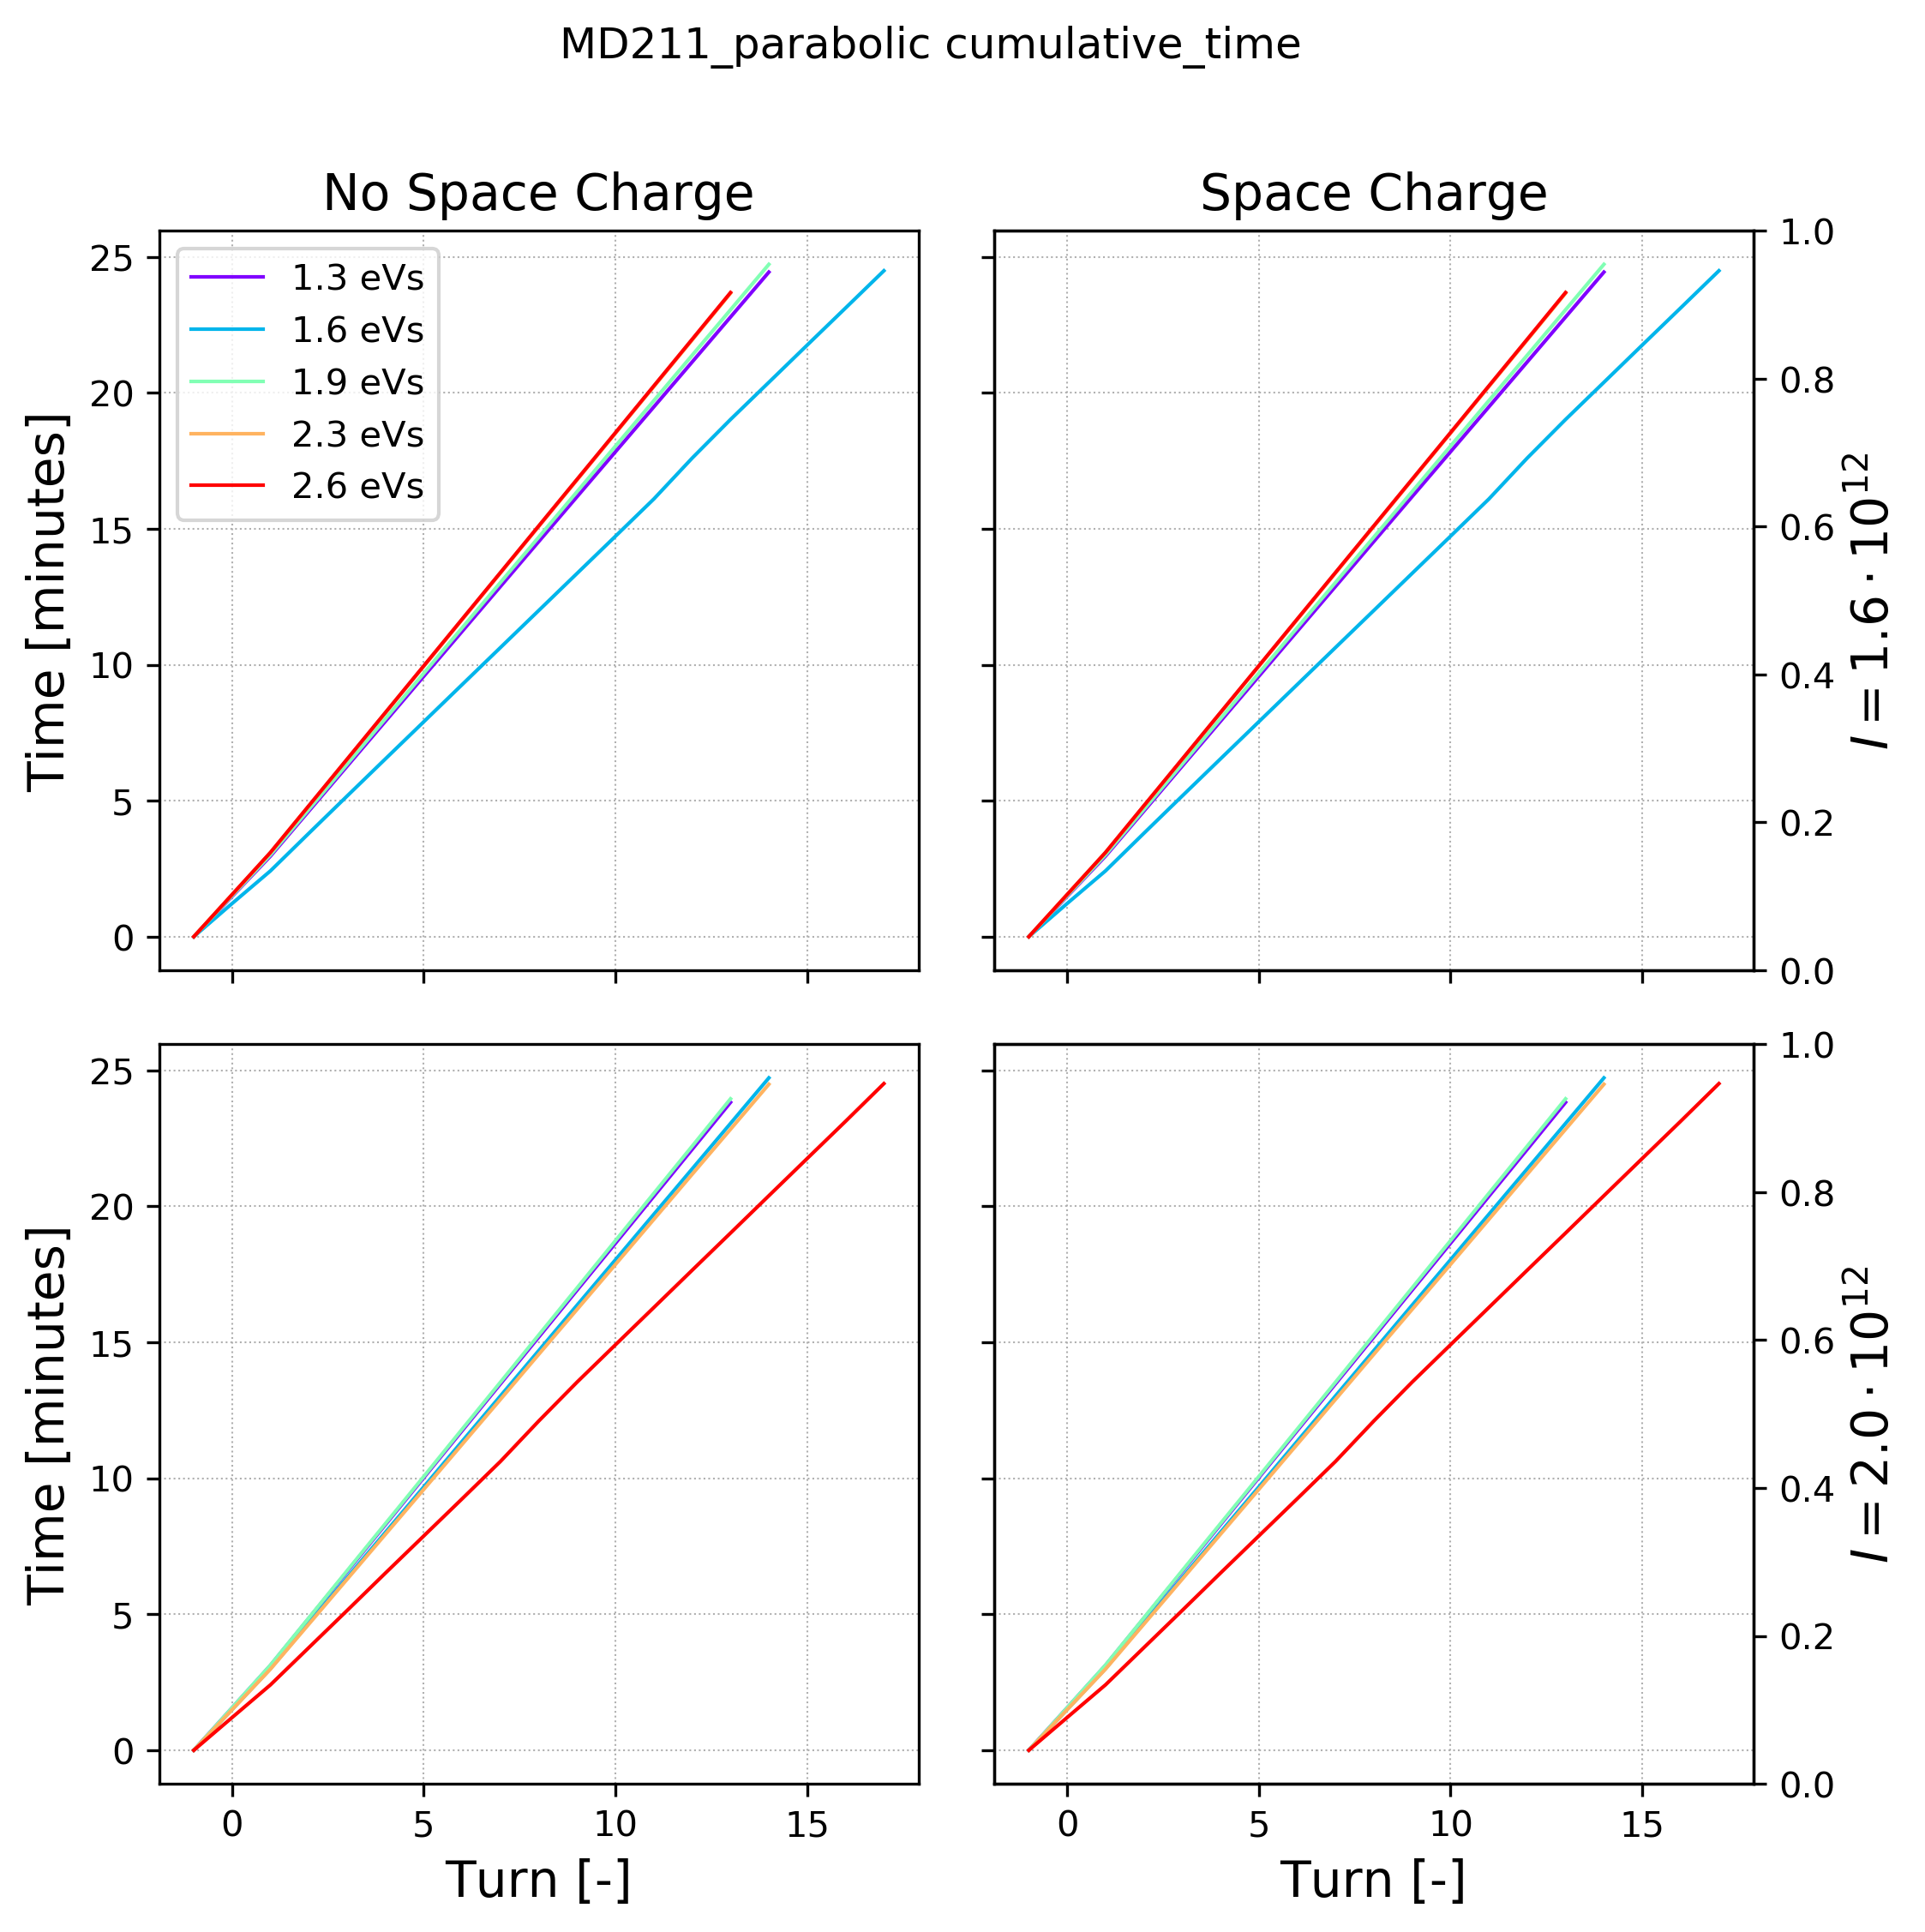

In [9]:
parameter = 'cumulative_time'
multi1 = 1./60.

fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
(ax1, ax2), (ax3, ax4) = axs

tit = main_label + ' ' + parameter
fig.suptitle(tit)

ax1.set_ylabel('Time [minutes]');
ax3.set_ylabel('Time [minutes]');
ax3.set_xlabel('Turn [-]');
ax4.set_xlabel('Turn [-]');


colors = cm.rainbow(np.linspace(0, 1, len(dd_LI_NoSC.keys())))

c_it = int(0)
for key, value in sorted(dd_LI_NoSC.iteritems()):
        ax1.plot(dd_LI_NoSC[key]['turn'][0], dd_LI_NoSC[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;

ax1.legend(loc=2);
ax1.grid(lw=0.5, ls=':');

c_it = int(0)
for key, value in sorted(dd_HI_SbS.iteritems()):
        ax4.plot(dd_HI_SbS[key]['turn'][0], dd_HI_SbS[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;        
ax4.grid(lw=0.5, ls=':');
ax2.set_title('Space Charge')

c_it = int(0)
for key, value in sorted(dd_HI_NoSC.iteritems()):
        ax3.plot(dd_HI_NoSC[key]['turn'][0], dd_HI_NoSC[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax3.grid(lw=0.5, ls=':');
ax1.set_title('No Space Charge')

c_it = int(0)
for key, value in sorted(dd_LI_SbS.iteritems()):
        ax2.plot(dd_LI_SbS[key]['turn'][0], dd_LI_SbS[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax2.grid(lw=0.5, ls=':');

ax5 = ax2.twinx()
ax5.set_ylabel('$I = 1.6 \cdot 10^{12}$');
ax6 = ax4.twinx()
ax6.set_ylabel('$I = 2.0 \cdot 10^{12}$');

for ax in axs.flat:
    ax.label_outer()
    
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

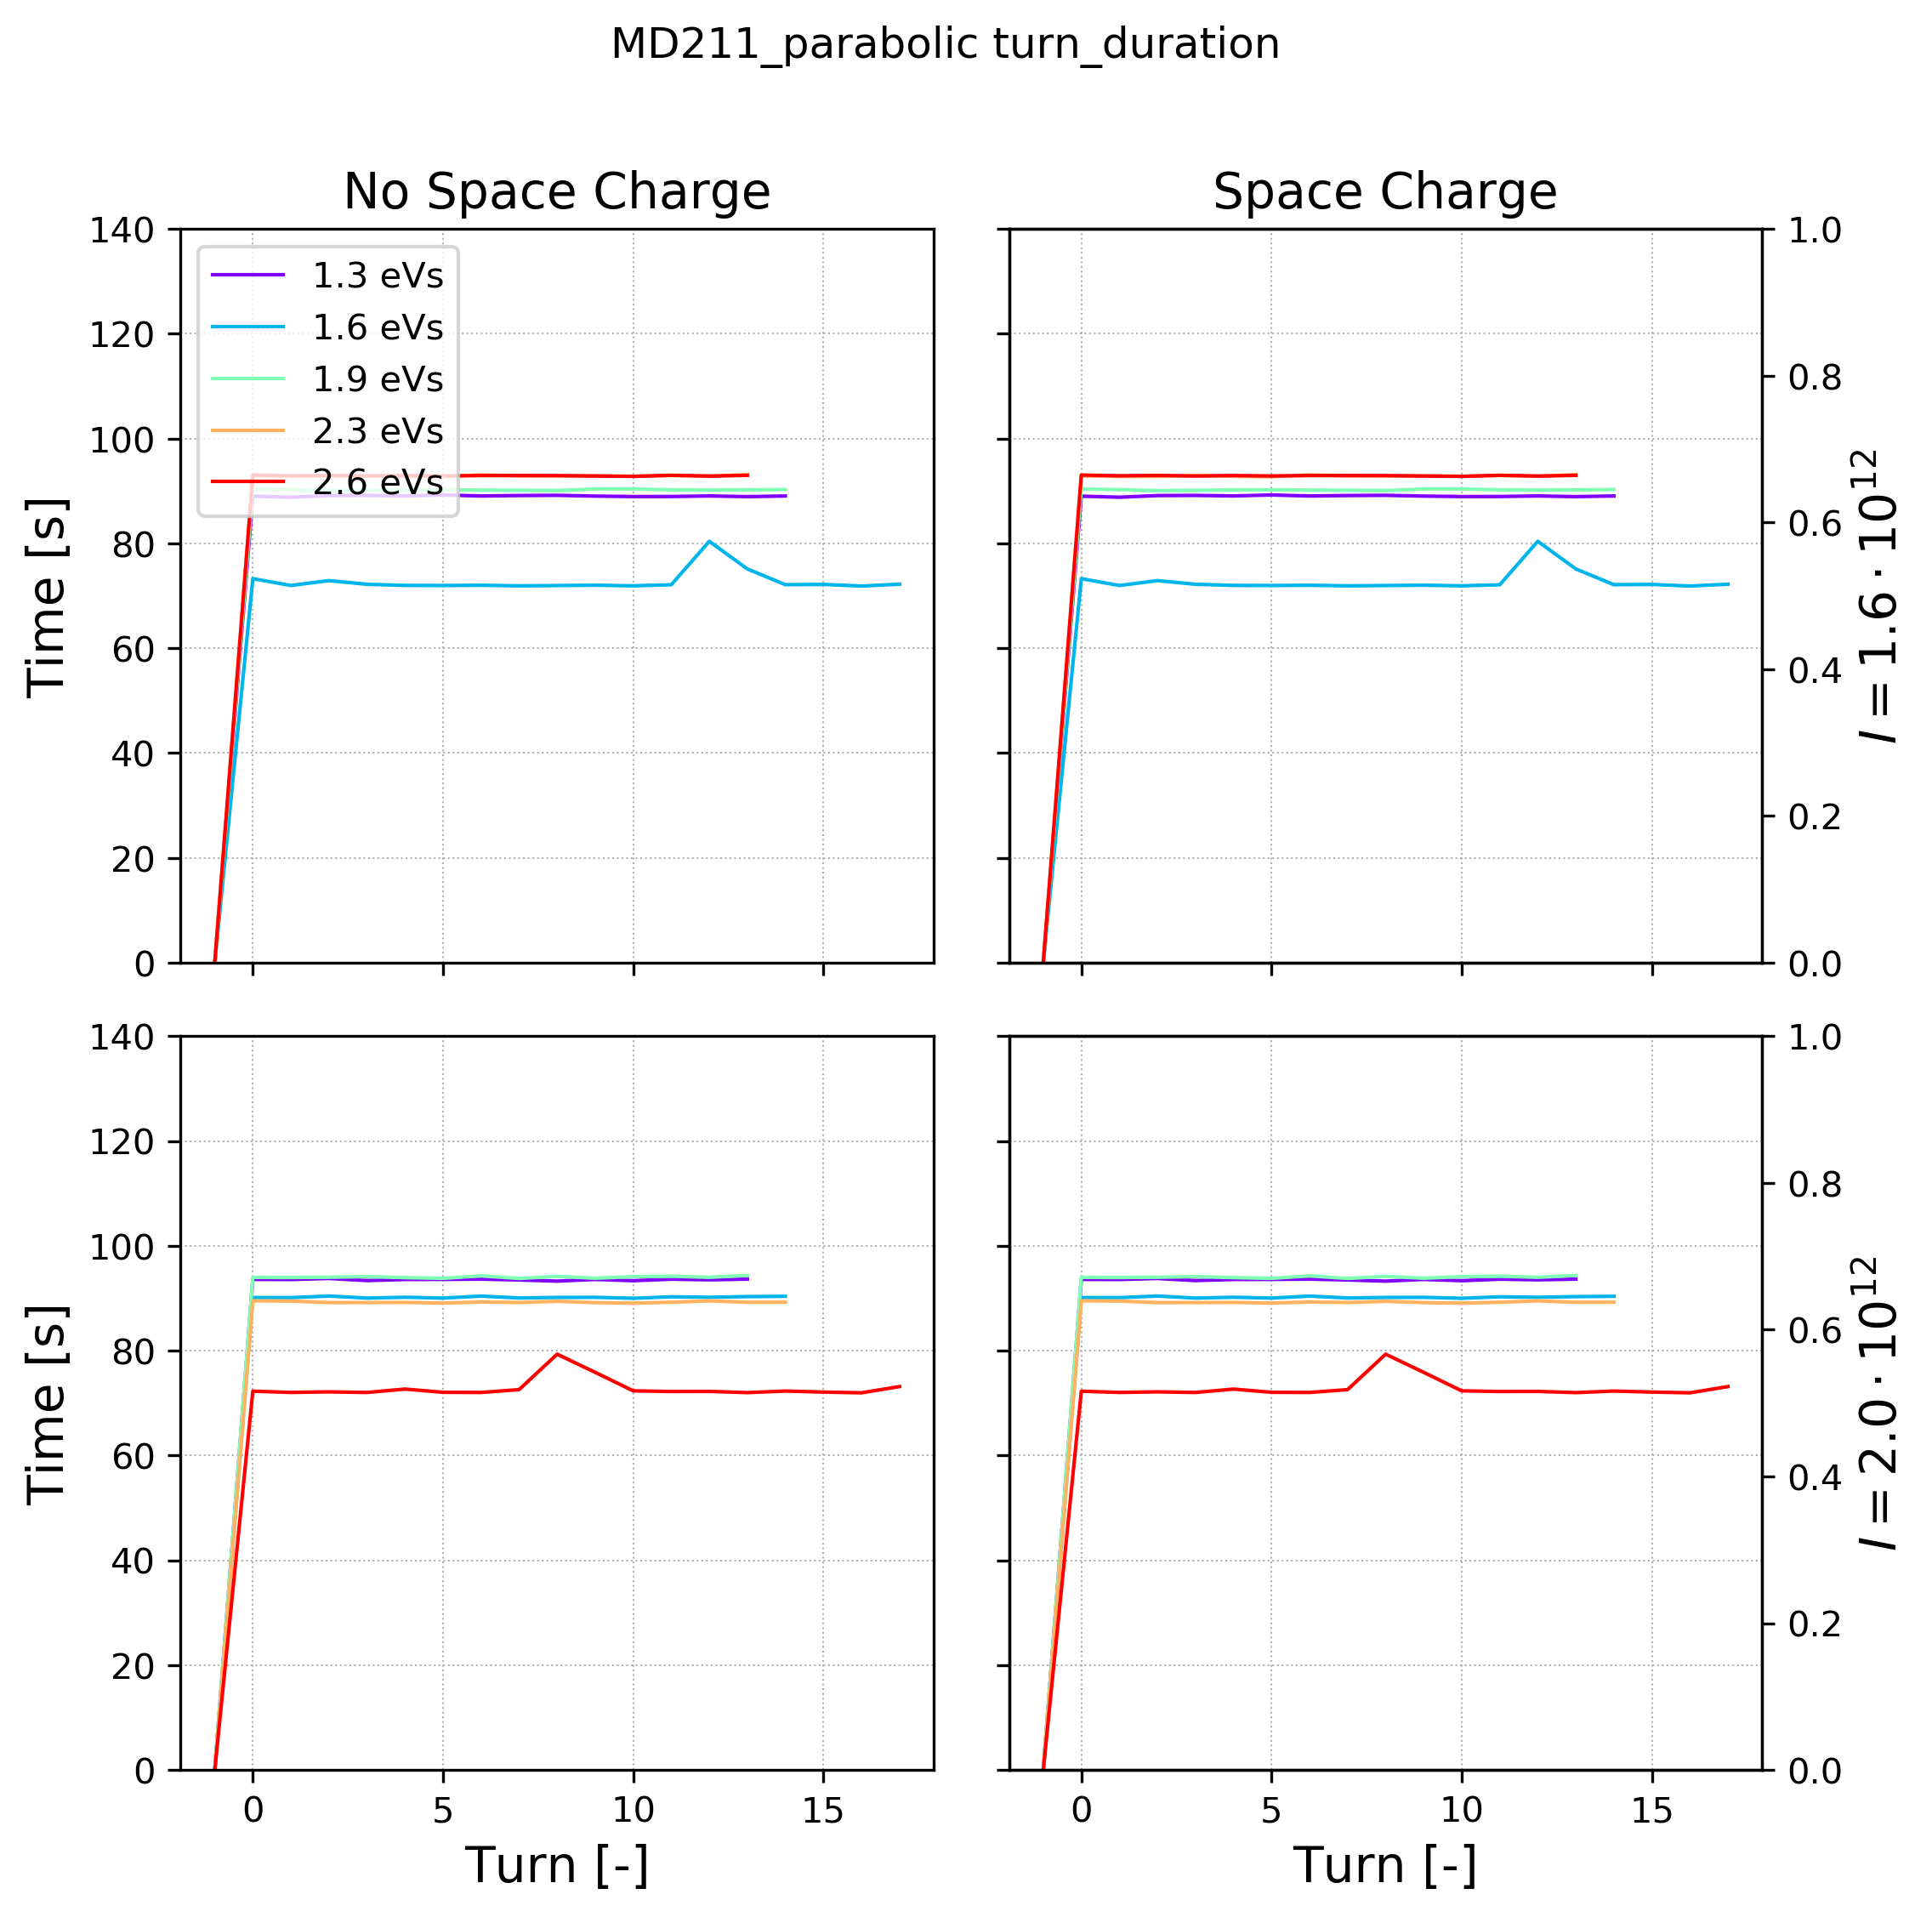

In [24]:
parameter = 'turn_duration'
multi1 = 1

fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
(ax1, ax2), (ax3, ax4) = axs

tit = main_label + ' ' + parameter
fig.suptitle(tit)

ax1.set_ylabel('Time [s]');
ax3.set_ylabel('Time [s]');
ax3.set_xlabel('Turn [-]');
ax4.set_xlabel('Turn [-]');


colors = cm.rainbow(np.linspace(0, 1, len(dd_LI_NoSC.keys())))

c_it = int(0)
for key, value in sorted(dd_LI_NoSC.iteritems()):
        ax1.plot(dd_LI_NoSC[key]['turn'][0], dd_LI_NoSC[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;

ax1.legend(loc=2);
ax1.grid(lw=0.5, ls=':');

c_it = int(0)
for key, value in sorted(dd_HI_SbS.iteritems()):
        ax4.plot(dd_HI_SbS[key]['turn'][0], dd_HI_SbS[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;        
ax4.grid(lw=0.5, ls=':');
ax2.set_title('Space Charge')

c_it = int(0)
for key, value in sorted(dd_HI_NoSC.iteritems()):
        ax3.plot(dd_HI_NoSC[key]['turn'][0], dd_HI_NoSC[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax3.grid(lw=0.5, ls=':');
ax1.set_title('No Space Charge')

c_it = int(0)
for key, value in sorted(dd_LI_SbS.iteritems()):
        ax2.plot(dd_LI_SbS[key]['turn'][0], dd_LI_SbS[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax2.grid(lw=0.5, ls=':');

ax5 = ax2.twinx()
ax5.set_ylabel('$I = 1.6 \cdot 10^{12}$');
ax6 = ax4.twinx()
ax6.set_ylabel('$I = 2.0 \cdot 10^{12}$');

ax1.set_ylim(0,140);
ax3.set_ylim(0,140);

for ax in axs.flat:
    ax.label_outer()
    
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

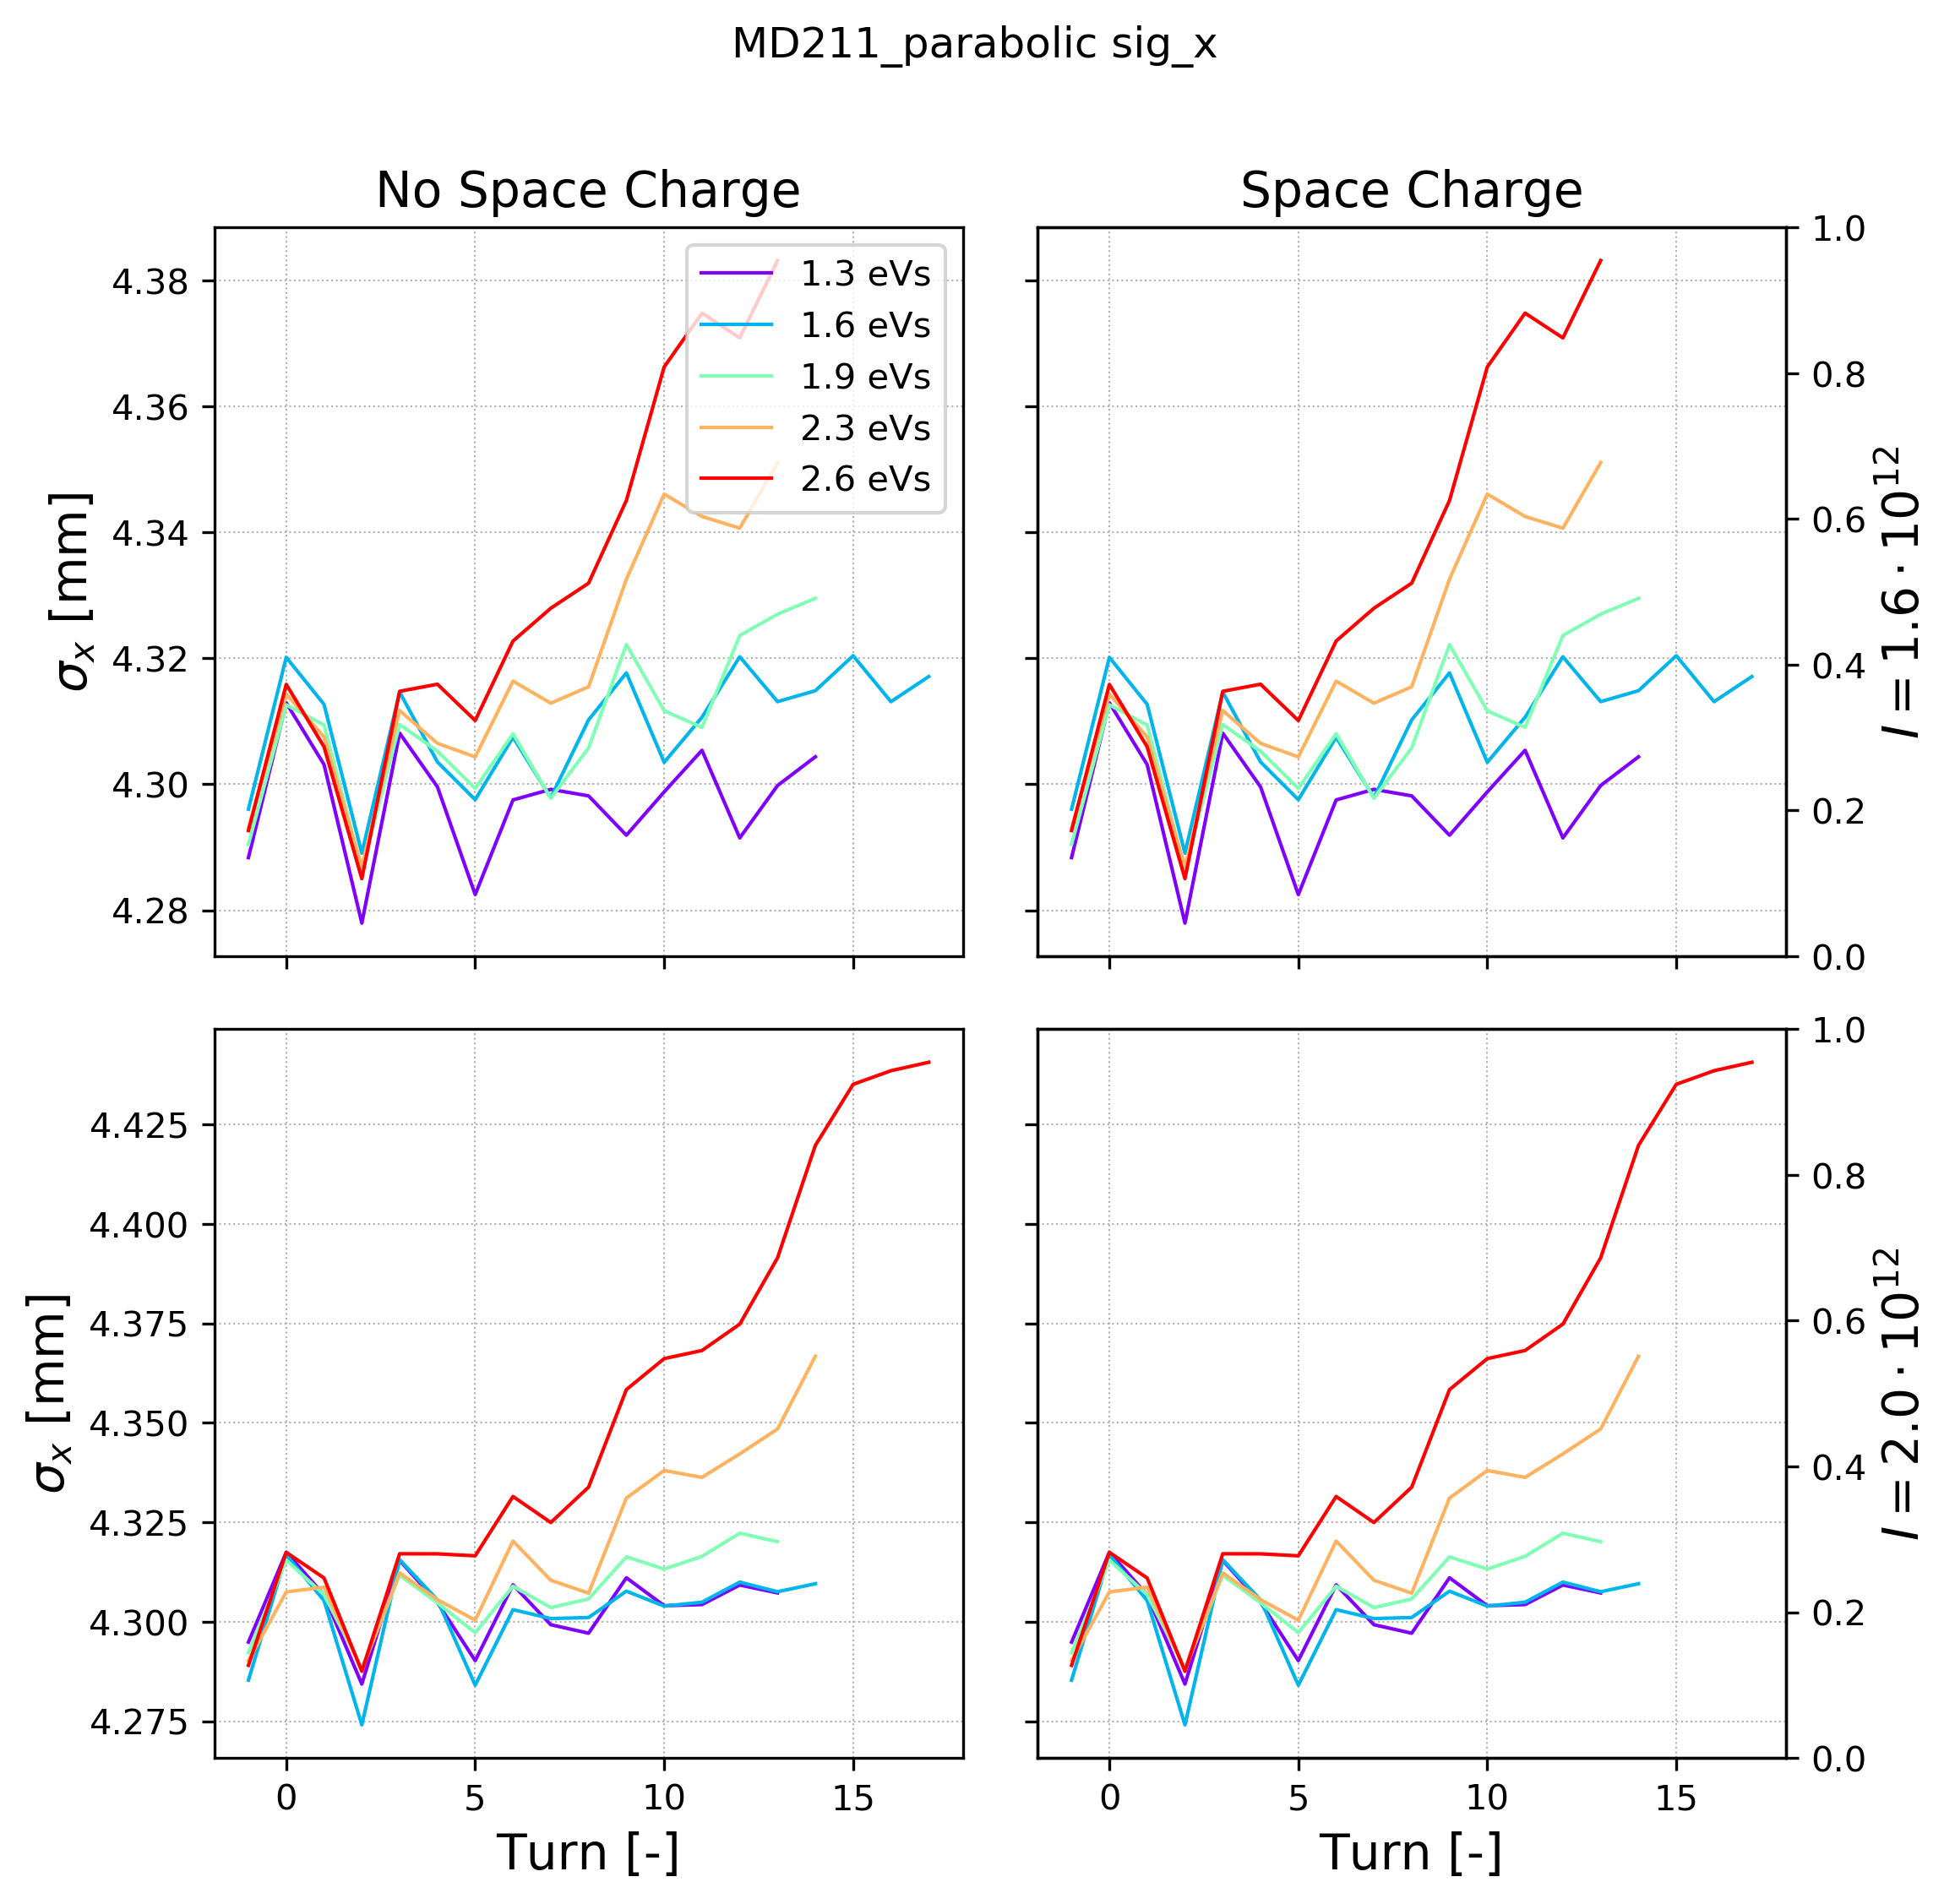

In [25]:
parameter = 'sig_x'
multi1 = 1E3

fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
(ax1, ax2), (ax3, ax4) = axs

tit = main_label + ' ' + parameter
fig.suptitle(tit)

ax1.set_ylabel(r'$\sigma_x$ [mm]');
ax3.set_ylabel(r'$\sigma_x$ [mm]');
ax3.set_xlabel('Turn [-]');
ax4.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd_LI_NoSC.keys())))

c_it = int(0)
for key, value in sorted(dd_LI_NoSC.iteritems()):
        ax1.plot(dd_LI_NoSC[key]['turn'][0], dd_LI_NoSC[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;

ax1.grid(lw=0.5, ls=':');

c_it = int(0)
for key, value in sorted(dd_HI_SbS.iteritems()):
        ax4.plot(dd_HI_SbS[key]['turn'][0], dd_HI_SbS[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;        
ax4.grid(lw=0.5, ls=':');
ax2.set_title('Space Charge')

c_it = int(0)
for key, value in sorted(dd_HI_NoSC.iteritems()):
        ax3.plot(dd_HI_NoSC[key]['turn'][0], dd_HI_NoSC[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax3.grid(lw=0.5, ls=':');
ax1.set_title('No Space Charge')

c_it = int(0)
for key, value in sorted(dd_LI_SbS.iteritems()):
        ax2.plot(dd_LI_SbS[key]['turn'][0], dd_LI_SbS[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax2.grid(lw=0.5, ls=':');

ax5 = ax2.twinx()
ax5.set_ylabel('$I = 1.6 \cdot 10^{12}$');
ax6 = ax4.twinx()
ax6.set_ylabel('$I = 2.0 \cdot 10^{12}$');

ax1.legend(loc=1);
#ax1.set_ylim(4.5,7.5);
#ax3.set_ylim(4.5,7.5);

for ax in axs.flat:
    ax.label_outer()
    
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

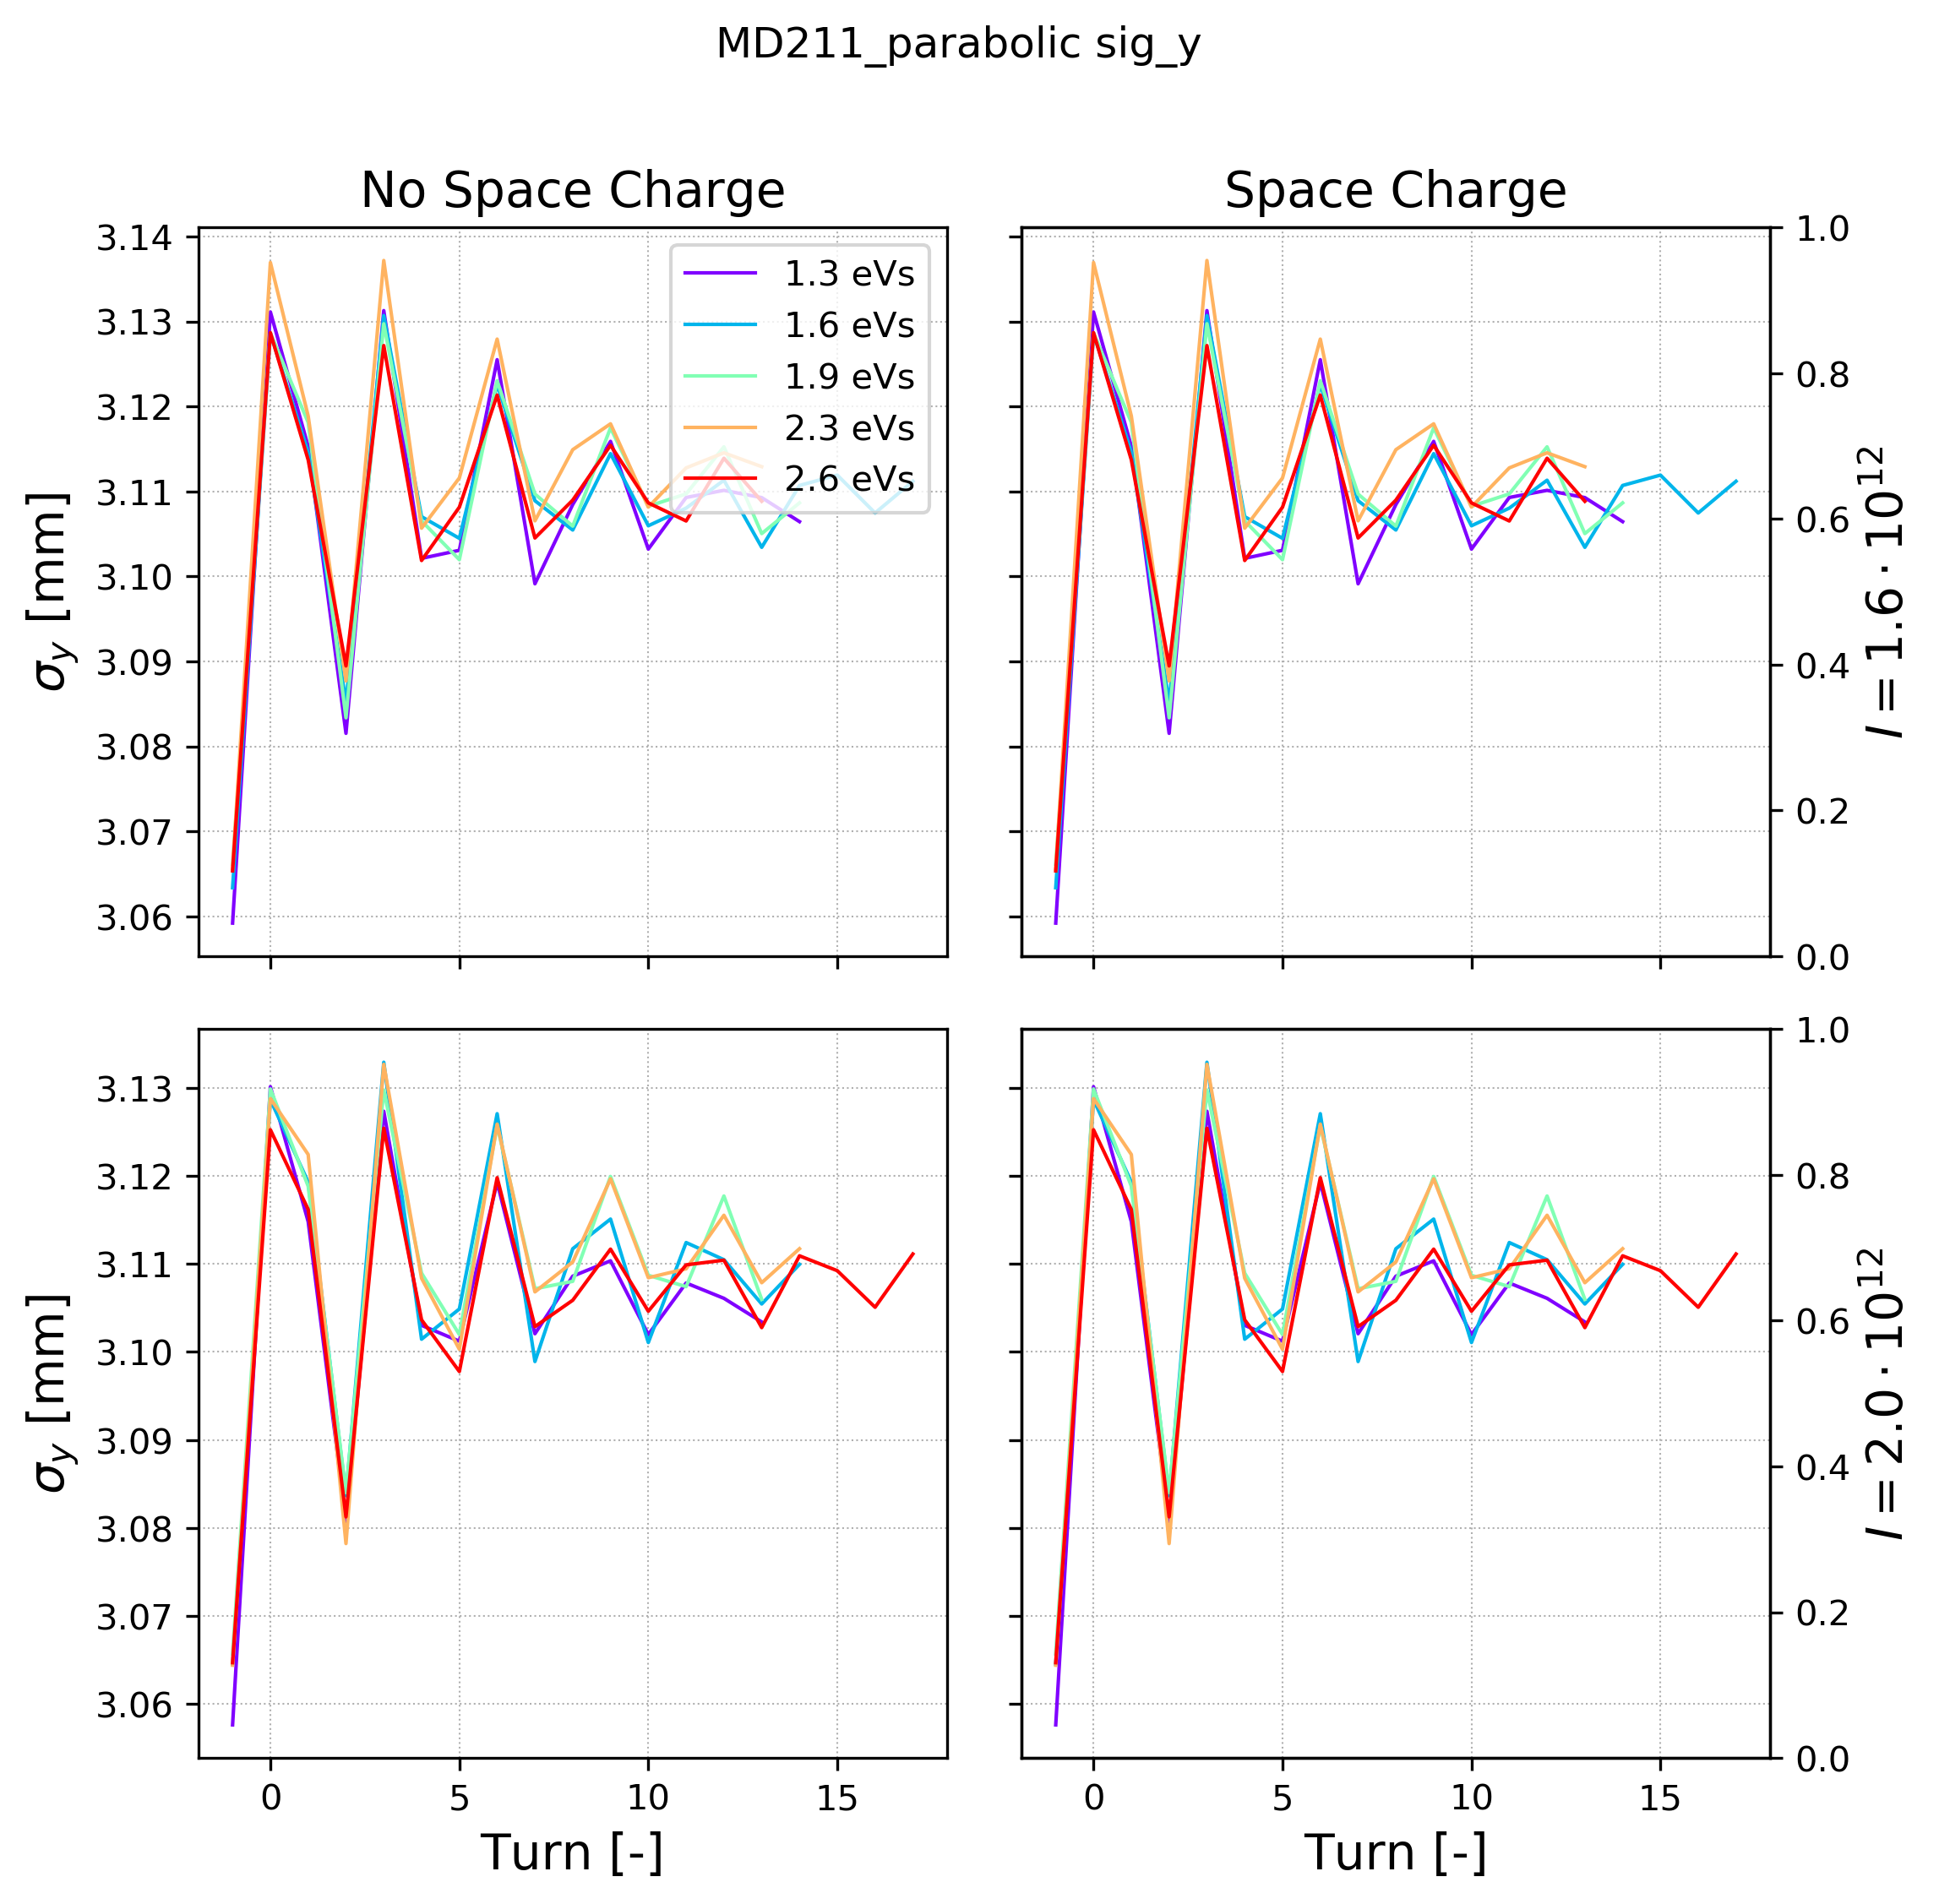

In [12]:
parameter = 'sig_y'
multi1 = 1E3

fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
(ax1, ax2), (ax3, ax4) = axs

tit = main_label + ' ' + parameter
fig.suptitle(tit)

ax1.set_ylabel(r'$\sigma_y$ [mm]');
ax3.set_ylabel(r'$\sigma_y$ [mm]');
ax3.set_xlabel('Turn [-]');
ax4.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd_LI_NoSC.keys())))

c_it = int(0)
for key, value in sorted(dd_LI_NoSC.iteritems()):
        ax1.plot(dd_LI_NoSC[key]['turn'][0], dd_LI_NoSC[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;

ax1.grid(lw=0.5, ls=':');

c_it = int(0)
for key, value in sorted(dd_HI_SbS.iteritems()):
        ax4.plot(dd_HI_SbS[key]['turn'][0], dd_HI_SbS[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;        
ax4.grid(lw=0.5, ls=':');
ax2.set_title('Space Charge')

c_it = int(0)
for key, value in sorted(dd_HI_NoSC.iteritems()):
        ax3.plot(dd_HI_NoSC[key]['turn'][0], dd_HI_NoSC[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax3.grid(lw=0.5, ls=':');
ax1.set_title('No Space Charge')

c_it = int(0)
for key, value in sorted(dd_LI_SbS.iteritems()):
        ax2.plot(dd_LI_SbS[key]['turn'][0], dd_LI_SbS[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax2.grid(lw=0.5, ls=':');

ax5 = ax2.twinx()
ax5.set_ylabel('$I = 1.6 \cdot 10^{12}$');
ax6 = ax4.twinx()
ax6.set_ylabel('$I = 2.0 \cdot 10^{12}$');

ax1.legend(loc=1);
#ax1.set_ylim(4.5,7.5);
#ax3.set_ylim(4.5,7.5);

for ax in axs.flat:
    ax.label_outer()
    
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

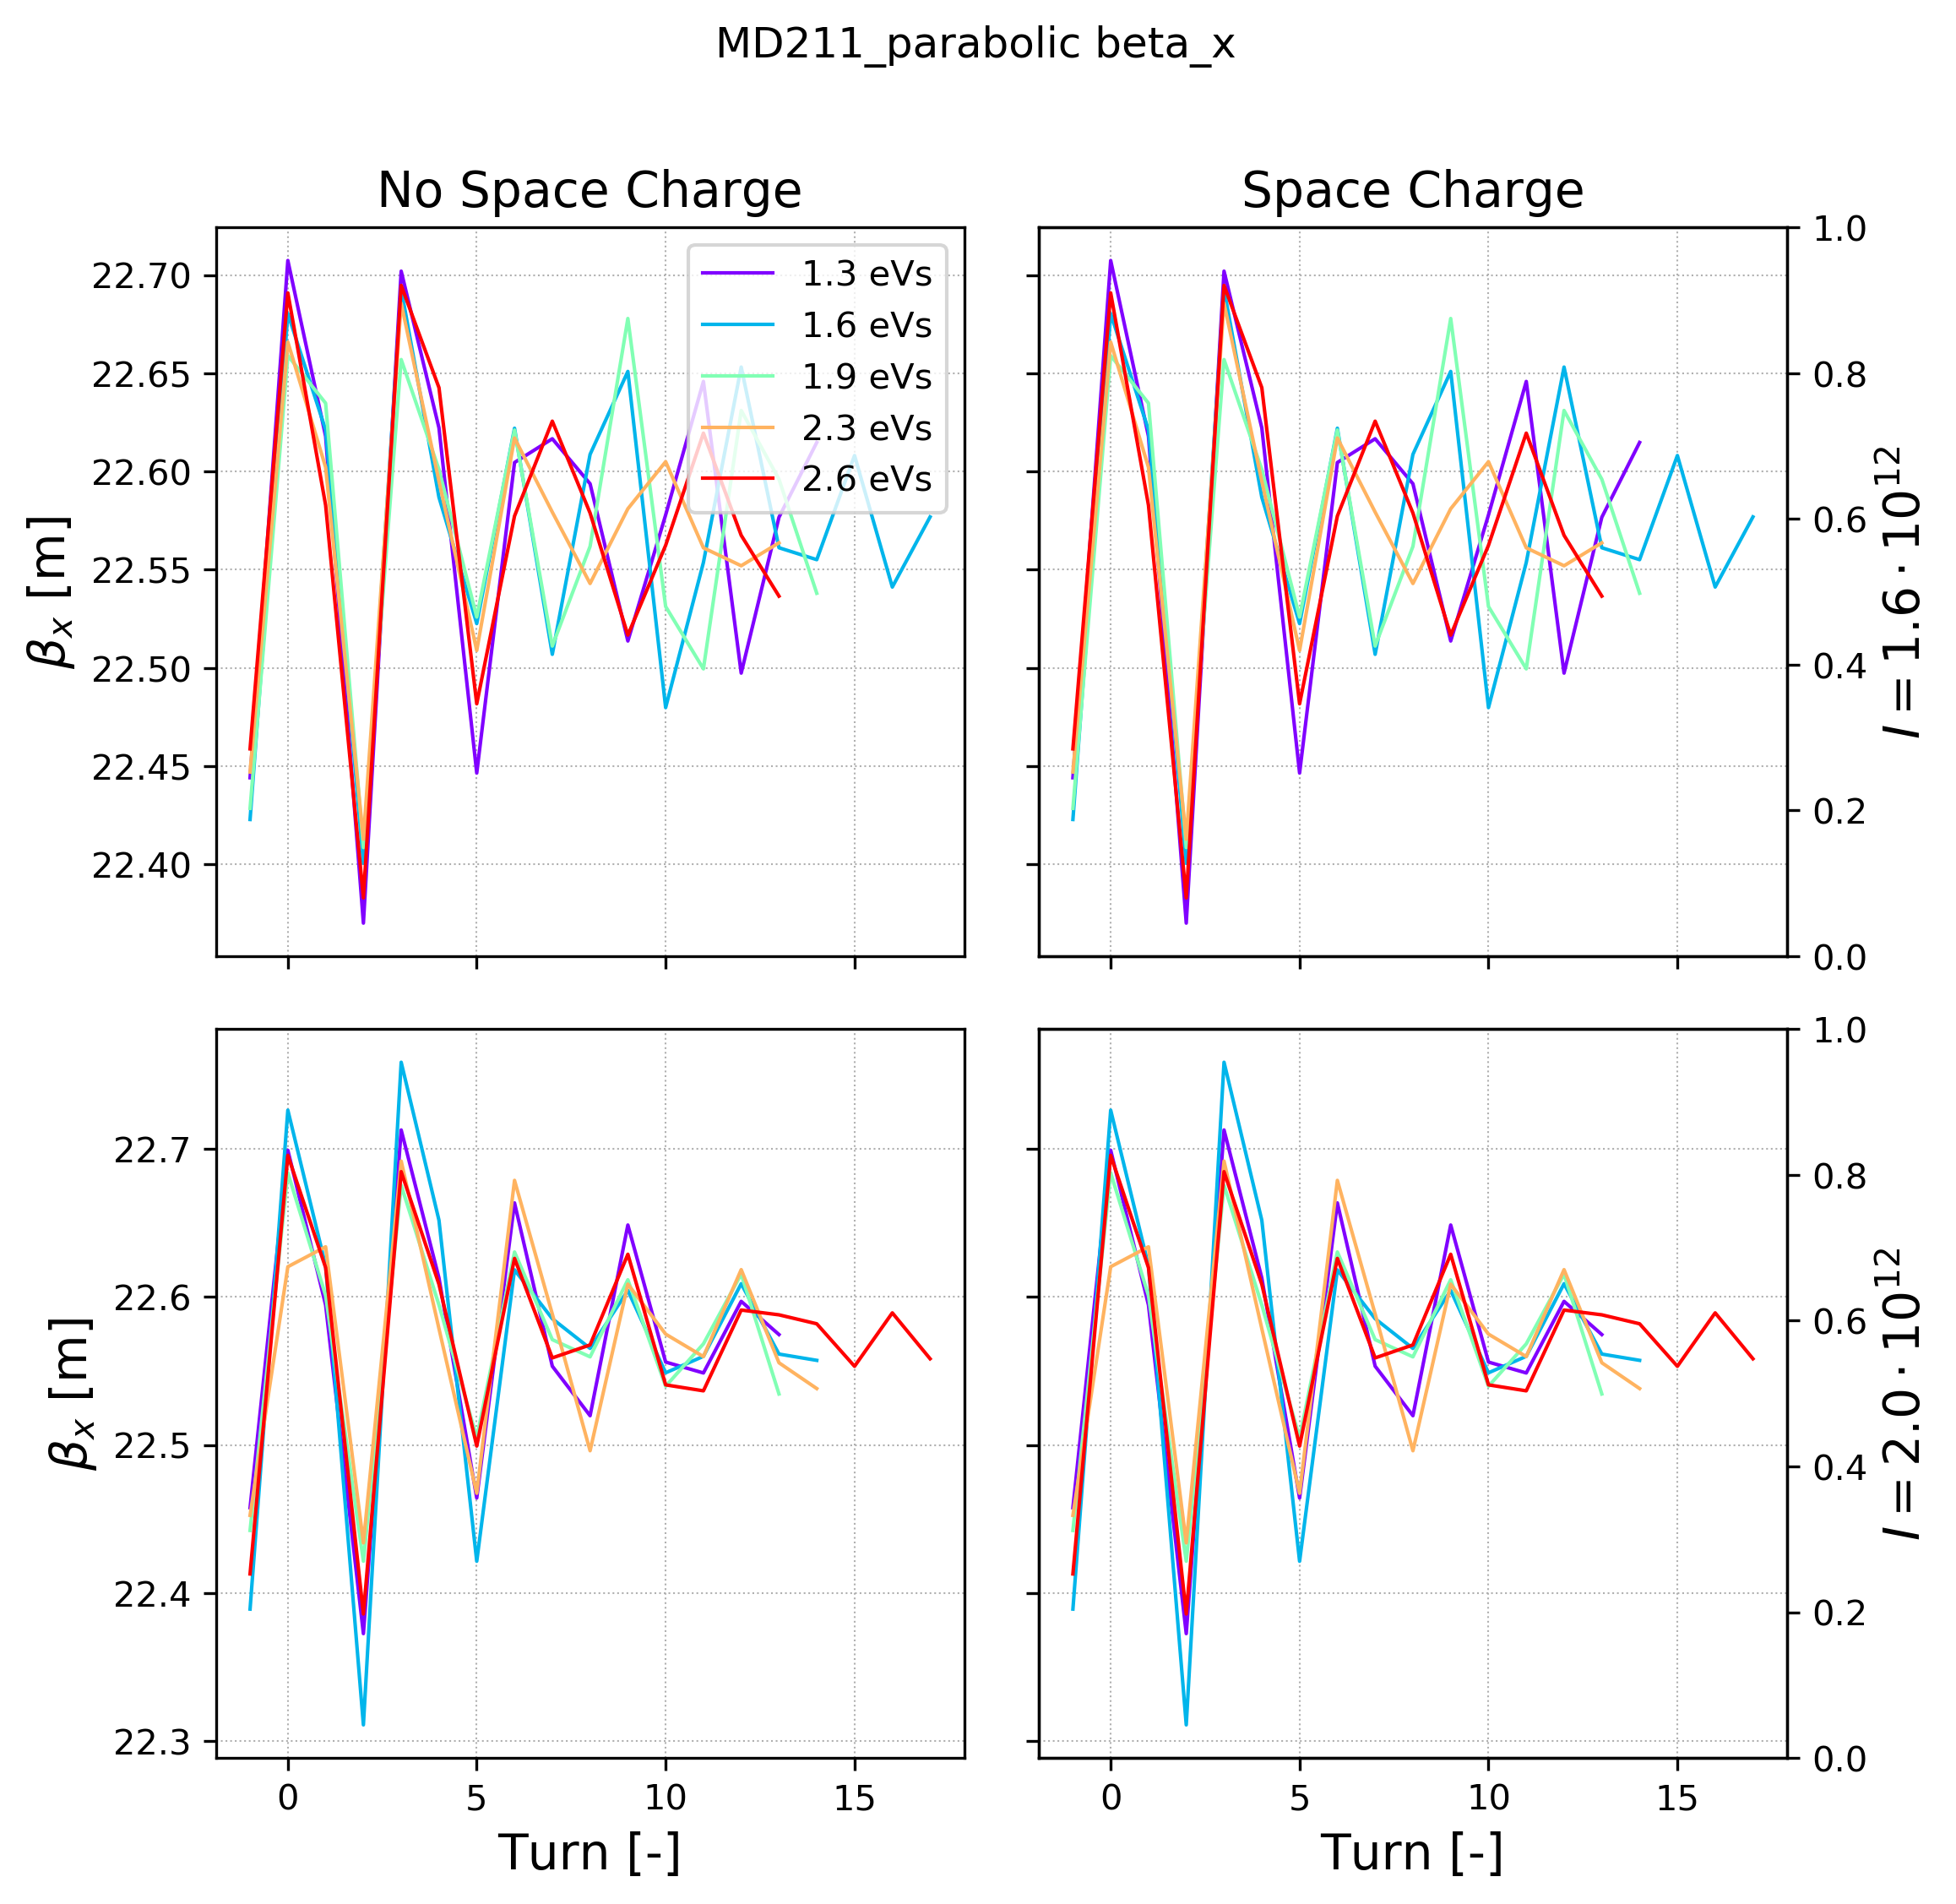

In [13]:
parameter = 'beta_x'
multi1 = 1

fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
(ax1, ax2), (ax3, ax4) = axs

tit = main_label + ' ' + parameter
fig.suptitle(tit)

ax1.set_ylabel(r'$\beta_x$ [m]');
ax3.set_ylabel(r'$\beta_x$ [m]');
ax3.set_xlabel('Turn [-]');
ax4.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd_LI_NoSC.keys())))

c_it = int(0)
for key, value in sorted(dd_LI_NoSC.iteritems()):
        ax1.plot(dd_LI_NoSC[key]['turn'][0], dd_LI_NoSC[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;

ax1.grid(lw=0.5, ls=':');

c_it = int(0)
for key, value in sorted(dd_HI_SbS.iteritems()):
        ax4.plot(dd_HI_SbS[key]['turn'][0], dd_HI_SbS[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;        
ax4.grid(lw=0.5, ls=':');
ax2.set_title('Space Charge')

c_it = int(0)
for key, value in sorted(dd_HI_NoSC.iteritems()):
        ax3.plot(dd_HI_NoSC[key]['turn'][0], dd_HI_NoSC[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax3.grid(lw=0.5, ls=':');
ax1.set_title('No Space Charge')

c_it = int(0)
for key, value in sorted(dd_LI_SbS.iteritems()):
        ax2.plot(dd_LI_SbS[key]['turn'][0], dd_LI_SbS[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax2.grid(lw=0.5, ls=':');

ax5 = ax2.twinx()
ax5.set_ylabel('$I = 1.6 \cdot 10^{12}$');
ax6 = ax4.twinx()
ax6.set_ylabel('$I = 2.0 \cdot 10^{12}$');

ax1.legend(loc=1);
#ax1.set_ylim(4.5,7.5);
#ax3.set_ylim(4.5,7.5);

for ax in axs.flat:
    ax.label_outer()
    
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

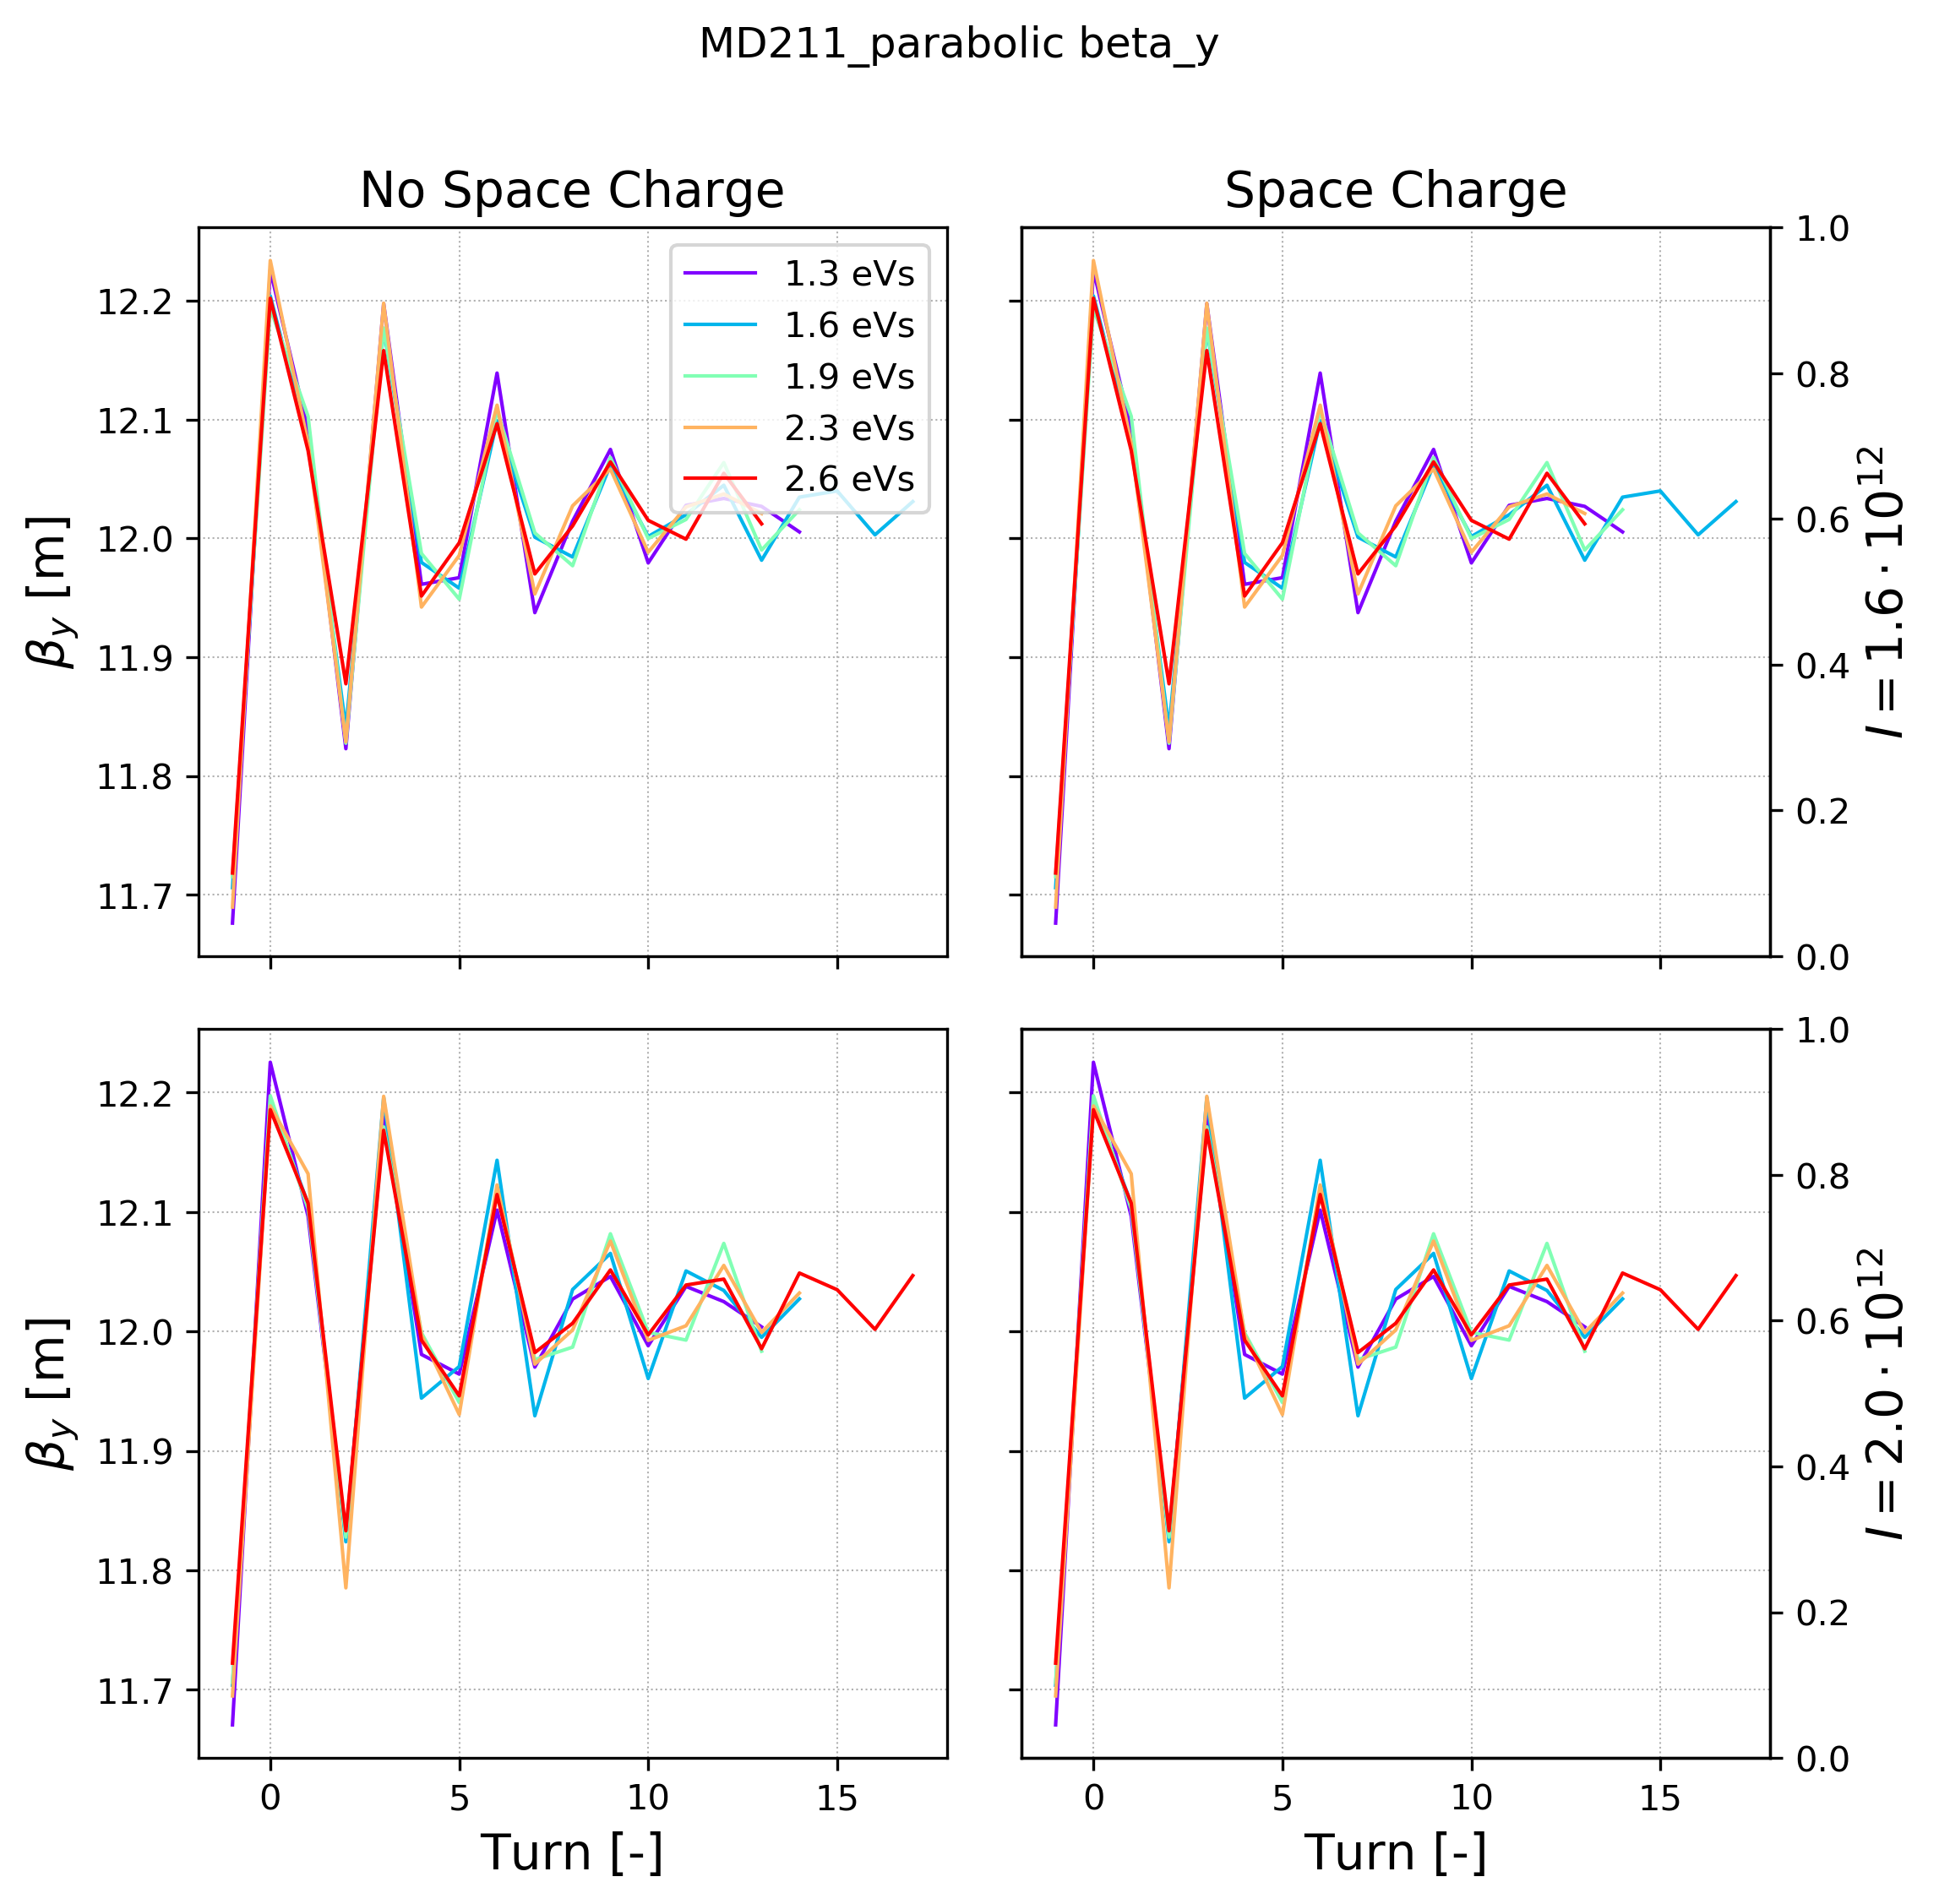

In [14]:
parameter = 'beta_y'
multi1 = 1

fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
(ax1, ax2), (ax3, ax4) = axs

tit = main_label + ' ' + parameter
fig.suptitle(tit)

ax1.set_ylabel(r'$\beta_y$ [m]');
ax3.set_ylabel(r'$\beta_y$ [m]');
ax3.set_xlabel('Turn [-]');
ax4.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd_LI_NoSC.keys())))

c_it = int(0)
for key, value in sorted(dd_LI_NoSC.iteritems()):
        ax1.plot(dd_LI_NoSC[key]['turn'][0], dd_LI_NoSC[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;

ax1.grid(lw=0.5, ls=':');

c_it = int(0)
for key, value in sorted(dd_HI_SbS.iteritems()):
        ax4.plot(dd_HI_SbS[key]['turn'][0], dd_HI_SbS[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;        
ax4.grid(lw=0.5, ls=':');
ax2.set_title('Space Charge')

c_it = int(0)
for key, value in sorted(dd_HI_NoSC.iteritems()):
        ax3.plot(dd_HI_NoSC[key]['turn'][0], dd_HI_NoSC[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax3.grid(lw=0.5, ls=':');
ax1.set_title('No Space Charge')

c_it = int(0)
for key, value in sorted(dd_LI_SbS.iteritems()):
        ax2.plot(dd_LI_SbS[key]['turn'][0], dd_LI_SbS[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax2.grid(lw=0.5, ls=':');

ax5 = ax2.twinx()
ax5.set_ylabel('$I = 1.6 \cdot 10^{12}$');
ax6 = ax4.twinx()
ax6.set_ylabel('$I = 2.0 \cdot 10^{12}$');

ax1.legend(loc=1);
#ax1.set_ylim(4.5,7.5);
#ax3.set_ylim(4.5,7.5);

for ax in axs.flat:
    ax.label_outer()
    
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

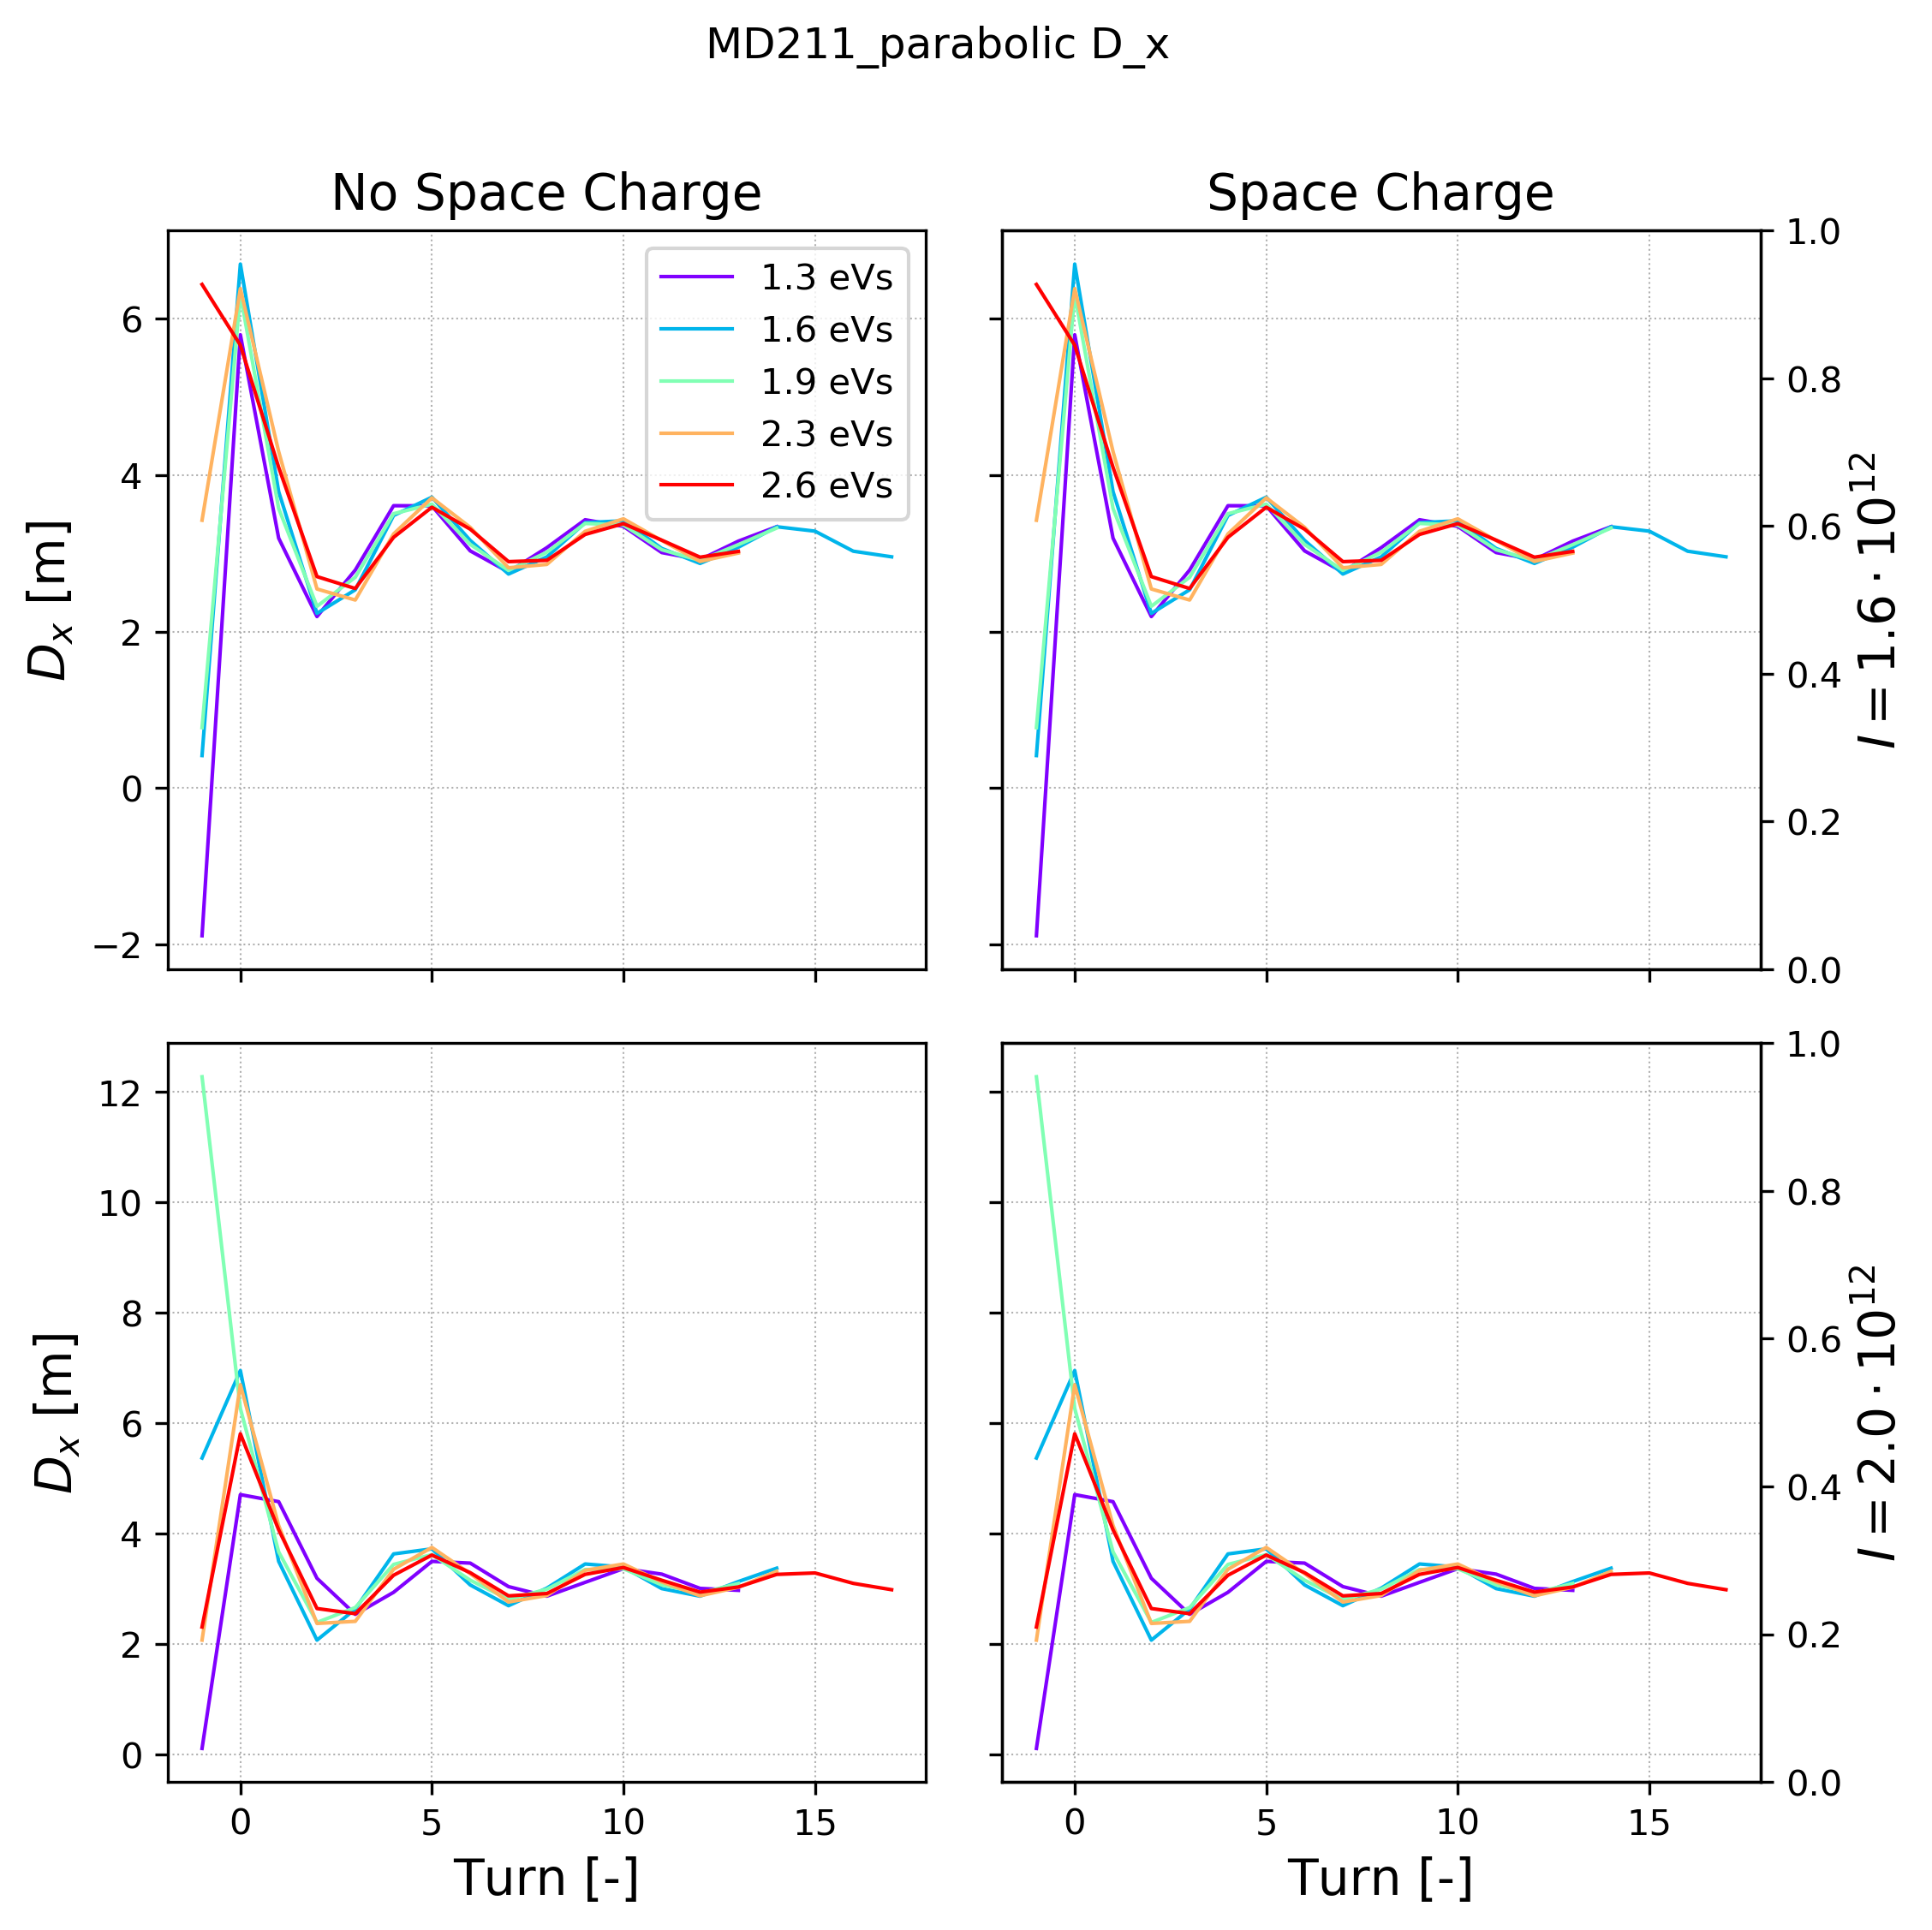

In [15]:
parameter = 'D_x'
multi1 = 1

fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
(ax1, ax2), (ax3, ax4) = axs

tit = main_label + ' ' + parameter
fig.suptitle(tit)

ax1.set_ylabel(r'$D_x$ [m]');
ax3.set_ylabel(r'$D_x$ [m]');
ax3.set_xlabel('Turn [-]');
ax4.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd_LI_NoSC.keys())))

c_it = int(0)
for key, value in sorted(dd_LI_NoSC.iteritems()):
        ax1.plot(dd_LI_NoSC[key]['turn'][0], dd_LI_NoSC[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;

ax1.grid(lw=0.5, ls=':');

c_it = int(0)
for key, value in sorted(dd_HI_SbS.iteritems()):
        ax4.plot(dd_HI_SbS[key]['turn'][0], dd_HI_SbS[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;        
ax4.grid(lw=0.5, ls=':');
ax2.set_title('Space Charge')

c_it = int(0)
for key, value in sorted(dd_HI_NoSC.iteritems()):
        ax3.plot(dd_HI_NoSC[key]['turn'][0], dd_HI_NoSC[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax3.grid(lw=0.5, ls=':');
ax1.set_title('No Space Charge')

c_it = int(0)
for key, value in sorted(dd_LI_SbS.iteritems()):
        ax2.plot(dd_LI_SbS[key]['turn'][0], dd_LI_SbS[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax2.grid(lw=0.5, ls=':');

ax5 = ax2.twinx()
ax5.set_ylabel('$I = 1.6 \cdot 10^{12}$');
ax6 = ax4.twinx()
ax6.set_ylabel('$I = 2.0 \cdot 10^{12}$');

ax1.legend(loc=1);
#ax1.set_ylim(4.5,7.5);
#ax3.set_ylim(4.5,7.5);

for ax in axs.flat:
    ax.label_outer()
    
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

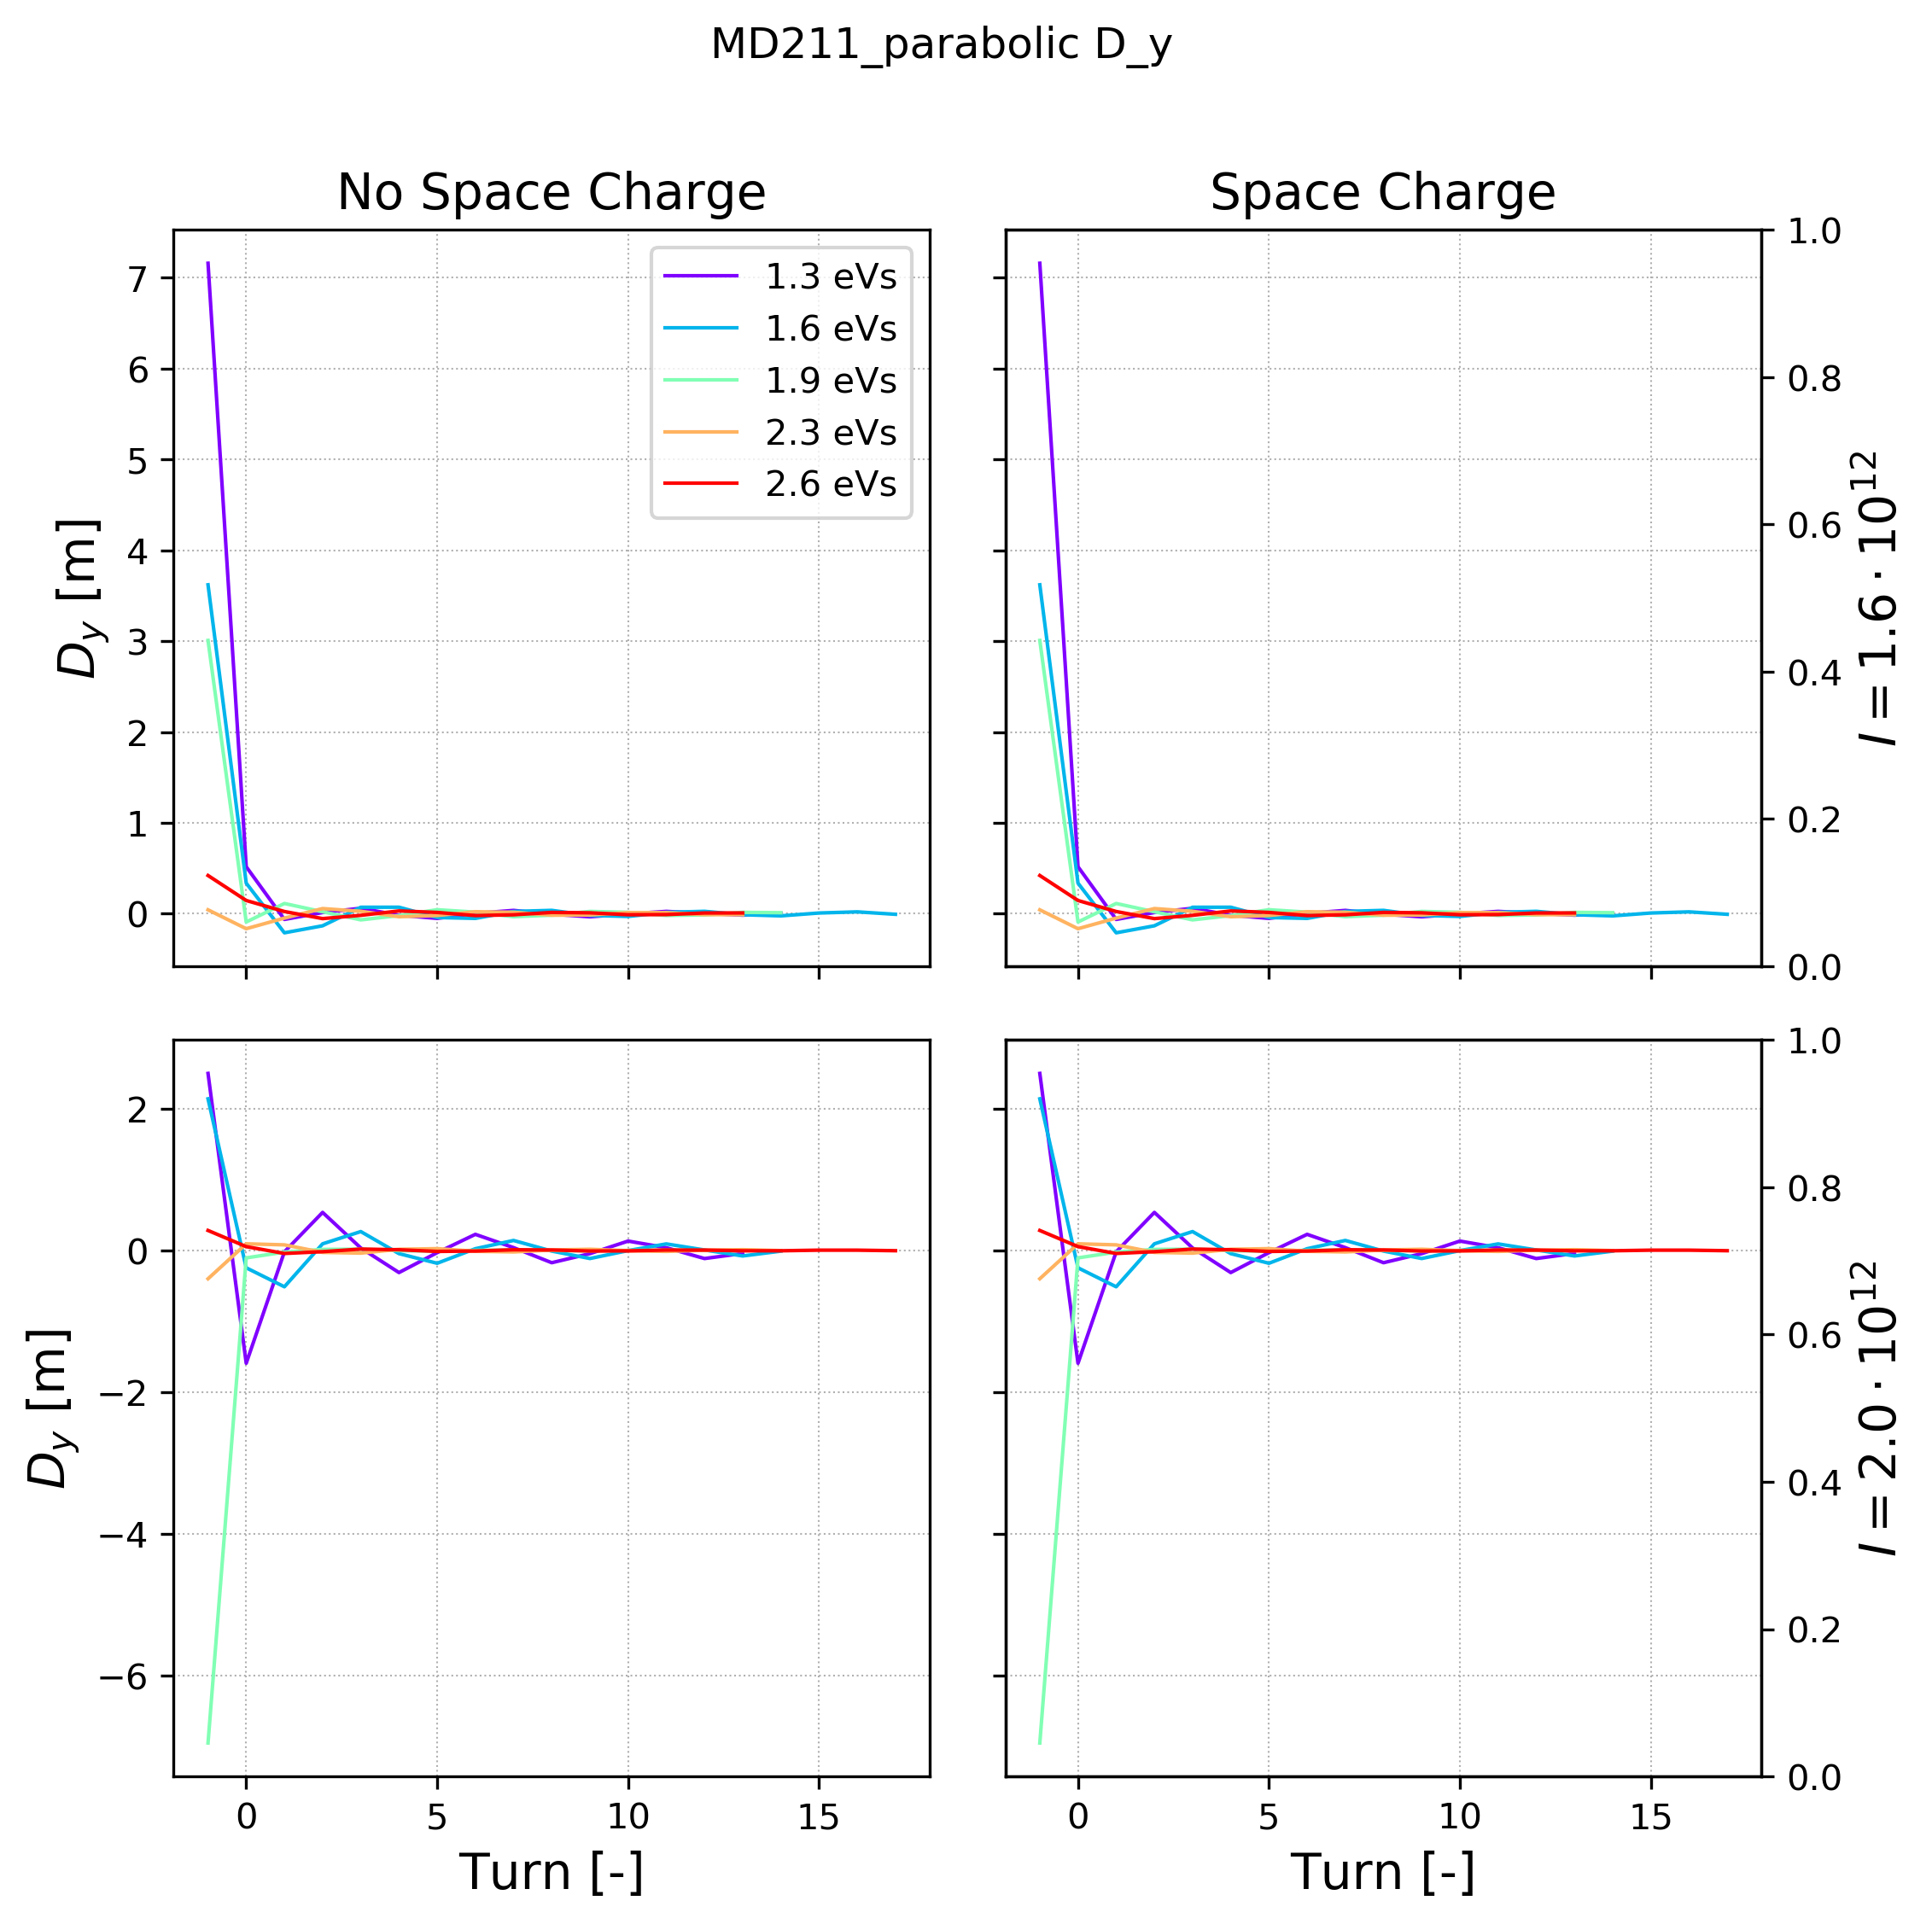

In [16]:
parameter = 'D_y'
multi1 = 1

fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
(ax1, ax2), (ax3, ax4) = axs

tit = main_label + ' ' + parameter
fig.suptitle(tit)

ax1.set_ylabel(r'$D_y$ [m]');
ax3.set_ylabel(r'$D_y$ [m]');
ax3.set_xlabel('Turn [-]');
ax4.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd_LI_NoSC.keys())))

c_it = int(0)
for key, value in sorted(dd_LI_NoSC.iteritems()):
        ax1.plot(dd_LI_NoSC[key]['turn'][0], dd_LI_NoSC[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;

ax1.grid(lw=0.5, ls=':');

c_it = int(0)
for key, value in sorted(dd_HI_SbS.iteritems()):
        ax4.plot(dd_HI_SbS[key]['turn'][0], dd_HI_SbS[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;        
ax4.grid(lw=0.5, ls=':');
ax2.set_title('Space Charge')

c_it = int(0)
for key, value in sorted(dd_HI_NoSC.iteritems()):
        ax3.plot(dd_HI_NoSC[key]['turn'][0], dd_HI_NoSC[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax3.grid(lw=0.5, ls=':');
ax1.set_title('No Space Charge')

c_it = int(0)
for key, value in sorted(dd_LI_SbS.iteritems()):
        ax2.plot(dd_LI_SbS[key]['turn'][0], dd_LI_SbS[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax2.grid(lw=0.5, ls=':');

ax5 = ax2.twinx()
ax5.set_ylabel('$I = 1.6 \cdot 10^{12}$');
ax6 = ax4.twinx()
ax6.set_ylabel('$I = 2.0 \cdot 10^{12}$');

ax1.legend(loc=1);
#ax1.set_ylim(4.5,7.5);
#ax3.set_ylim(4.5,7.5);

for ax in axs.flat:
    ax.label_outer()
    
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

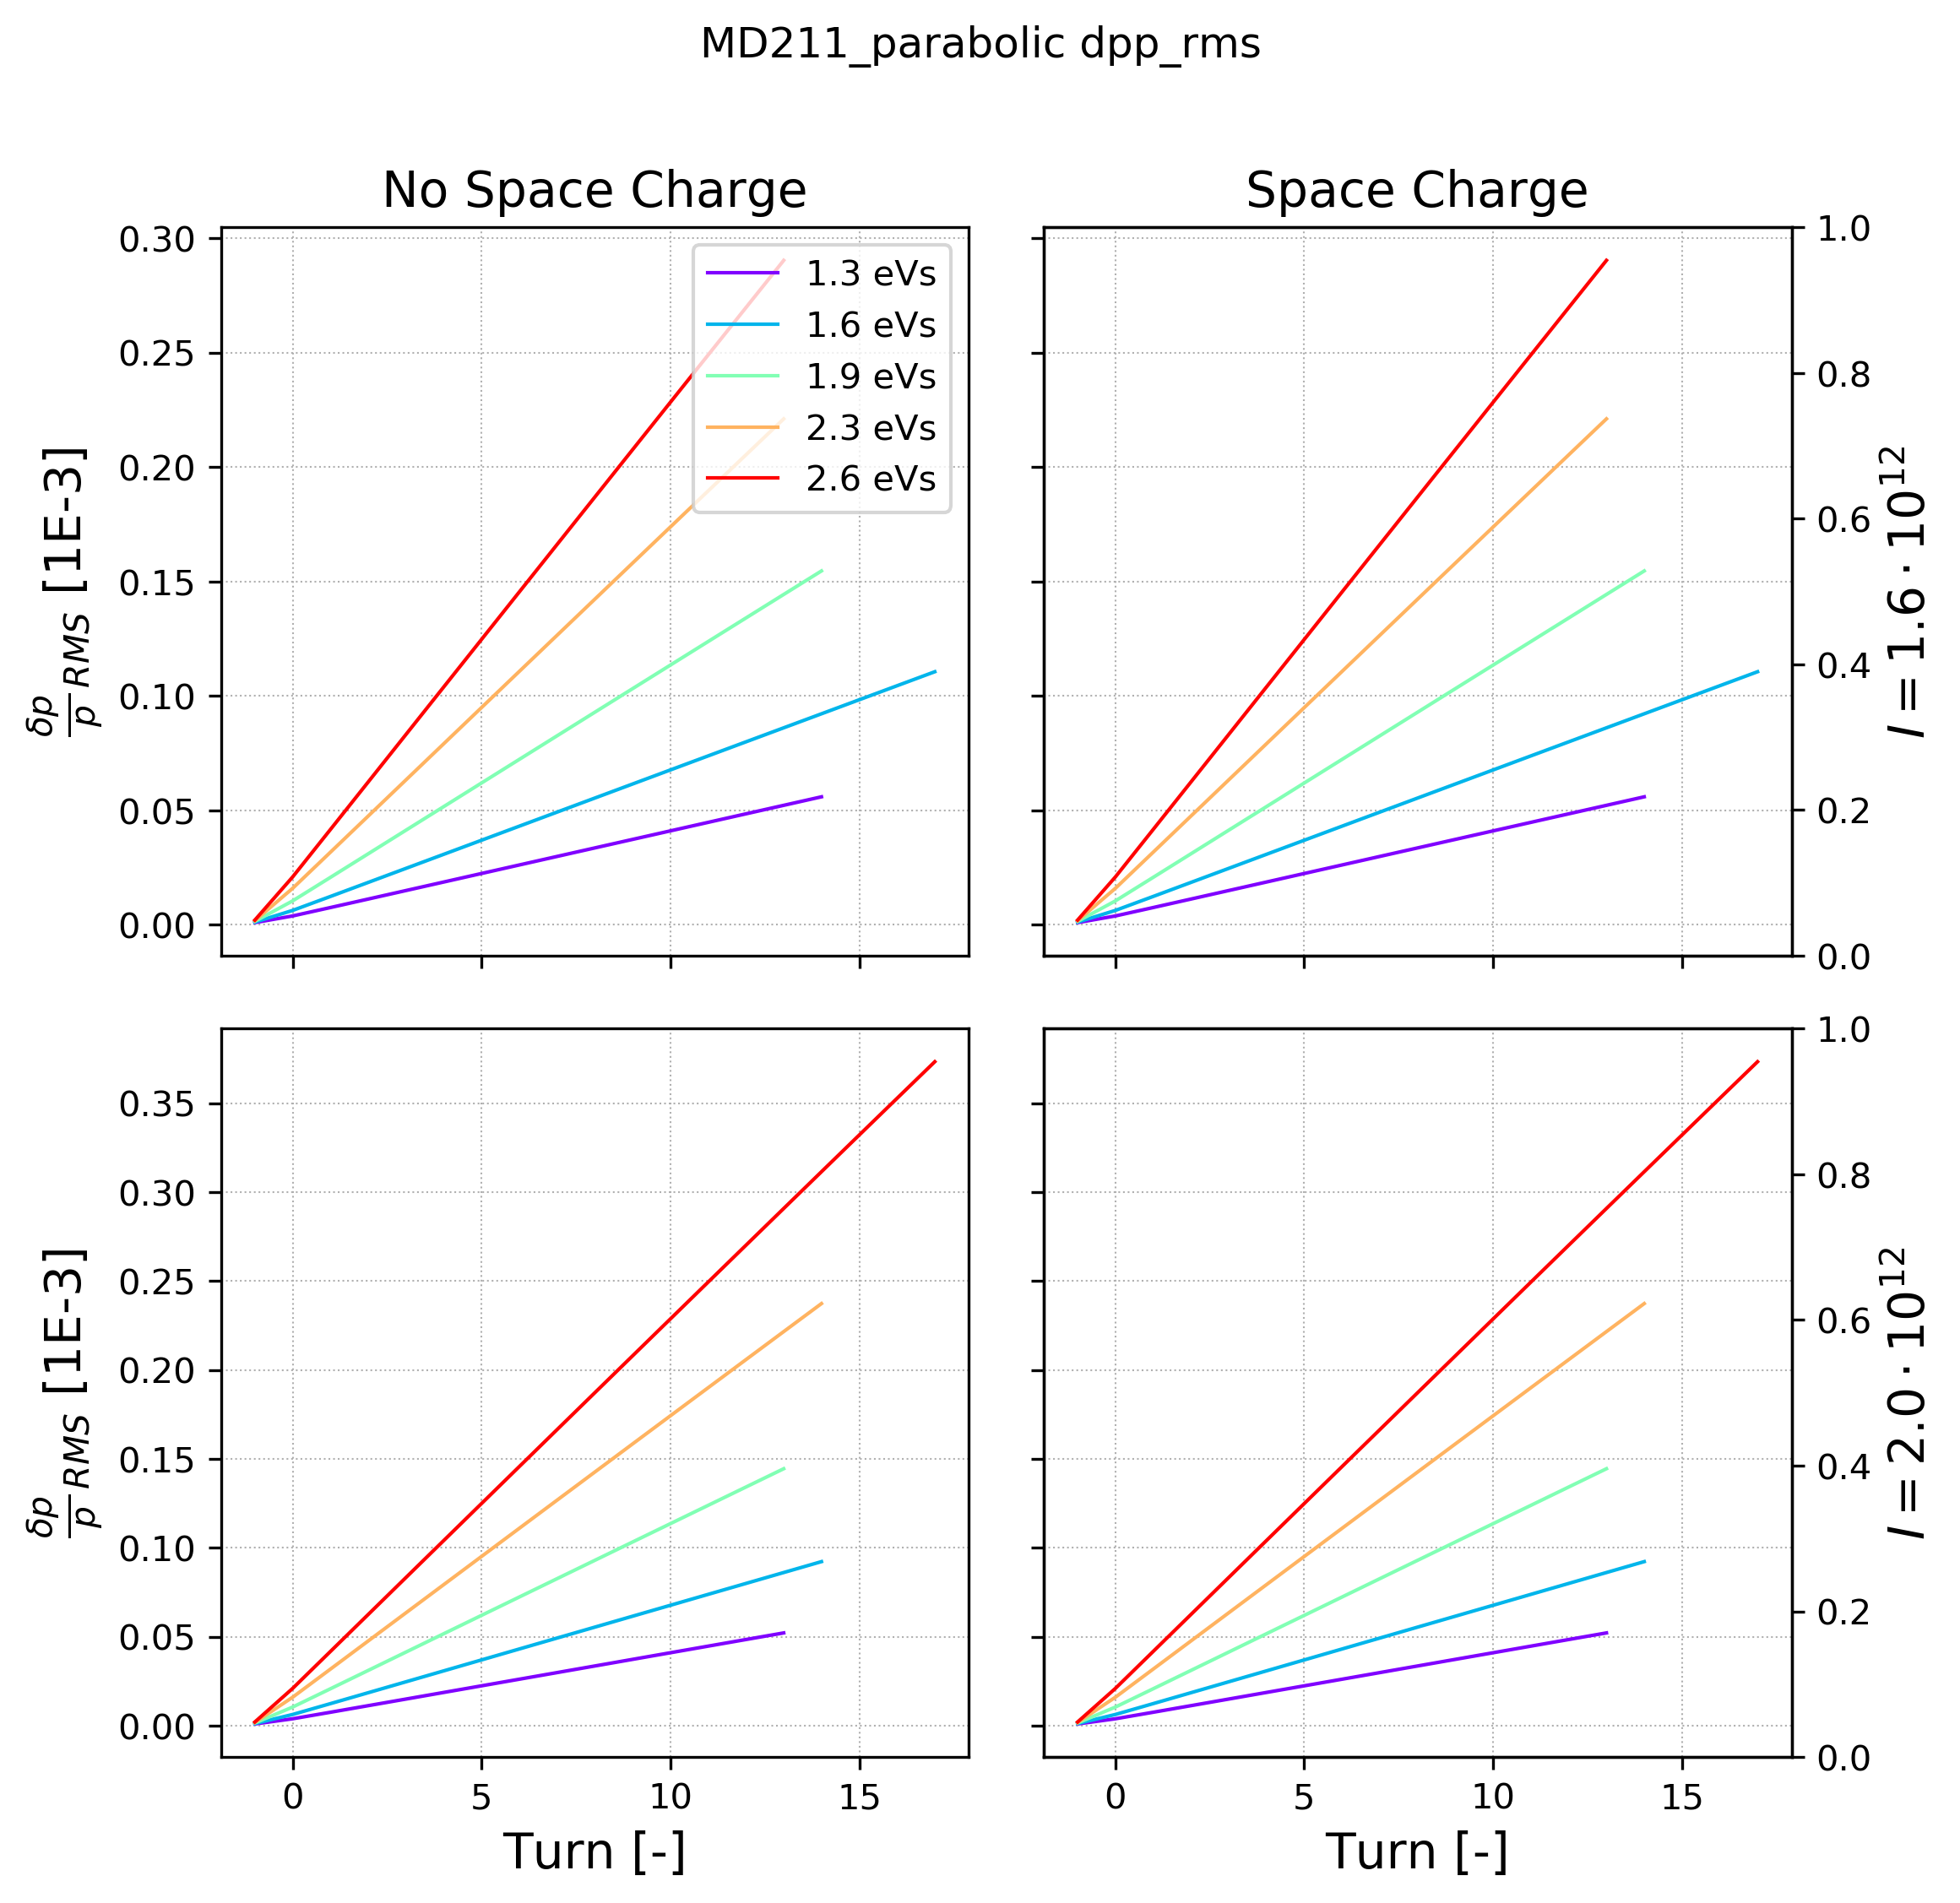

In [17]:
parameter = 'dpp_rms'
multi1 = 1E3

fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
(ax1, ax2), (ax3, ax4) = axs

tit = main_label + ' ' + parameter
fig.suptitle(tit)

ax1.set_ylabel(r'$\frac{\delta p}{p}_{RMS}$ [1E-3]');
ax3.set_ylabel(r'$\frac{\delta p}{p}_{RMS}$ [1E-3]');
ax3.set_xlabel('Turn [-]');
ax4.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd_LI_NoSC.keys())))

c_it = int(0)
for key, value in sorted(dd_LI_NoSC.iteritems()):
        ax1.plot(dd_LI_NoSC[key]['turn'][0], dd_LI_NoSC[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;

ax1.grid(lw=0.5, ls=':');

c_it = int(0)
for key, value in sorted(dd_HI_SbS.iteritems()):
        ax4.plot(dd_HI_SbS[key]['turn'][0], dd_HI_SbS[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;        
ax4.grid(lw=0.5, ls=':');
ax2.set_title('Space Charge')

c_it = int(0)
for key, value in sorted(dd_HI_NoSC.iteritems()):
        ax3.plot(dd_HI_NoSC[key]['turn'][0], dd_HI_NoSC[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax3.grid(lw=0.5, ls=':');
ax1.set_title('No Space Charge')

c_it = int(0)
for key, value in sorted(dd_LI_SbS.iteritems()):
        ax2.plot(dd_LI_SbS[key]['turn'][0], dd_LI_SbS[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax2.grid(lw=0.5, ls=':');

ax5 = ax2.twinx()
ax5.set_ylabel('$I = 1.6 \cdot 10^{12}$');
ax6 = ax4.twinx()
ax6.set_ylabel('$I = 2.0 \cdot 10^{12}$');

ax1.legend(loc=1);
#ax1.set_ylim(4.5,7.5);
#ax3.set_ylim(4.5,7.5);

for ax in axs.flat:
    ax.label_outer()
    
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

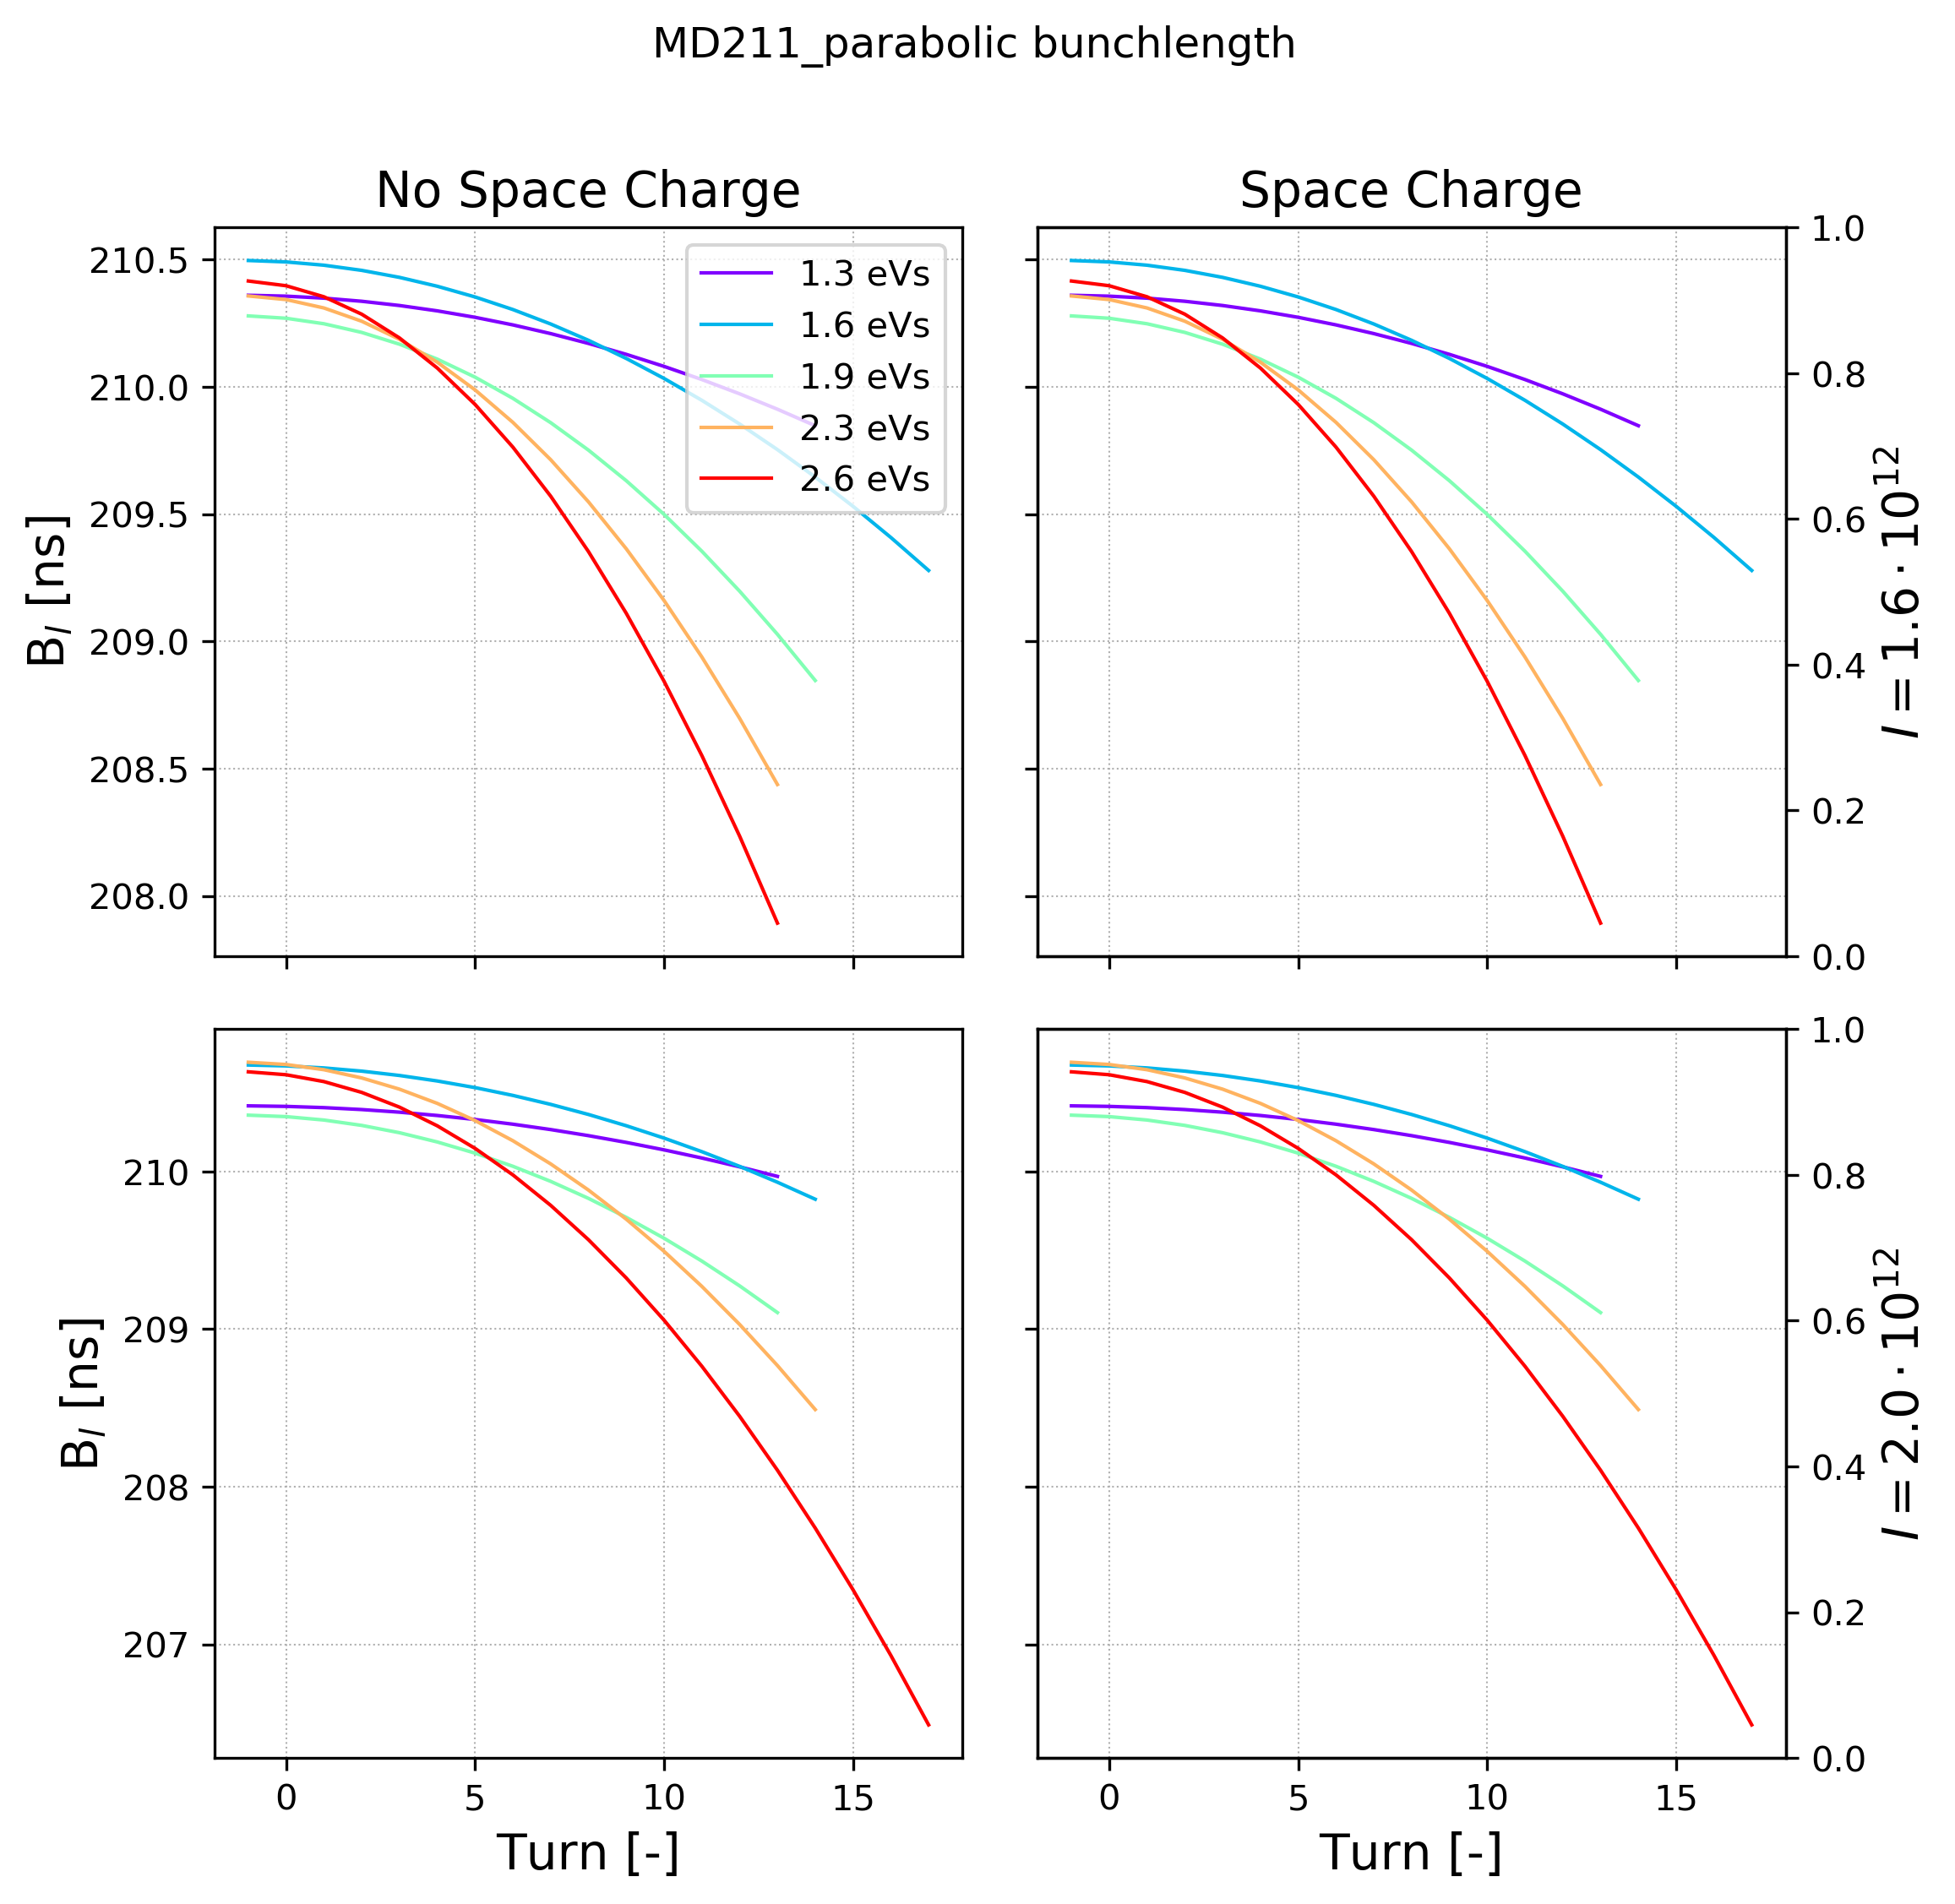

In [18]:
parameter = 'bunchlength'
multi1 = 1E9

fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
(ax1, ax2), (ax3, ax4) = axs

tit = main_label + ' ' + parameter
fig.suptitle(tit)

ax1.set_ylabel(r'B$_l$ [ns]');
ax3.set_ylabel(r'B$_l$ [ns]');
ax3.set_xlabel('Turn [-]');
ax4.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd_LI_NoSC.keys())))

c_it = int(0)
for key, value in sorted(dd_LI_NoSC.iteritems()):
        ax1.plot(dd_LI_NoSC[key]['turn'][0], dd_LI_NoSC[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;

ax1.grid(lw=0.5, ls=':');

c_it = int(0)
for key, value in sorted(dd_HI_SbS.iteritems()):
        ax4.plot(dd_HI_SbS[key]['turn'][0], dd_HI_SbS[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;        
ax4.grid(lw=0.5, ls=':');
ax2.set_title('Space Charge')

c_it = int(0)
for key, value in sorted(dd_HI_NoSC.iteritems()):
        ax3.plot(dd_HI_NoSC[key]['turn'][0], dd_HI_NoSC[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax3.grid(lw=0.5, ls=':');
ax1.set_title('No Space Charge')

c_it = int(0)
for key, value in sorted(dd_LI_SbS.iteritems()):
        ax2.plot(dd_LI_SbS[key]['turn'][0], dd_LI_SbS[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax2.grid(lw=0.5, ls=':');

ax5 = ax2.twinx()
ax5.set_ylabel('$I = 1.6 \cdot 10^{12}$');
ax6 = ax4.twinx()
ax6.set_ylabel('$I = 2.0 \cdot 10^{12}$');

ax1.legend(loc=1);
#ax1.set_ylim(4.5,7.5);
#ax3.set_ylim(4.5,7.5);

for ax in axs.flat:
    ax.label_outer()
    
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

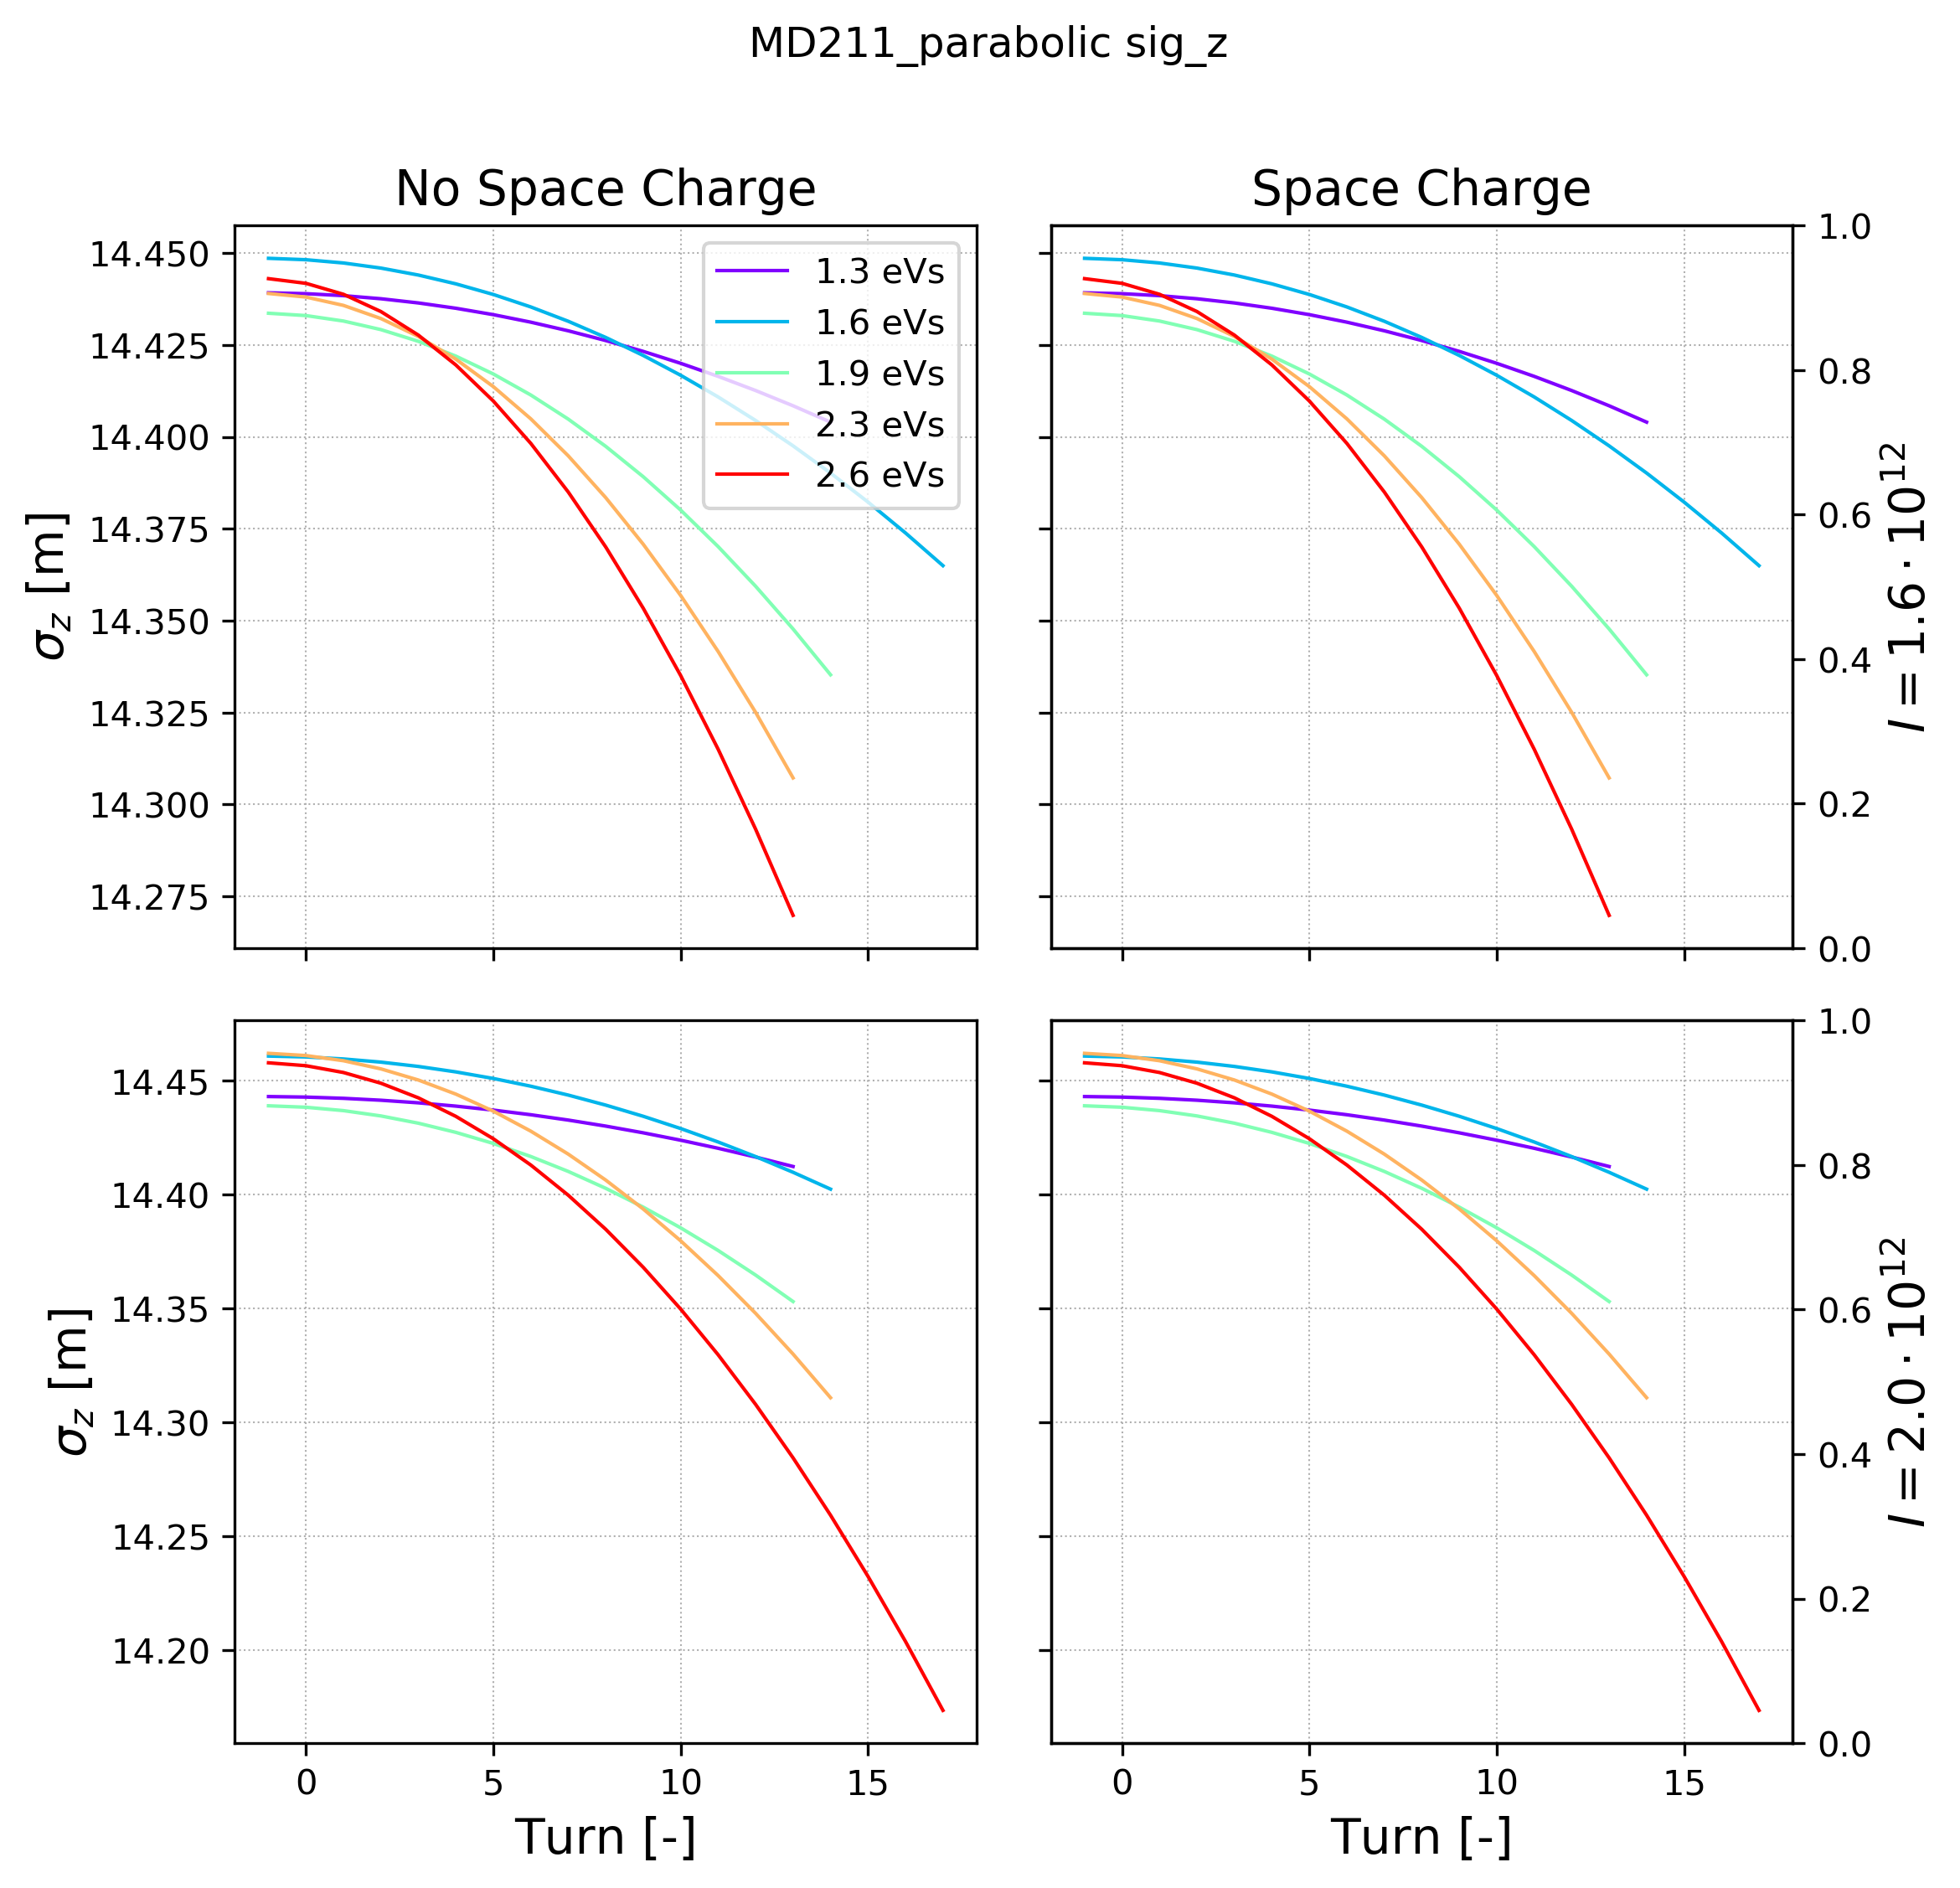

In [19]:
parameter = 'sig_z'
multi1 = 1


fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
(ax1, ax2), (ax3, ax4) = axs

tit = main_label + ' ' + parameter
fig.suptitle(tit)

ax1.set_ylabel(r'$\sigma_z$ [m]');
ax3.set_ylabel(r'$\sigma_z$ [m]');
ax3.set_xlabel('Turn [-]');
ax4.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd_LI_NoSC.keys())))

c_it = int(0)
for key, value in sorted(dd_LI_NoSC.iteritems()):
        ax1.plot(dd_LI_NoSC[key]['turn'][0], dd_LI_NoSC[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;

ax1.grid(lw=0.5, ls=':');

c_it = int(0)
for key, value in sorted(dd_HI_SbS.iteritems()):
        ax4.plot(dd_HI_SbS[key]['turn'][0], dd_HI_SbS[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;        
ax4.grid(lw=0.5, ls=':');
ax2.set_title('Space Charge')

c_it = int(0)
for key, value in sorted(dd_HI_NoSC.iteritems()):
        ax3.plot(dd_HI_NoSC[key]['turn'][0], dd_HI_NoSC[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax3.grid(lw=0.5, ls=':');
ax1.set_title('No Space Charge')

c_it = int(0)
for key, value in sorted(dd_LI_SbS.iteritems()):
        ax2.plot(dd_LI_SbS[key]['turn'][0], dd_LI_SbS[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax2.grid(lw=0.5, ls=':');

ax5 = ax2.twinx()
ax5.set_ylabel('$I = 1.6 \cdot 10^{12}$');
ax6 = ax4.twinx()
ax6.set_ylabel('$I = 2.0 \cdot 10^{12}$');

ax1.legend(loc=1);
#ax1.set_ylim(4.5,7.5);
#ax3.set_ylim(4.5,7.5);

for ax in axs.flat:
    ax.label_outer()
        
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

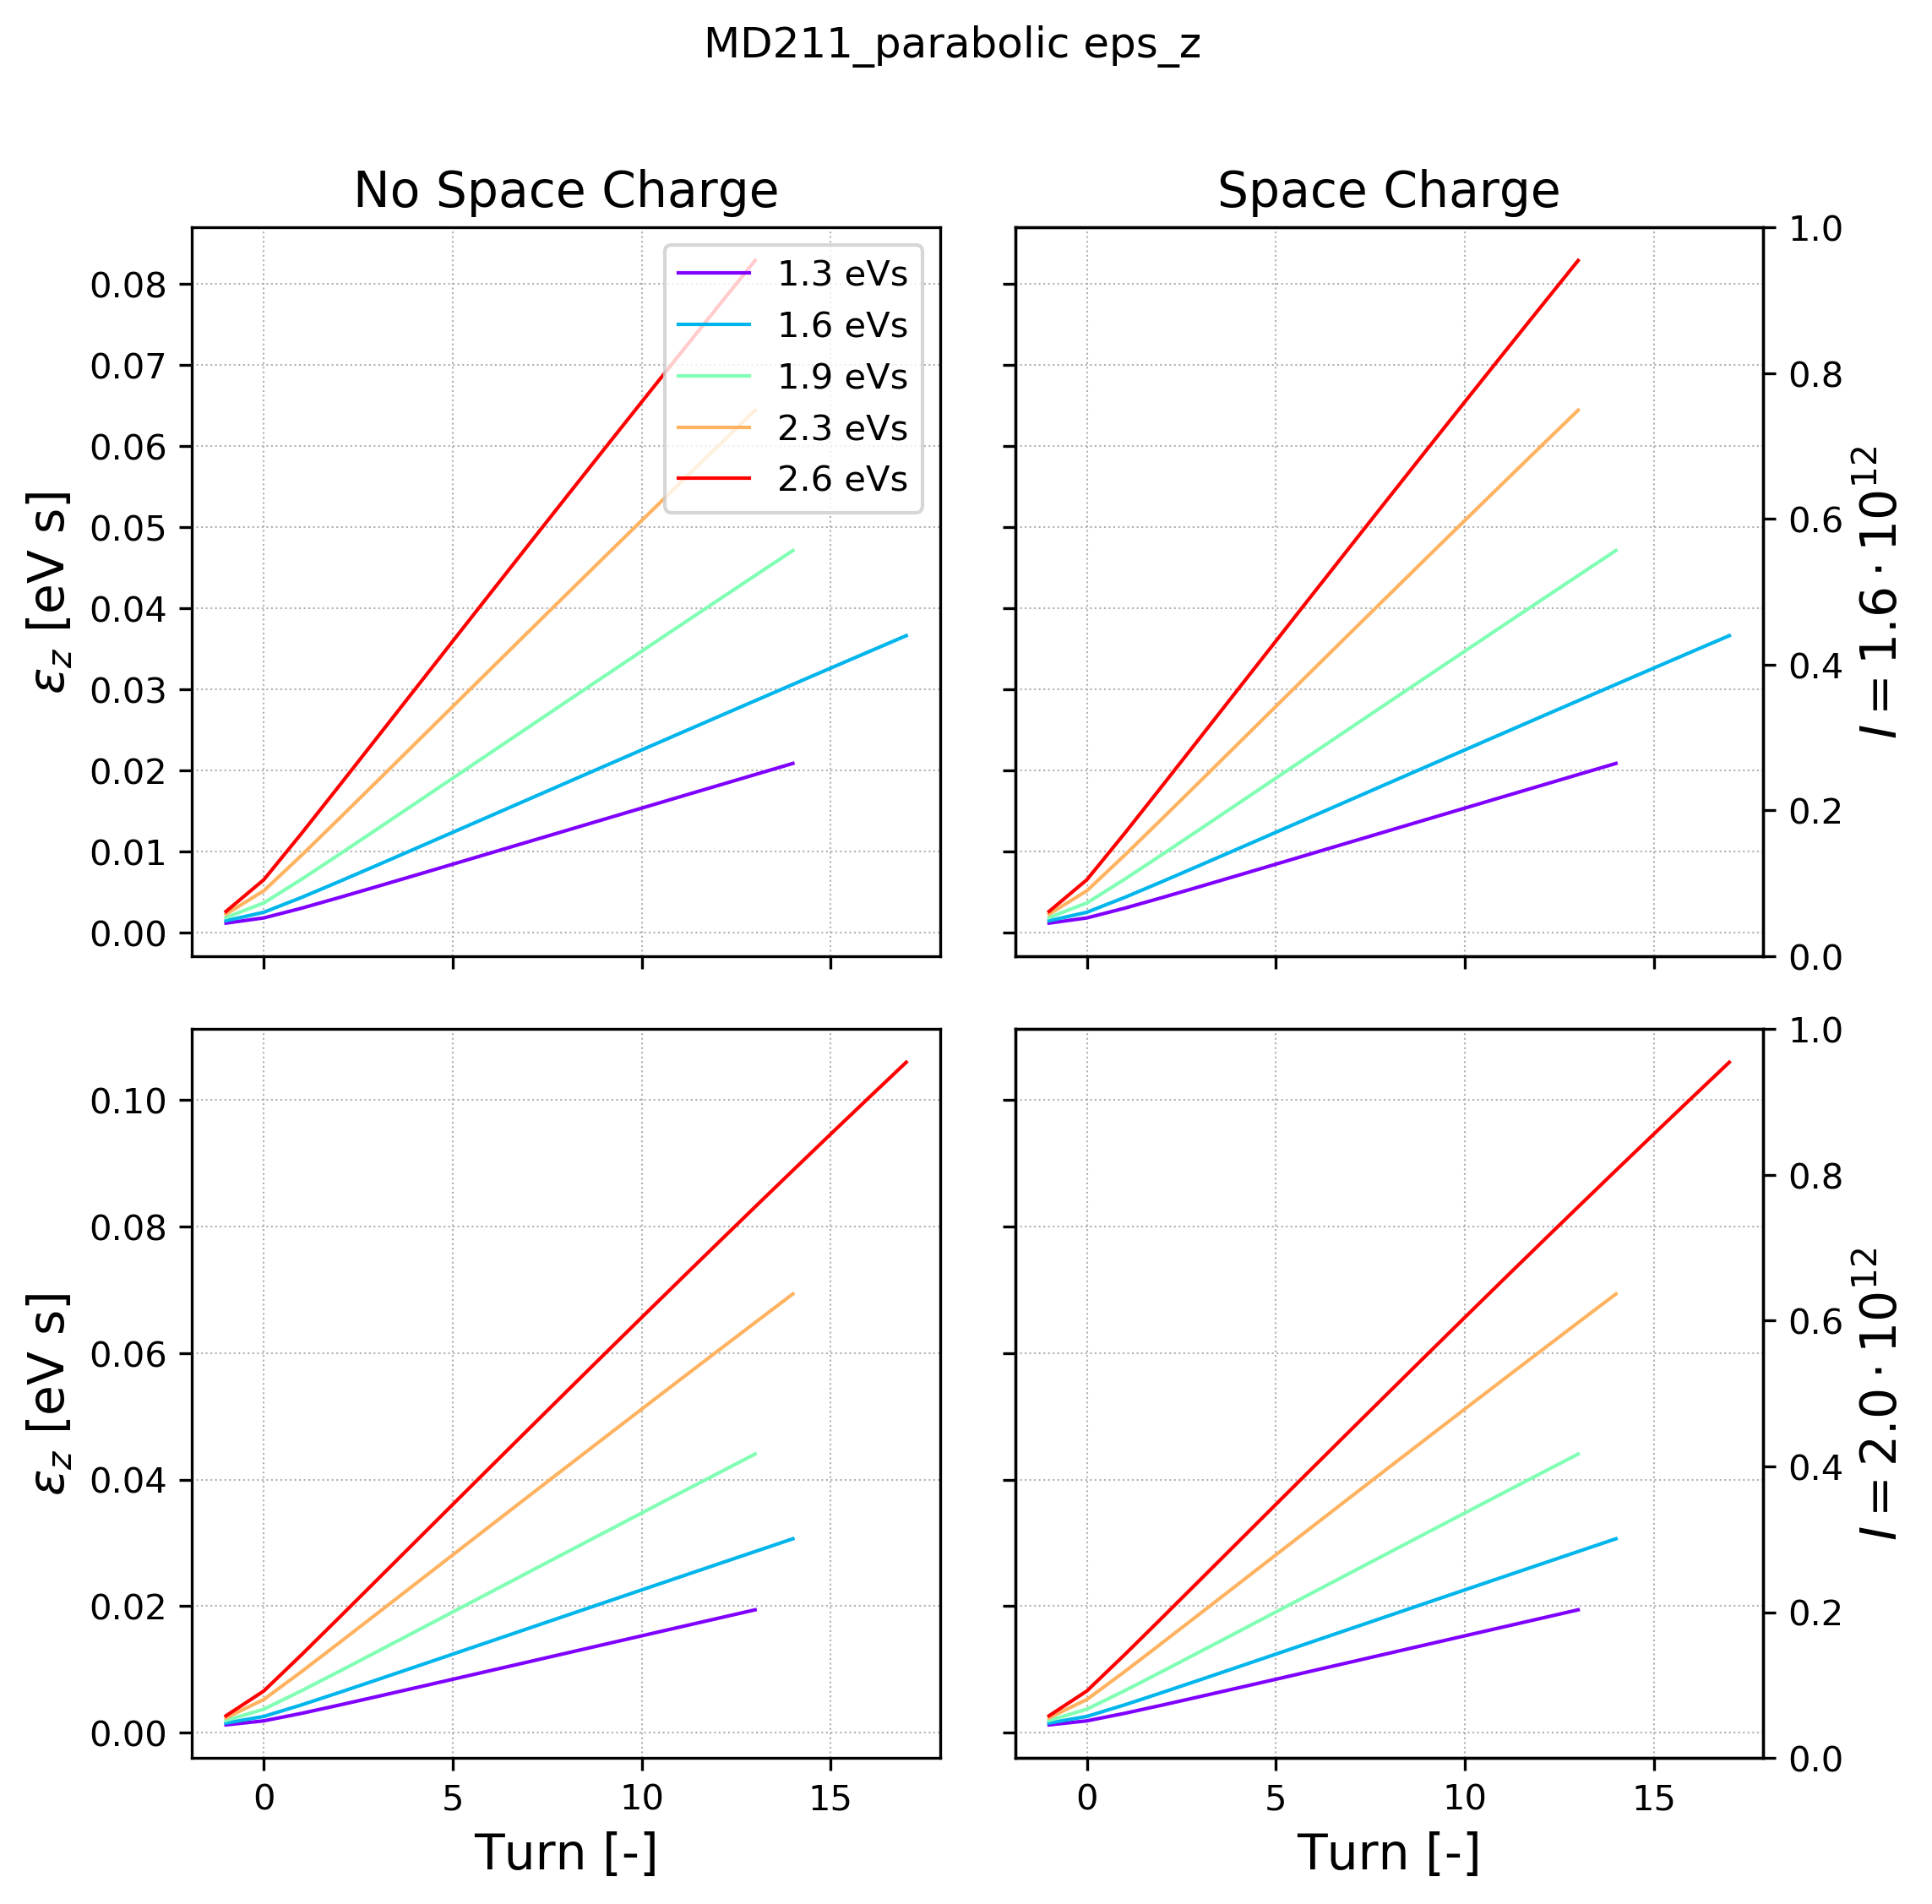

In [20]:
parameter = 'eps_z'
multi1 = 1


fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
(ax1, ax2), (ax3, ax4) = axs

tit = main_label + ' ' + parameter
fig.suptitle(tit)

ax1.set_ylabel(r'$\epsilon_z$ [eV s]');
ax3.set_ylabel(r'$\epsilon_z$ [eV s]');
ax3.set_xlabel('Turn [-]');
ax4.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd_LI_NoSC.keys())))

c_it = int(0)
for key, value in sorted(dd_LI_NoSC.iteritems()):
        ax1.plot(dd_LI_NoSC[key]['turn'][0], dd_LI_NoSC[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;

ax1.grid(lw=0.5, ls=':');

c_it = int(0)
for key, value in sorted(dd_HI_SbS.iteritems()):
        ax4.plot(dd_HI_SbS[key]['turn'][0], dd_HI_SbS[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;        
ax4.grid(lw=0.5, ls=':');
ax2.set_title('Space Charge')

c_it = int(0)
for key, value in sorted(dd_HI_NoSC.iteritems()):
        ax3.plot(dd_HI_NoSC[key]['turn'][0], dd_HI_NoSC[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax3.grid(lw=0.5, ls=':');
ax1.set_title('No Space Charge')

c_it = int(0)
for key, value in sorted(dd_LI_SbS.iteritems()):
        ax2.plot(dd_LI_SbS[key]['turn'][0], dd_LI_SbS[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax2.grid(lw=0.5, ls=':');

ax5 = ax2.twinx()
ax5.set_ylabel('$I = 1.6 \cdot 10^{12}$');
ax6 = ax4.twinx()
ax6.set_ylabel('$I = 2.0 \cdot 10^{12}$');

ax1.legend(loc=1);
#ax1.set_ylim(4.5,7.5);
#ax3.set_ylim(4.5,7.5);

for ax in axs.flat:
    ax.label_outer()
        
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

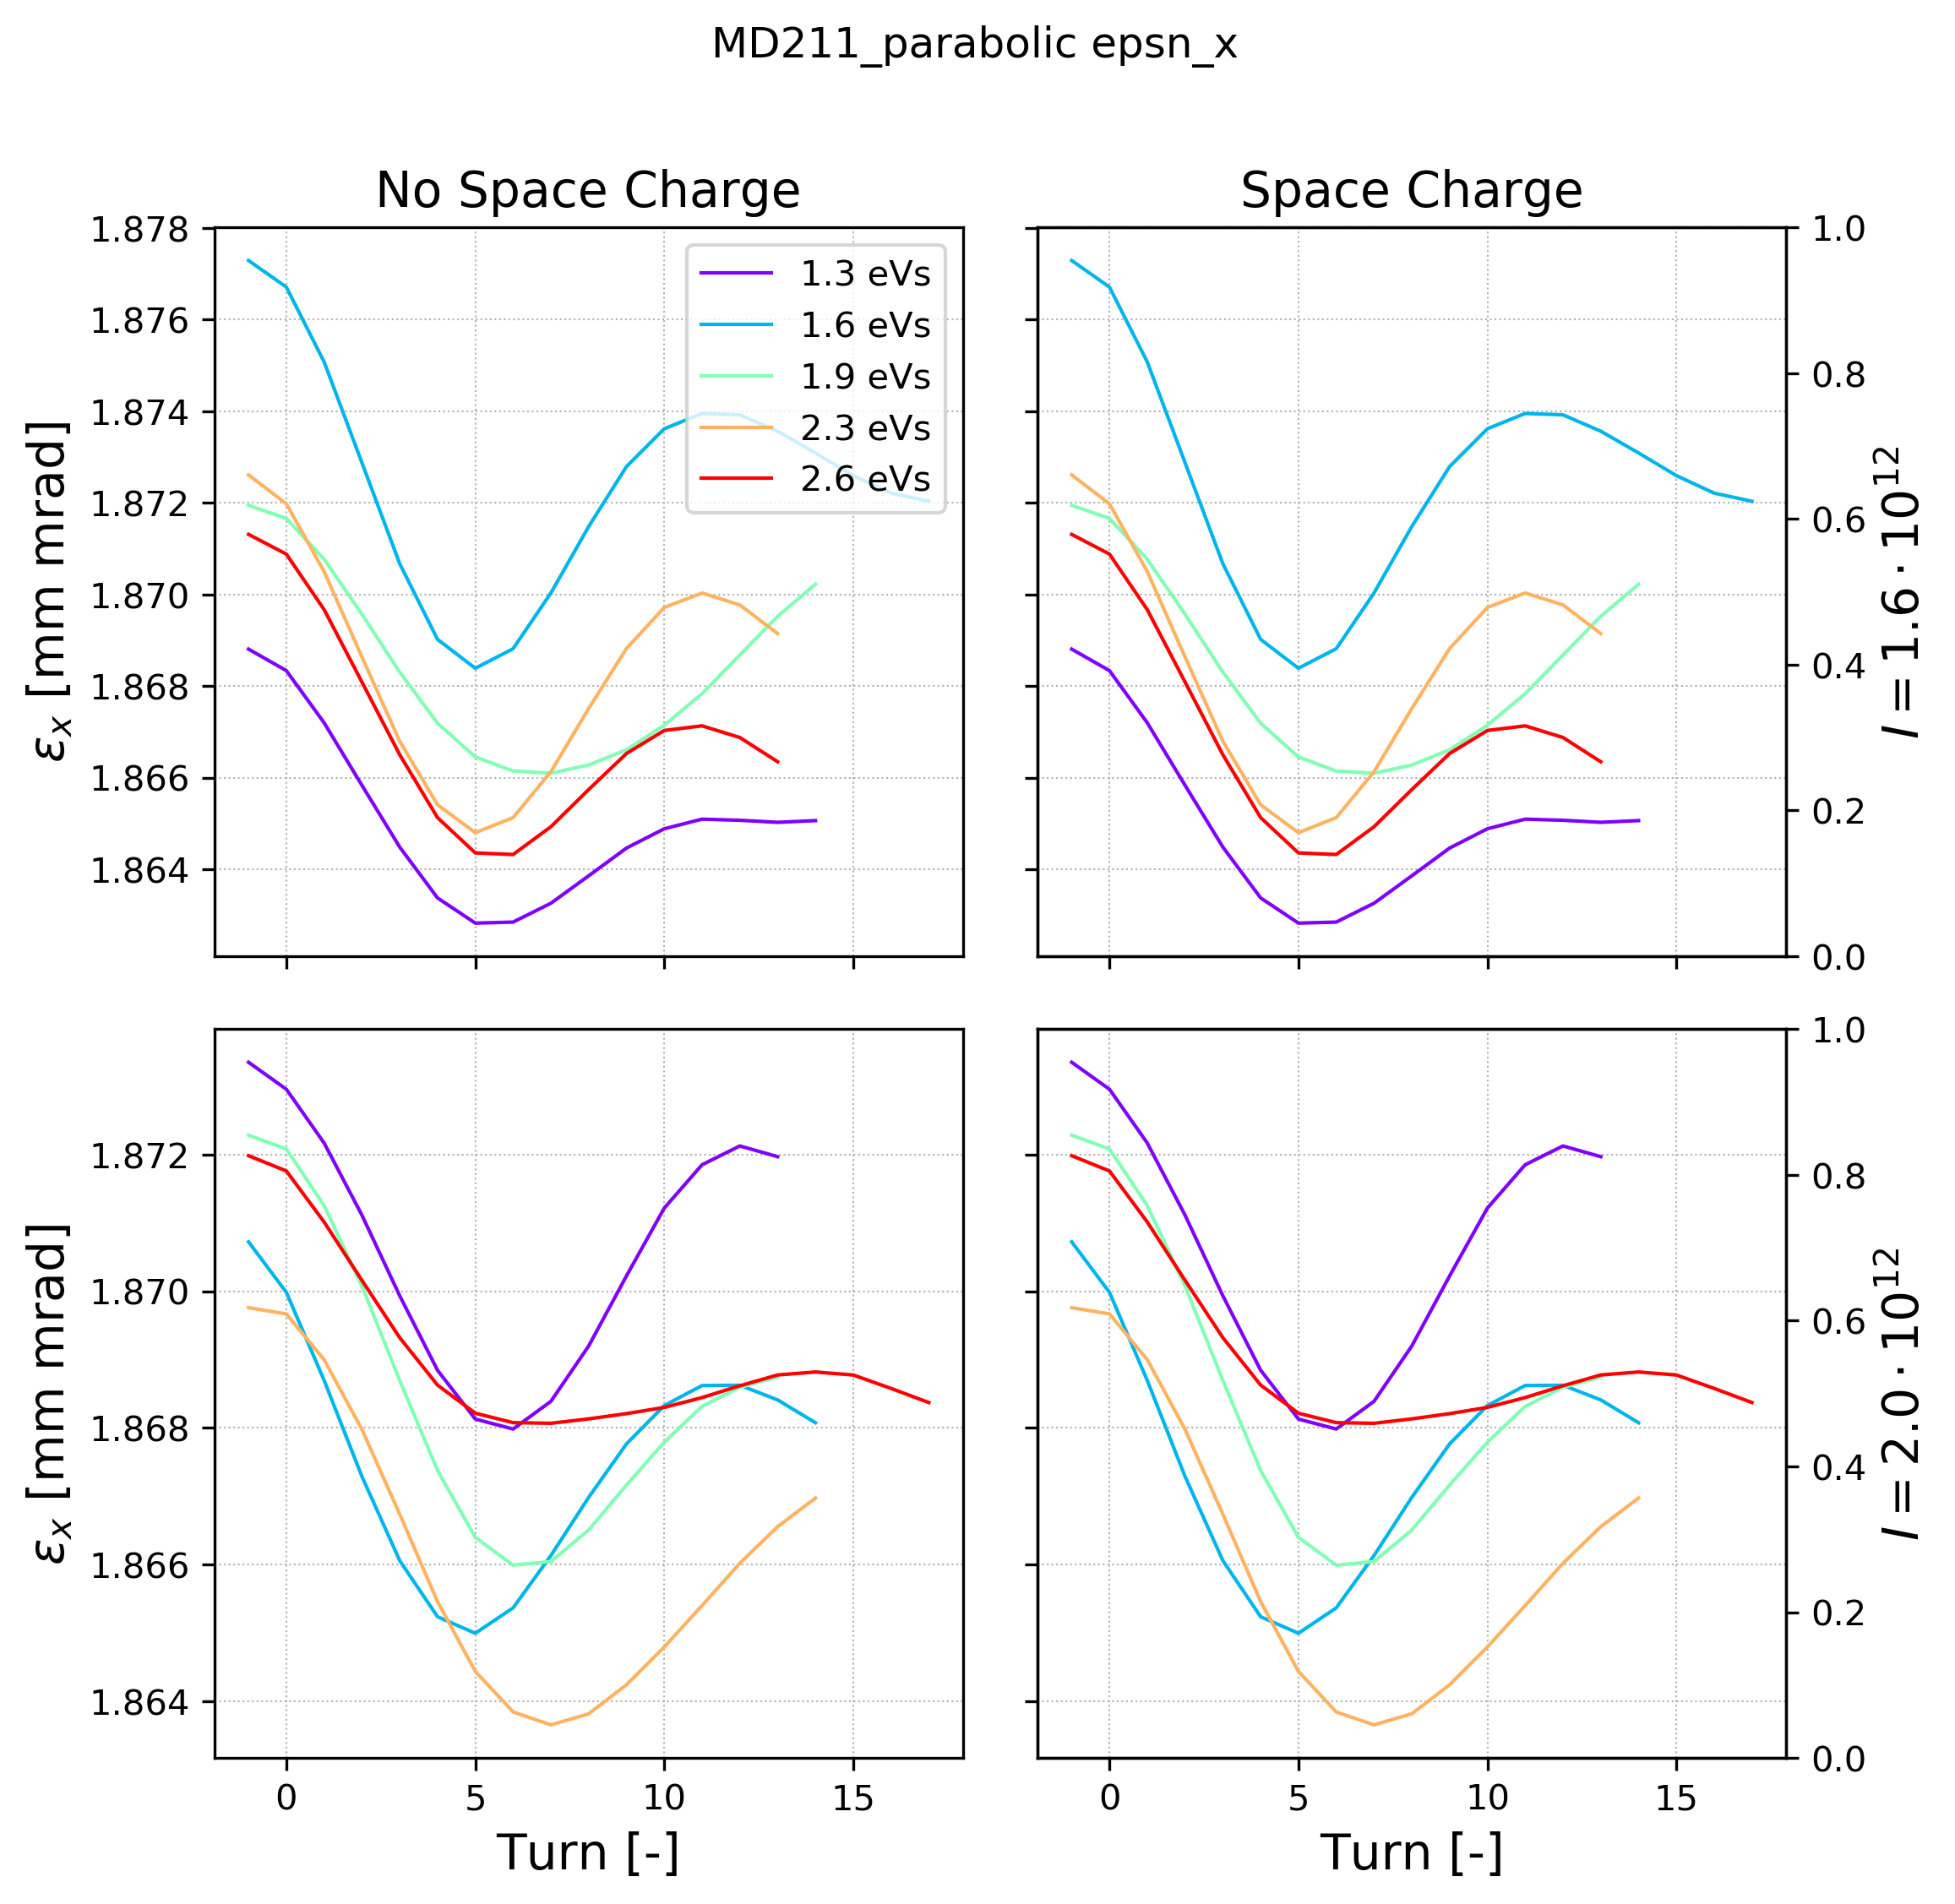

In [21]:
parameter = 'epsn_x'
multi1 = 1E6


fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
(ax1, ax2), (ax3, ax4) = axs

tit = main_label + ' ' + parameter
fig.suptitle(tit)

ax1.set_ylabel(r'$\epsilon_x$ [mm mrad]');
ax3.set_ylabel(r'$\epsilon_x$ [mm mrad]');
ax3.set_xlabel('Turn [-]');
ax4.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd_LI_NoSC.keys())))

c_it = int(0)
for key, value in sorted(dd_LI_NoSC.iteritems()):
        ax1.plot(dd_LI_NoSC[key]['turn'][0], dd_LI_NoSC[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;

ax1.grid(lw=0.5, ls=':');

c_it = int(0)
for key, value in sorted(dd_HI_SbS.iteritems()):
        ax4.plot(dd_HI_SbS[key]['turn'][0], dd_HI_SbS[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;        
ax4.grid(lw=0.5, ls=':');
ax2.set_title('Space Charge')

c_it = int(0)
for key, value in sorted(dd_HI_NoSC.iteritems()):
        ax3.plot(dd_HI_NoSC[key]['turn'][0], dd_HI_NoSC[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax3.grid(lw=0.5, ls=':');
ax1.set_title('No Space Charge')

c_it = int(0)
for key, value in sorted(dd_LI_SbS.iteritems()):
        ax2.plot(dd_LI_SbS[key]['turn'][0], dd_LI_SbS[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax2.grid(lw=0.5, ls=':');

ax5 = ax2.twinx()
ax5.set_ylabel('$I = 1.6 \cdot 10^{12}$');
ax6 = ax4.twinx()
ax6.set_ylabel('$I = 2.0 \cdot 10^{12}$');

ax1.legend(loc=1);
#ax1.set_ylim(4.5,7.5);
#ax3.set_ylim(4.5,7.5);

for ax in axs.flat:
    ax.label_outer()
        
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

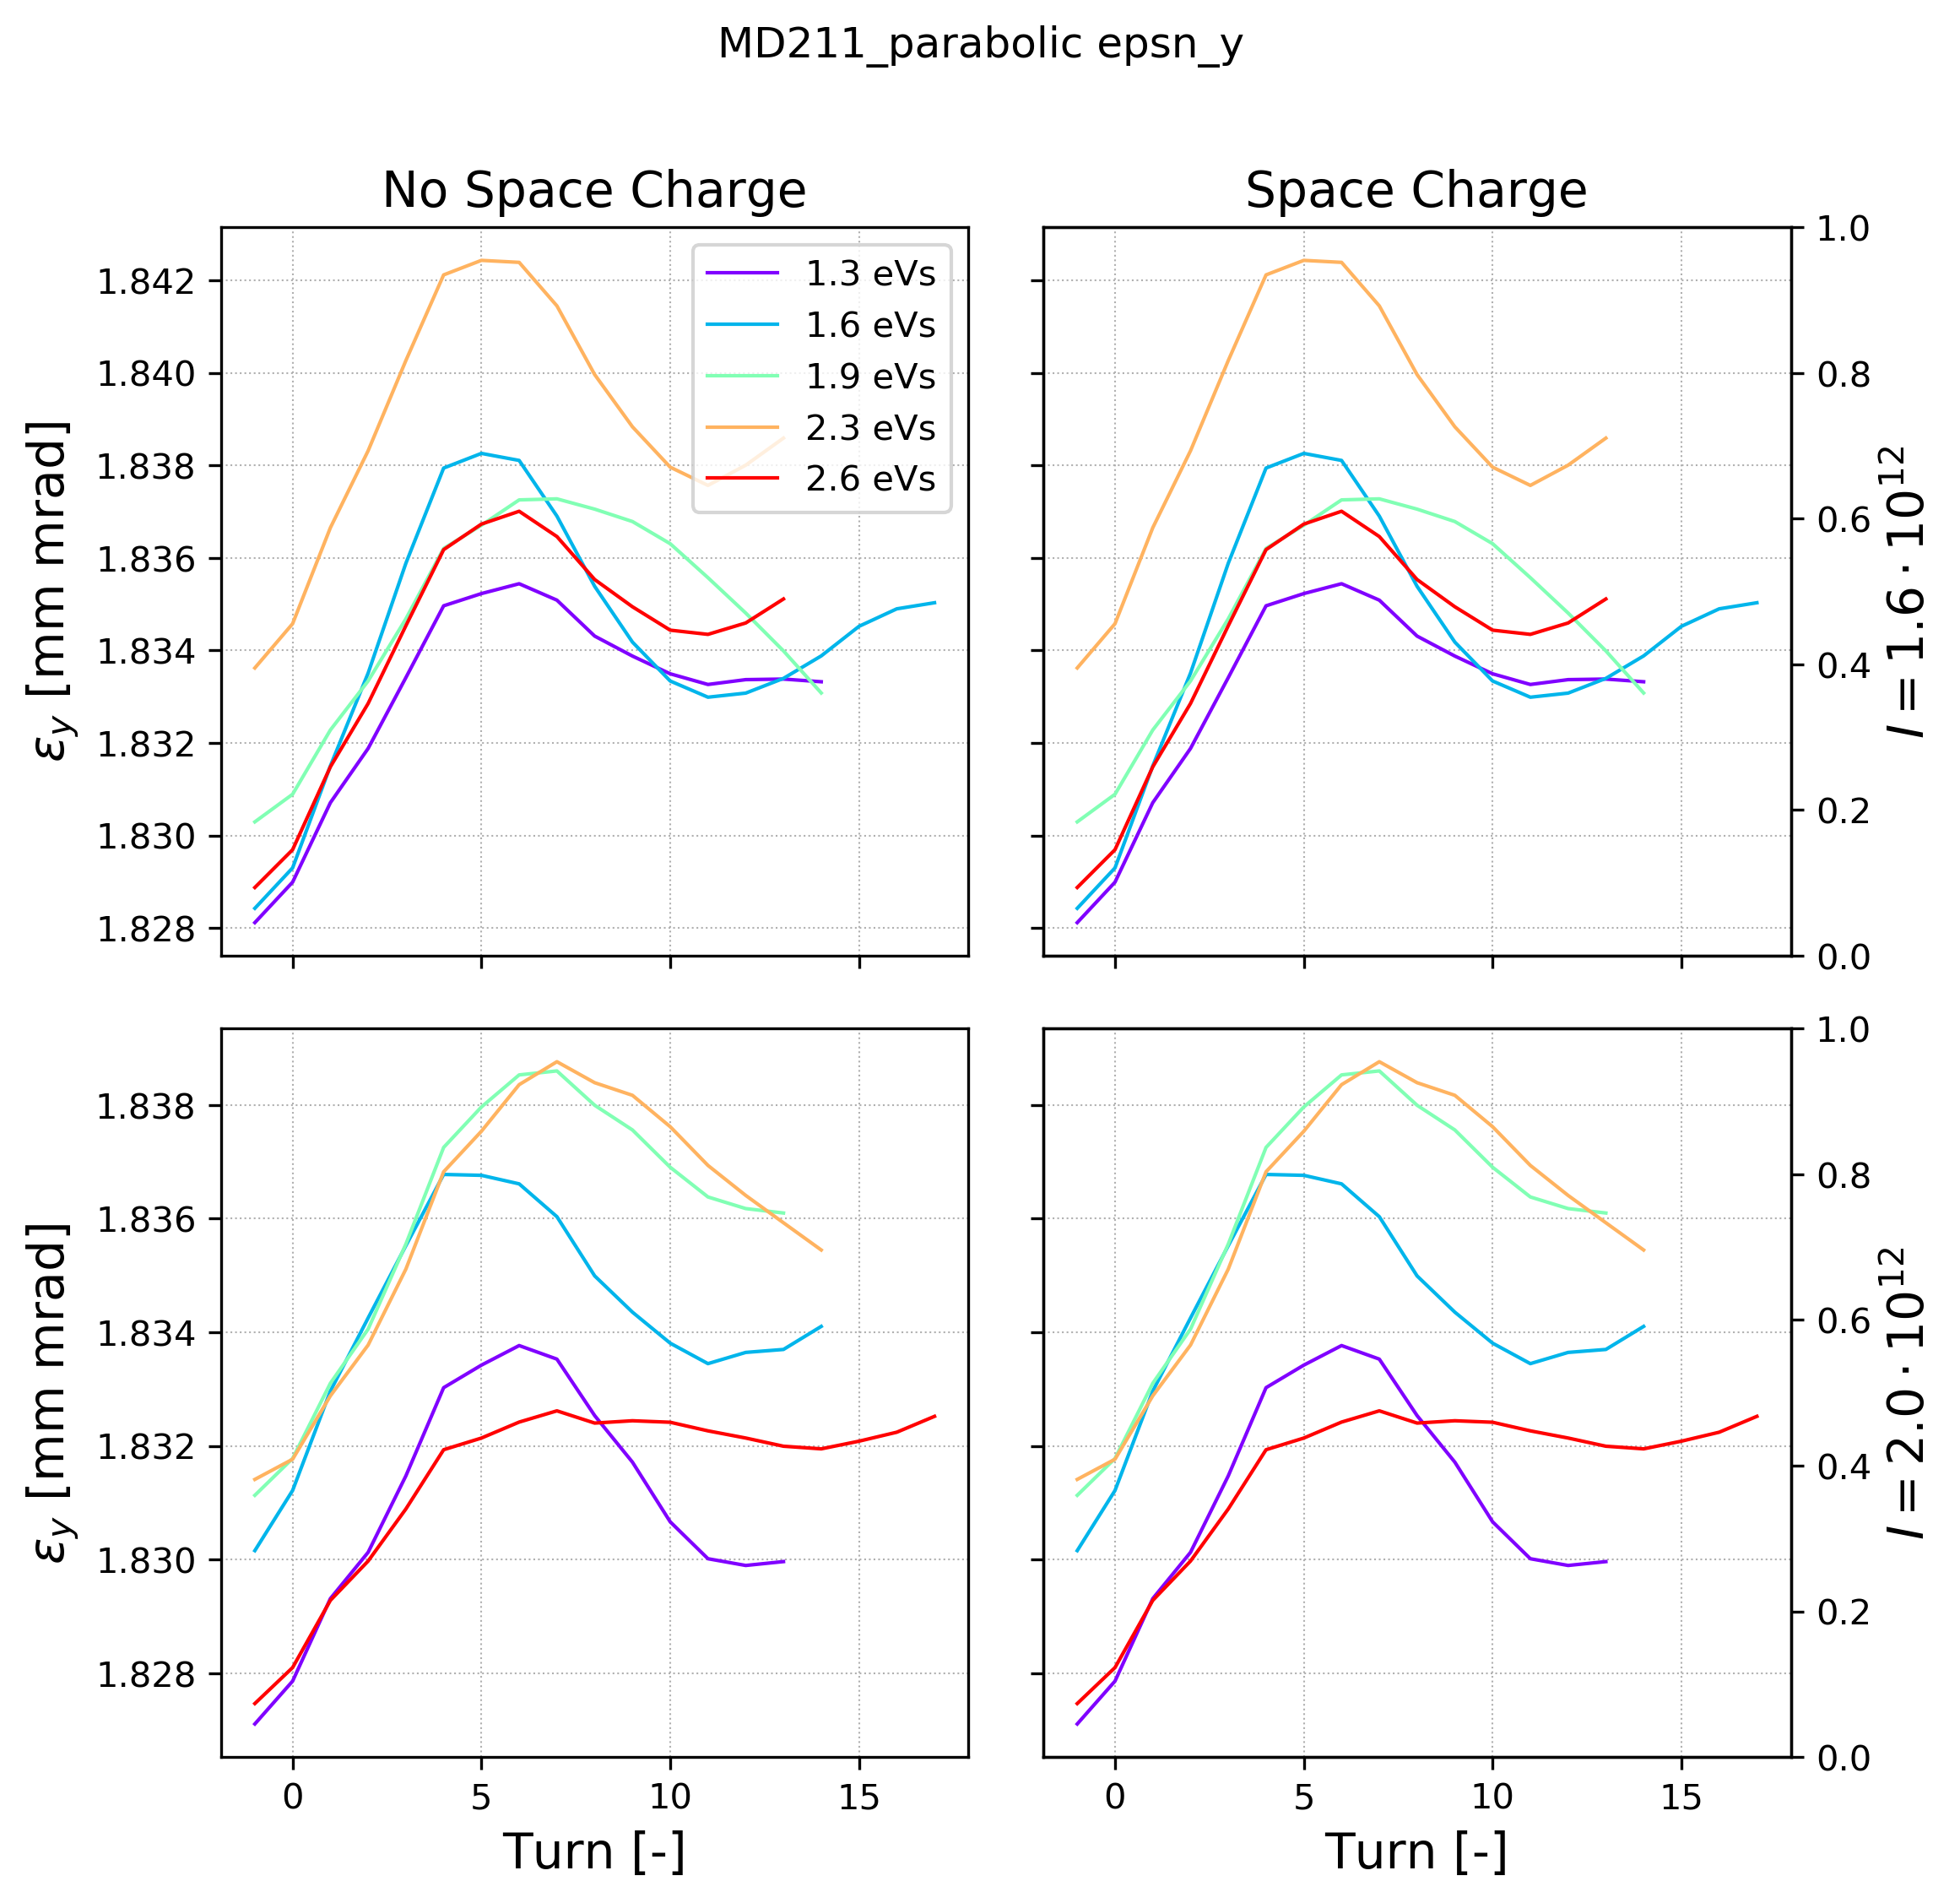

In [22]:
parameter = 'epsn_y'
multi1 = 1E6


fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
(ax1, ax2), (ax3, ax4) = axs

tit = main_label + ' ' + parameter
fig.suptitle(tit)

ax1.set_ylabel(r'$\epsilon_y$ [mm mrad]');
ax3.set_ylabel(r'$\epsilon_y$ [mm mrad]');
ax3.set_xlabel('Turn [-]');
ax4.set_xlabel('Turn [-]');
ax2.set_title('Space Charge')
ax1.set_title('No Space Charge')

colors = cm.rainbow(np.linspace(0, 1, len(dd_LI_NoSC.keys())))

c_it = int(0)
for key, value in sorted(dd_LI_NoSC.iteritems()):
        ax1.plot(dd_LI_NoSC[key]['turn'][0], dd_LI_NoSC[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax1.grid(lw=0.5, ls=':');

c_it = int(0)
for key, value in sorted(dd_HI_SbS.iteritems()):
        ax4.plot(dd_HI_SbS[key]['turn'][0], dd_HI_SbS[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;        
ax4.grid(lw=0.5, ls=':');

c_it = int(0)
for key, value in sorted(dd_HI_NoSC.iteritems()):
        ax3.plot(dd_HI_NoSC[key]['turn'][0], dd_HI_NoSC[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax3.grid(lw=0.5, ls=':');

c_it = int(0)
for key, value in sorted(dd_LI_SbS.iteritems()):
        ax2.plot(dd_LI_SbS[key]['turn'][0], dd_LI_SbS[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax2.grid(lw=0.5, ls=':');

ax5 = ax2.twinx()
ax5.set_ylabel('$I = 1.6 \cdot 10^{12}$');
ax6 = ax4.twinx()
ax6.set_ylabel('$I = 2.0 \cdot 10^{12}$');

ax1.legend(loc=1);

#ax1.set_ylim(4.5,7.5);
#ax3.set_ylim(4.5,7.5);

for ax in axs.flat:
    ax.label_outer()
    
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

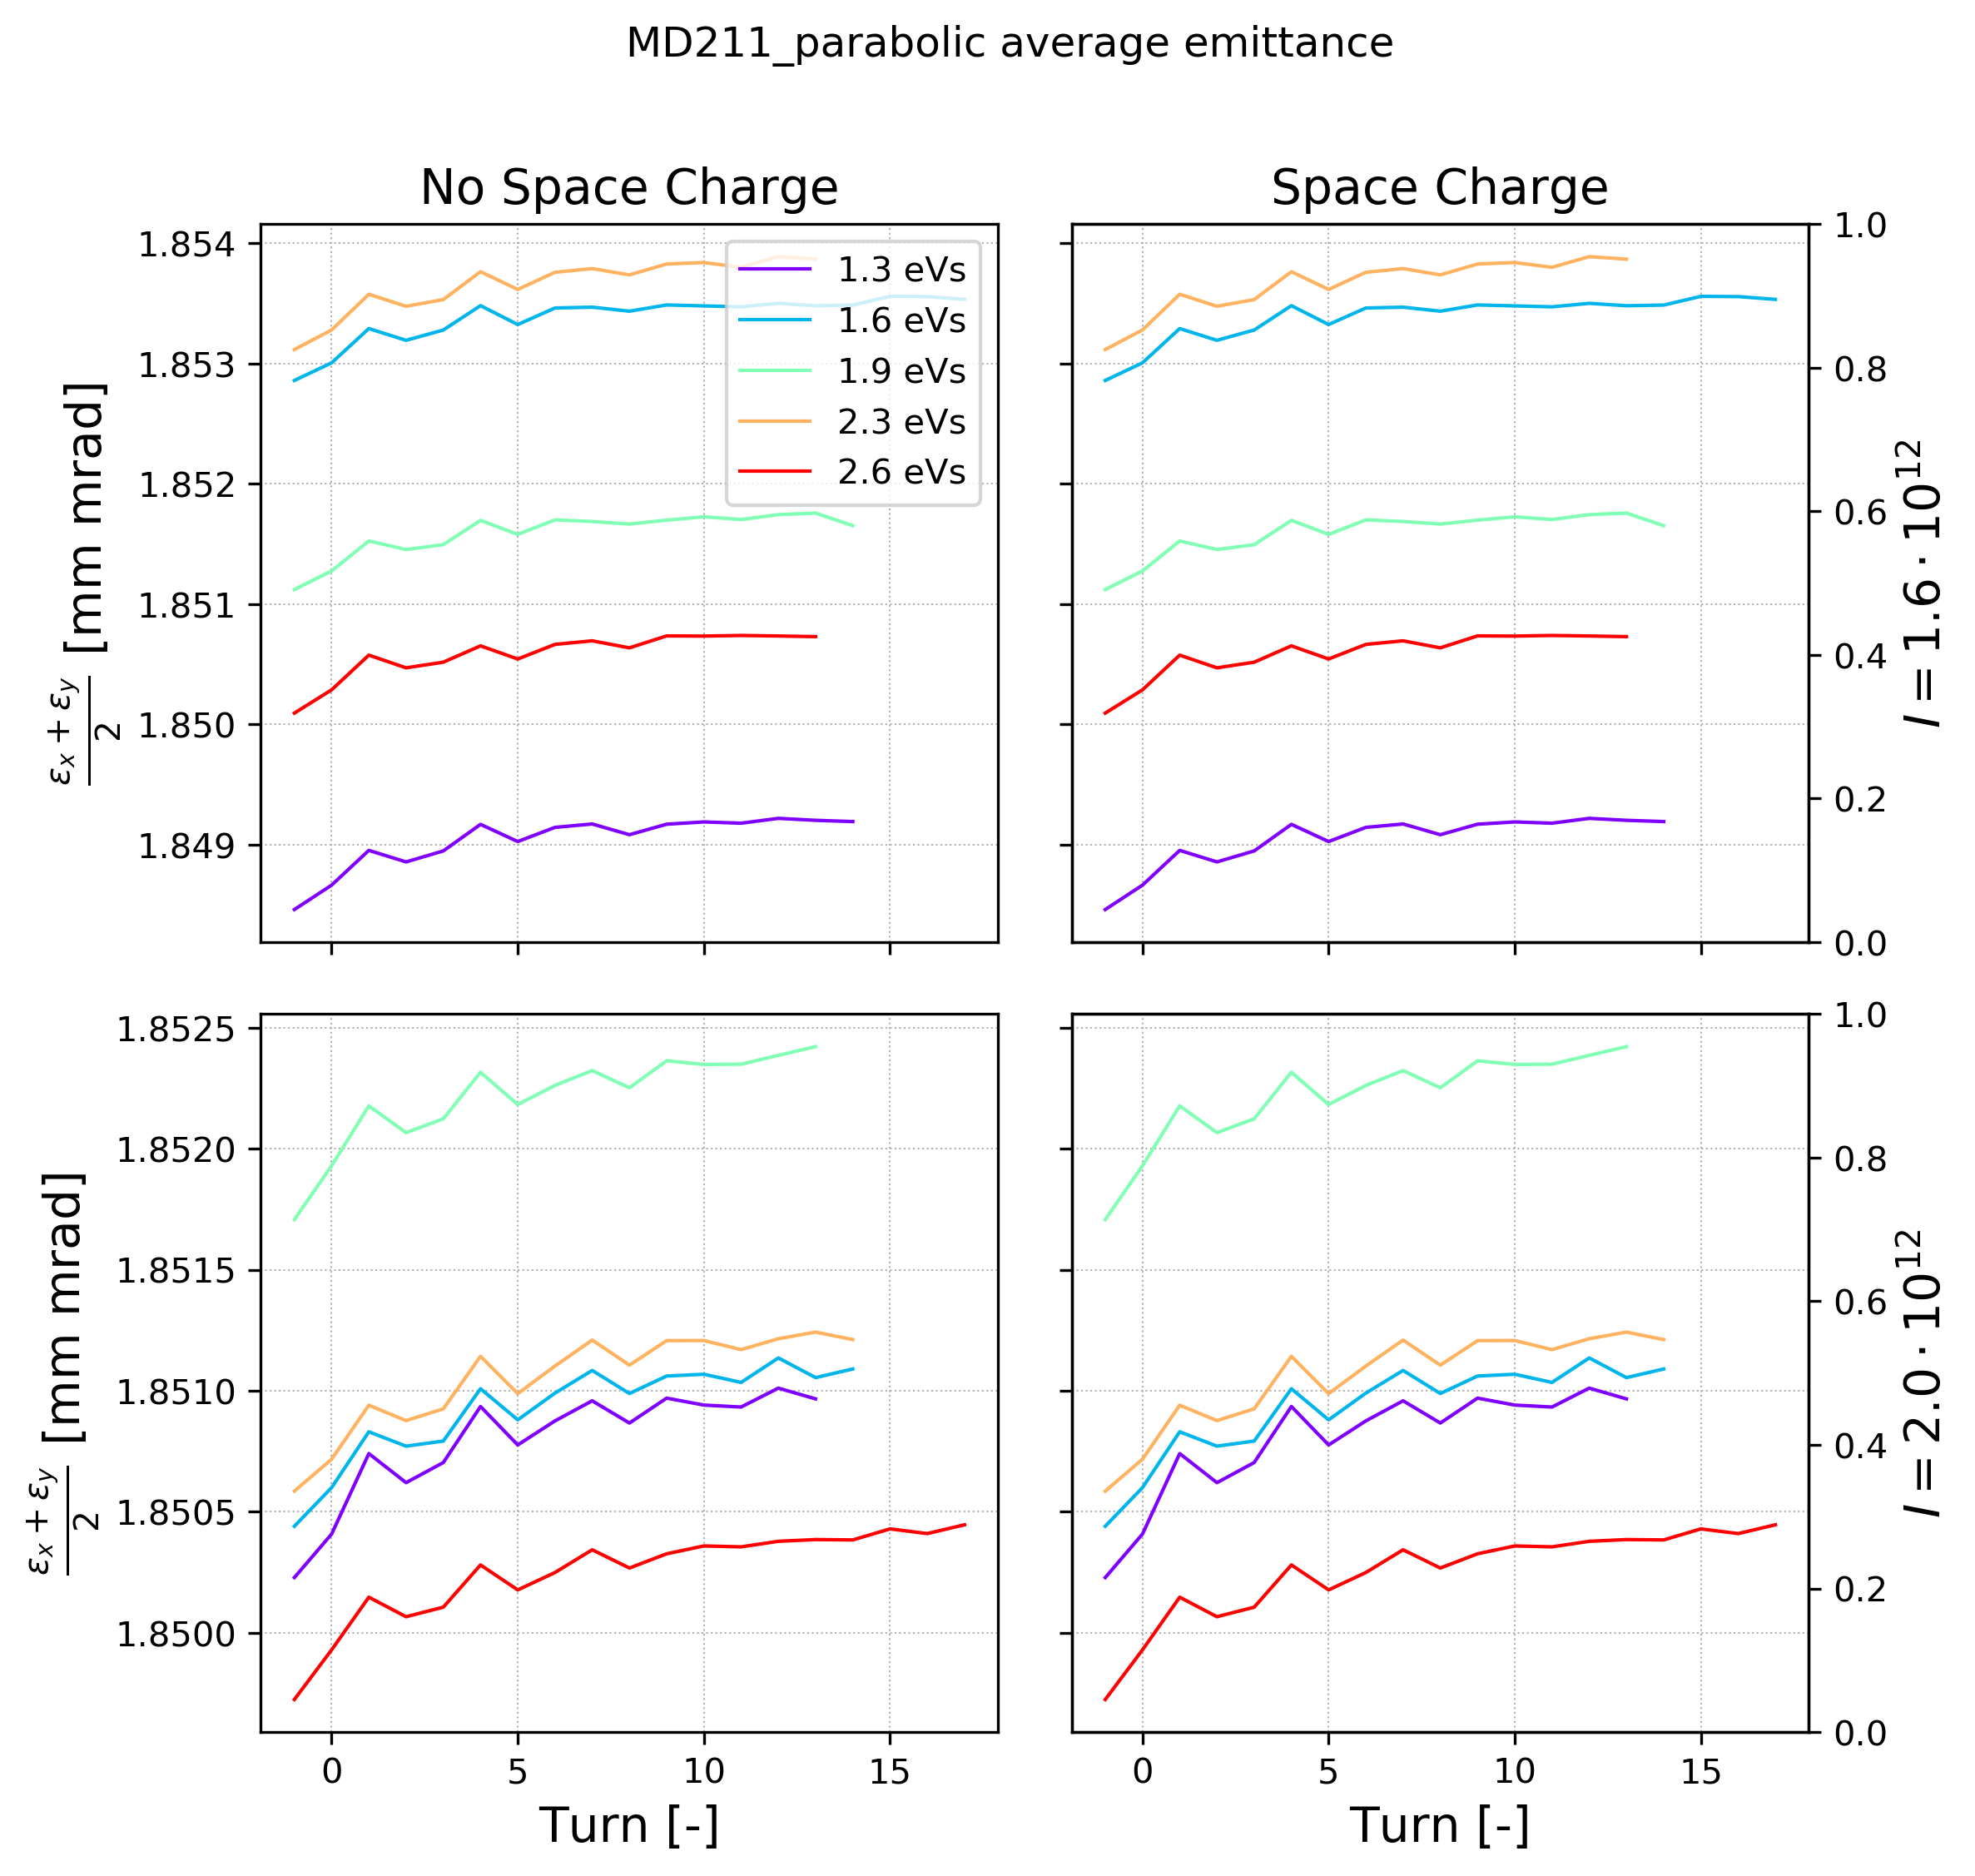

In [23]:
parameter1 = 'epsn_x'
multi1 = 1E6
parameter2 = 'epsn_y'
multi2 = 1E6

fig, axs = plt.subplots(2, 2, sharex='col', sharey='row', gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
(ax1, ax2), (ax3, ax4) = axs

tit = main_label + ' average emittance'
fig.suptitle(tit)

ax1.set_ylabel(r'$\frac{\epsilon_x + \epsilon_y}{2}$ [mm mrad]');
ax3.set_ylabel(r'$\frac{\epsilon_x + \epsilon_y}{2}$ [mm mrad]');
ax3.set_xlabel('Turn [-]');
ax4.set_xlabel('Turn [-]');
ax2.set_title('Space Charge')
ax1.set_title('No Space Charge')

colors = cm.rainbow(np.linspace(0, 1, len(dd_LI_NoSC.keys())))

c_it = int(0)
for key, value in sorted(dd_LI_NoSC.iteritems()):
        ax1.plot(dd_LI_NoSC[key]['turn'][0], (dd_LI_NoSC[key][parameter1][0]*multi1 + dd_LI_NoSC[key][parameter2][0]*multi2)/2, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax1.grid(lw=0.5, ls=':');

c_it = int(0)
for key, value in sorted(dd_HI_SbS.iteritems()):
        ax4.plot(dd_HI_SbS[key]['turn'][0], (dd_HI_SbS[key][parameter1][0]*multi1 + dd_HI_SbS[key][parameter2][0]*multi2)/2, label=key, color=colors[c_it]);
        c_it = c_it + 1;        
ax4.grid(lw=0.5, ls=':');

c_it = int(0)
for key, value in sorted(dd_HI_NoSC.iteritems()):
        ax3.plot(dd_HI_NoSC[key]['turn'][0], (dd_HI_NoSC[key][parameter1][0]*multi1 + dd_HI_NoSC[key][parameter2][0]*multi2)/2, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax3.grid(lw=0.5, ls=':');

c_it = int(0)
for key, value in sorted(dd_LI_SbS.iteritems()):
        ax2.plot(dd_LI_SbS[key]['turn'][0], (dd_LI_SbS[key][parameter1][0]*multi1 + dd_LI_SbS[key][parameter2][0]*multi2)/2, label=key, color=colors[c_it]);
        c_it = c_it + 1;
ax2.grid(lw=0.5, ls=':');

ax5 = ax2.twinx()
ax5.set_ylabel('$I = 1.6 \cdot 10^{12}$');
ax6 = ax4.twinx()
ax6.set_ylabel('$I = 2.0 \cdot 10^{12}$');

ax1.legend(loc=1);

#ax1.set_ylim(4.5,7.5);
#ax3.set_ylim(4.5,7.5);

for ax in axs.flat:
    ax.label_outer()
    
savename = save_folder +'/' + main_label + '_' + parameter + '.png'
plt.savefig(savename, dpi = 800);